In [1]:
import os
import sys
sys.path.append('..')

In [2]:
from BasicDataPrep_V1 import * # Not Required for Inference, but I am planning to plot few things here.
from ClusterTree import *
from ReadWritePickleFile import *

import pandas as pd  # Not Required for Inference, but I am planning to plot few things here.
import matplotlib.pyplot as plt  # Not Required for Inference, but I am planning to plot few things here.
%matplotlib inline

## Test - 1
### Divided by one set of attributes and assigned label by another.

In [3]:
histrocalDataFilePath = './MAB-Experiment-4-DataForSegmentByBuyingTrend.csv'
dataForPred = pd.read_csv(histrocalDataFilePath)
dataForPred.drop(columns = 'Unnamed: 0', inplace=True)

In [4]:
conquerDataColumns = ['1005', '1015', '1016', '1017', '1032', '1033', '1034', '1039', '1042', '1047', '1050',
         '1051', '1052', '1078', '1080', '40000', '40006', '1000', '1014', '1001']

sourcePath = './Integration-Test-1-withOption2-conquer_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

This is the only place I am mentioning the info 'columns' separately, because the file contains
all columns which was used for diving and conquering together. 
It actually doesn't matter even if you pass something which haven't used when you have created the model,
but still I don't want to create confusion at this moment so keeping it simple.

In [5]:
inferenceCols = ['Adults','Children','LeadDays','LengthOfStay','ArrivalDate_WeekDay']
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info) 
    preds.append(pred)
dataForPred['Predicted_Cluster'] = preds

At this moment I have got back all the predictions.
In this file I want to plot the data to see their underlying pattern.
** We had used separate conquering columns for this model. More precisely, we wanted to group together people
with same buying behavior so, the pattern we would look for in buying behavior of each cluster. 

### Data Preparation for Plotting

In [6]:
dataForPred_buyTrendByCluster = pd.DataFrame(dataForPred[conquerDataColumns+['Predicted_Cluster']])
dataForPred_buyTrendByCluster = pd.DataFrame(dataForPred[conquerDataColumns+['Predicted_Cluster']])
for c in conquerDataColumns:
    dataForPred_buyTrendByCluster[c] = dataForPred_buyTrendByCluster[c]/max(dataForPred_buyTrendByCluster[c])

dataForPred_buyTrendByCluster_Agg = dataForPred_buyTrendByCluster.groupby(by=['Predicted_Cluster']).mean()
dataForPred_buyTrendByCluster_Agg.reset_index(inplace=True, drop=False)
dataForPred_buyTrendByCluster_Agg

,Predicted_Cluster,1005,1015,1016,1017,1032,1033,1034,1039,1042,...,1050,1051,1052,1078,1080,40000,40006,1000,1014,1001
0,test-w/option-2_v5_1__cluster_0,0.028488,0.329194,0.597306,0.042157,0.024283,0.004306,0.353377,0.168327,0.027437,...,0.006409,0.020077,0.013768,0.010614,0.019026,0.052671,0.056877,0.016923,0.049517,0.051620
1,test-w/option-2_v5_1__cluster_1,0.047739,0.622060,0.277997,0.073677,0.015450,0.076323,0.173719,0.121845,0.025508,...,0.030272,0.078440,0.022861,0.008040,0.019685,0.068913,0.026037,0.075794,0.024449,0.078440
2,test-w/option-2_v5_1__cluster_2,0.044591,0.609851,0.303549,0.050865,0.003522,0.012649,0.019493,0.008086,0.125016,...,0.167225,0.403368,0.015501,0.012078,0.099919,0.017782,0.102771,0.003522,0.028049,0.008086
3,test-w/option-2_v5_1__cluster_3,0.021619,0.445775,0.409433,0.103390,0.036921,0.002491,0.008707,0.009186,0.305187,...,0.081871,0.114866,0.002969,0.007751,0.271713,0.049832,0.151687,0.001056,0.005360,0.015402
4,test-w/option-2_v5_1__cluster_4,0.191341,0.317038,0.493808,0.145942,0.067630,0.081817,0.051457,0.041526,0.061955,...,0.040107,0.068765,0.036702,0.015138,0.021380,0.010598,0.094302,0.020529,0.109056,0.012868
5,test-w/option-2_v5_1__cluster_5,0.030280,0.092227,0.829247,0.048546,0.055694,0.025514,0.018367,0.018367,0.224065,...,0.082697,0.147027,0.008042,0.002483,0.149410,0.044575,0.228036,0.011219,0.029485,0.019955
6,test-w/option-2_v5_1__cluster_6,0.236235,0.783951,0.078485,0.056439,0.015287,0.017737,0.018227,0.010388,0.027535,...,0.013327,0.013327,0.003529,0.246033,0.010388,0.006959,0.078975,0.005489,0.025575,0.044192
7,test-w/option-2_v5_1__cluster_7,0.010559,0.322244,0.421606,0.126656,0.017881,0.008467,0.120381,0.009513,0.105738,...,0.094233,0.125610,0.029386,0.004284,0.135024,0.364080,0.018927,0.008467,0.006376,0.008467
8,test-w/option-2_v5_1__cluster_default,0.052334,0.294847,0.171725,0.505646,0.069123,0.013158,0.056065,0.026217,0.197841,...,0.031813,0.028082,0.005696,0.029948,0.138146,0.028082,0.266864,0.003831,0.054199,0.026217


### Plotting

2019-12-20 18:15:23,000 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:23,002 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


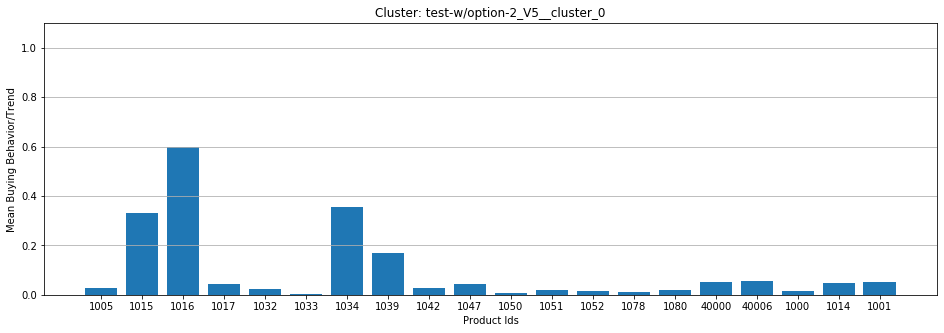

In [7]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[0][conquerDataColumns].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2_V5__cluster_0')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2019-12-20 18:15:23,229 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:23,230 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


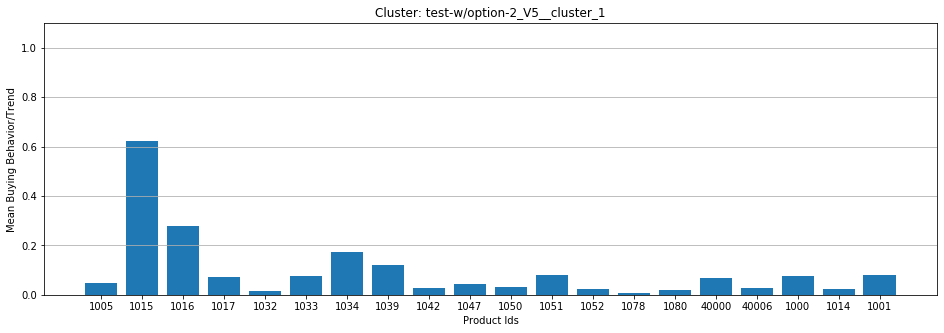

In [8]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[1][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-w/option-2_V5__cluster_1')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2019-12-20 18:15:23,432 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:23,434 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


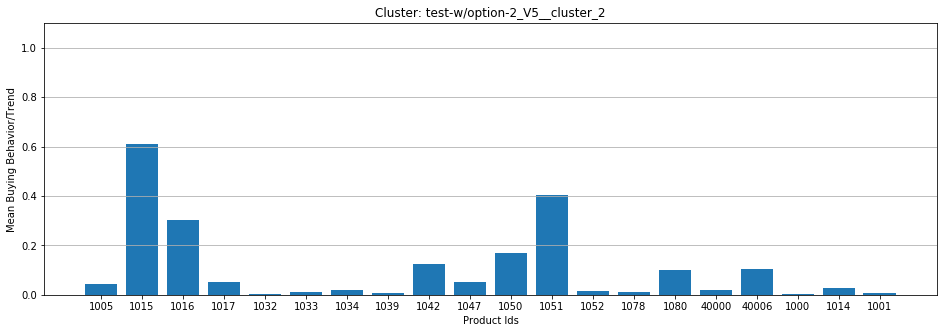

In [9]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[2][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-w/option-2_V5__cluster_2')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2019-12-20 18:15:23,622 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:23,623 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


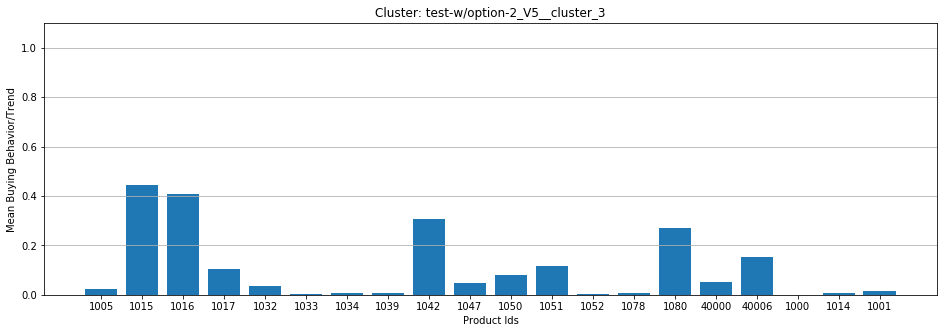

In [10]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[3][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-w/option-2_V5__cluster_3')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2019-12-20 18:15:23,833 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:23,834 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


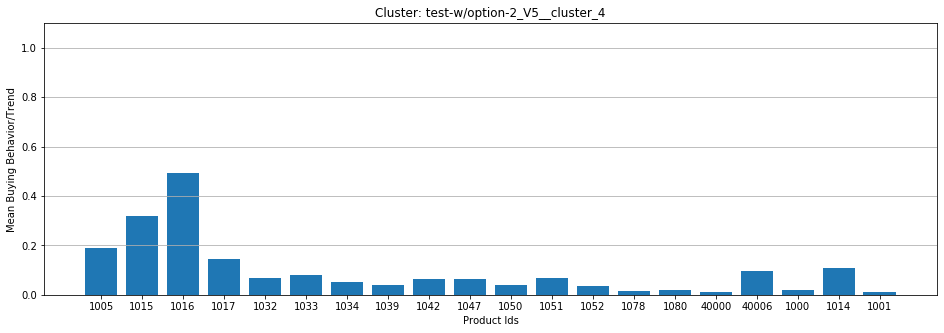

In [11]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[4][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-w/option-2_V5__cluster_4')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2019-12-20 18:15:24,028 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:24,029 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


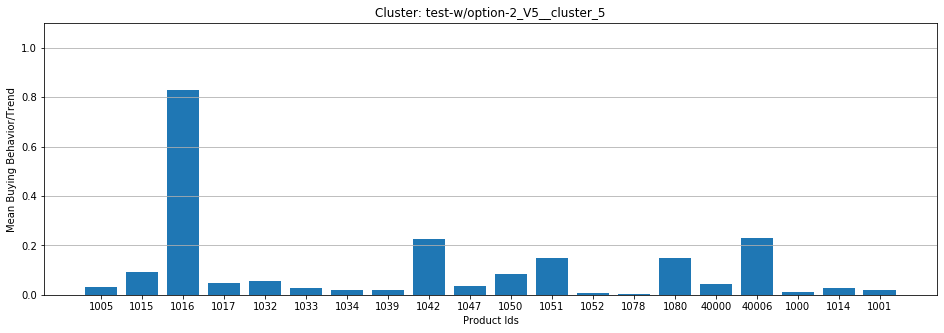

In [12]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[5][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-w/option-2_V5__cluster_5')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2019-12-20 18:15:24,226 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:24,228 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


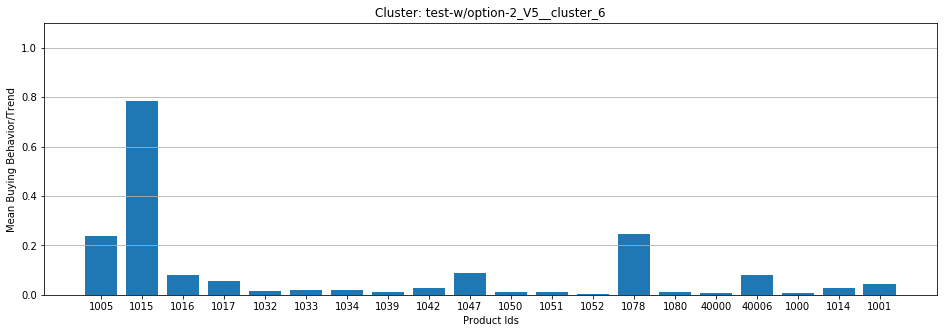

In [13]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[6][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-w/option-2_V5__cluster_6')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2019-12-20 18:15:24,440 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:24,442 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


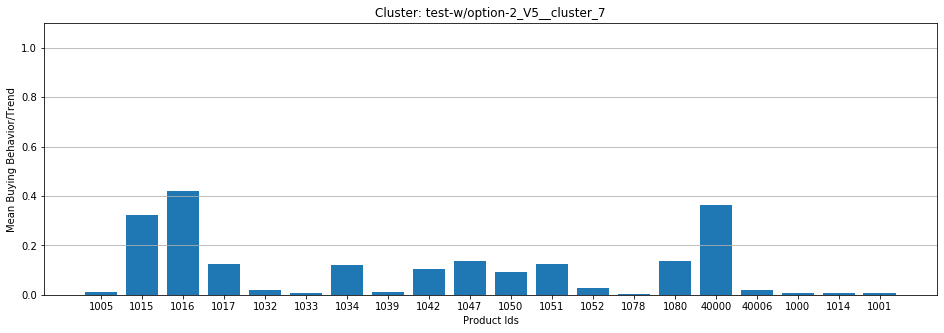

In [14]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[7][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-w/option-2_V5__cluster_7')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2019-12-20 18:15:24,632 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-12-20 18:15:24,633 - 4636816832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


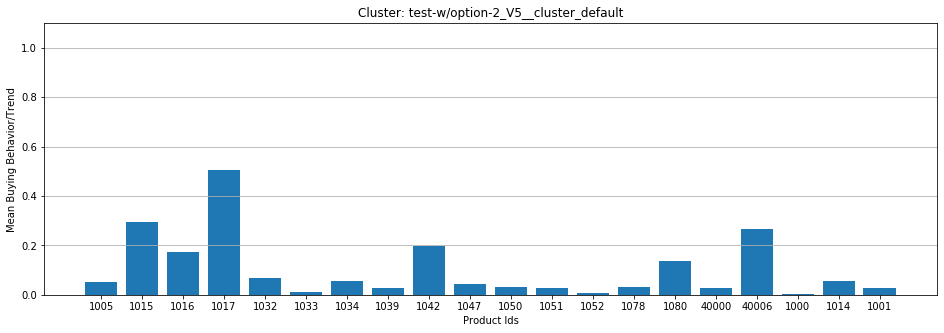

In [15]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[8][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-w/option-2_V5__cluster_default')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

## Test - 2

The same attributes have been used for "dividing" operation or creating the initial tree and then "conquering" or assiging a label to each leaf node has happned by **first calculating "centroid" of each hyper-rectangle produced by each leaf and then colapsing them, two at a time, based on similarity among them at each iteration.**
The process took a parameter, "min_y", which articulates that we need atleast these amount of members/personal in a group to be considered as a separate cluster. However, for the sake of robustness towards outliers, one and only one group can have less number of members than what is mentioned in "min_y". These are the data points are not similar to other groups significantly and may be among themselves as well. These are the data points which have been separated from well formed clusters because we do not want to disturb the integrity of well-formed clusters. 

**The pattern we would look for is in attributes of all the encompassed personals of each cluster.**

In [16]:
histrocalDataFilePath = './Mab-Experiment-4-DataForSegmentByDemographics.csv'
dataForPred = pd.read_csv(histrocalDataFilePath)
sourcePath = './Integration-Test-2-withOption2-Centroids_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [17]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [18]:
dataForPred['Predicted_Cluster'] = preds

In [19]:
dataForPred['Predicted_Cluster'].value_counts()

test-centroid-w/option-2_v5_1__cluster_8          2037
test-centroid-w/option-2_v5_1__cluster_7          2022
test-centroid-w/option-2_v5_1__cluster_9          1892
test-centroid-w/option-2_v5_1__cluster_6          1655
test-centroid-w/option-2_v5_1__cluster_3          1312
test-centroid-w/option-2_v5_1__cluster_4          1222
test-centroid-w/option-2_v5_1__cluster_1          1205
test-centroid-w/option-2_v5_1__cluster_5           989
test-centroid-w/option-2_v5_1__cluster_0           981
test-centroid-w/option-2_v5_1__cluster_2           931
test-centroid-w/option-2_v5_1__cluster_default     754
Name: Predicted_Cluster, dtype: int64

In [20]:
dataForPred.columns

Index(['Adults', 'Children', 'LeadDays', 'LengthOfStay', 'ArrivalDate_WeekDay',
       'Predicted_Cluster'],
      dtype='object')

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are a "categorical" column here, **ArrivalDate_WeekDay**. We will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use the function we have used at the begining of creation of the model for data-preparation or feature engineering. 

In [21]:
columns = [i.lower() for i in list(dataForPred.columns)]
dataForPred['ArrivalDate_WeekDay'] = dataForPred['ArrivalDate_WeekDay'].apply(lambda x: x.strip().lower())
dataForPred.columns = columns
dataForPred, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred)

In [22]:
dataForPred.columns

Index(['predicted_cluster', 'children', 'arrivaldate_weekday', 'adults',
       'lengthofstay', 'leaddays', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

In [23]:
numericalCols = ['children', 'adults', 'leaddays', 'lengthofstay', 'arrivaldate_weekday_weekend',
                'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek']

In [24]:
eps = 0.00000001
for c in numericalCols:
    dataForPred[c] = (dataForPred[c]-min(dataForPred[c]))/(max(dataForPred[c]) - min(dataForPred[c])+eps)
colRename = {'arrivaldate_weekday_weekend': 'weekend',
            'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek'}
dataForPred.rename(columns=colRename, inplace=True)
numericalCols = ['children', 'adults', 'leaddays', 'lengthofstay', 'weekend', 'midweek', 'earlyweek']

In [25]:
dataForPred.columns

Index(['predicted_cluster', 'children', 'arrivaldate_weekday', 'adults',
       'lengthofstay', 'leaddays', 'weekend', 'midweek', 'earlyweek'],
      dtype='object')

In [26]:
dataForPred_DemographicData_Agg = dataForPred.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,children,adults,lengthofstay,leaddays,weekend,midweek,earlyweek
0,test-centroid-w/option-2_v5_1__cluster_0,0.000000,0.081142,0.235092,0.257594,0.574924,0.425076,0.0
1,test-centroid-w/option-2_v5_1__cluster_1,0.670124,0.084979,0.159855,0.376971,0.595021,0.404979,0.0
2,test-centroid-w/option-2_v5_1__cluster_2,0.779270,0.340709,0.757116,0.290172,0.576799,0.423201,0.0
3,test-centroid-w/option-2_v5_1__cluster_3,0.706936,0.355488,0.356231,0.347424,0.000000,0.000000,1.0
4,test-centroid-w/option-2_v5_1__cluster_4,0.131751,0.526187,0.228519,0.780867,0.562193,0.437807,0.0
5,test-centroid-w/option-2_v5_1__cluster_5,0.129929,0.208089,0.791456,0.350920,1.000000,0.000000,0.0
6,test-centroid-w/option-2_v5_1__cluster_6,0.000000,0.361450,0.349094,0.365190,0.000000,0.000000,1.0
7,test-centroid-w/option-2_v5_1__cluster_7,0.156281,0.335213,0.168892,0.321563,1.000000,0.000000,0.0
8,test-centroid-w/option-2_v5_1__cluster_8,0.208149,0.720177,0.382732,0.266637,0.576338,0.423662,0.0
9,test-centroid-w/option-2_v5_1__cluster_9,0.296776,0.291015,0.364627,0.330386,0.000000,1.000000,0.0


### Plotting

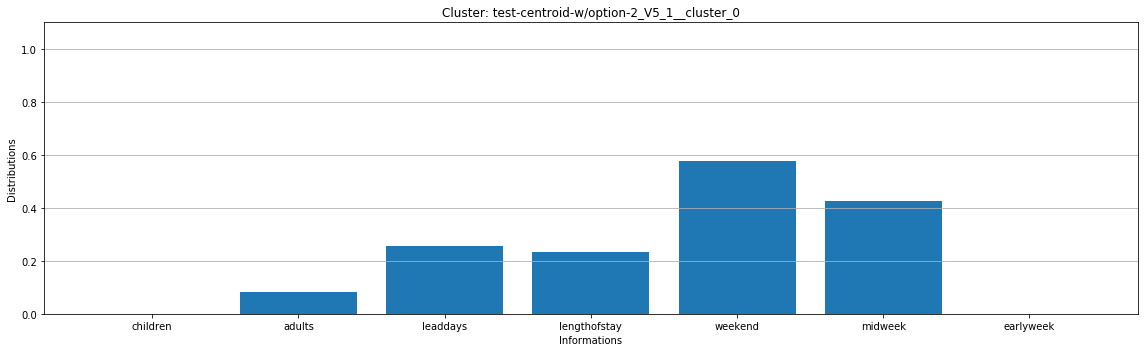

In [27]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

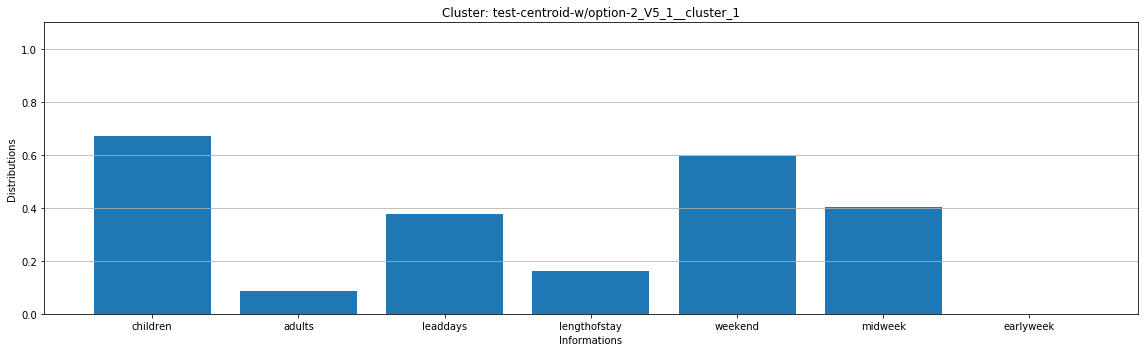

In [28]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

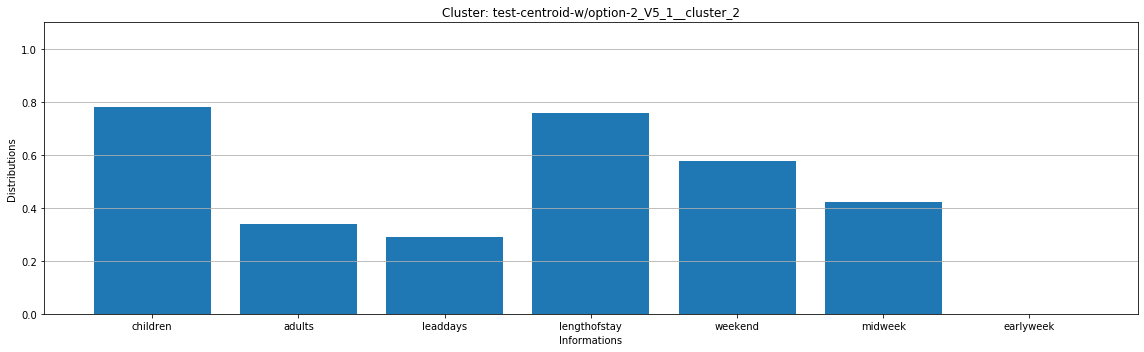

In [29]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

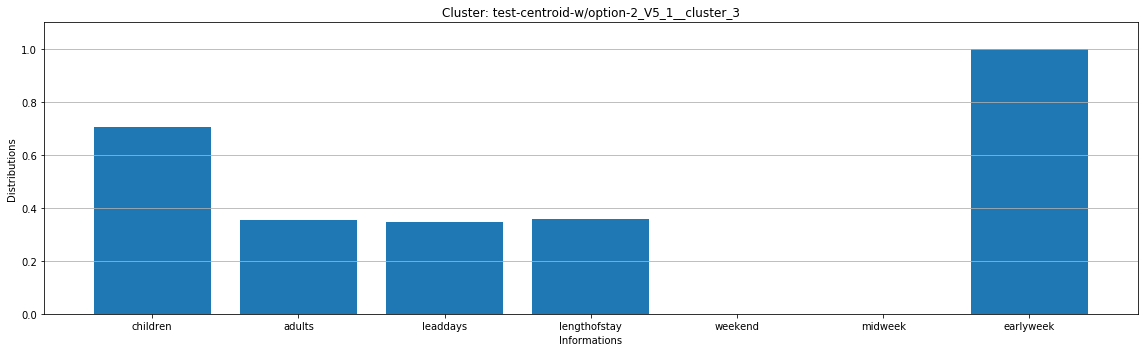

In [30]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

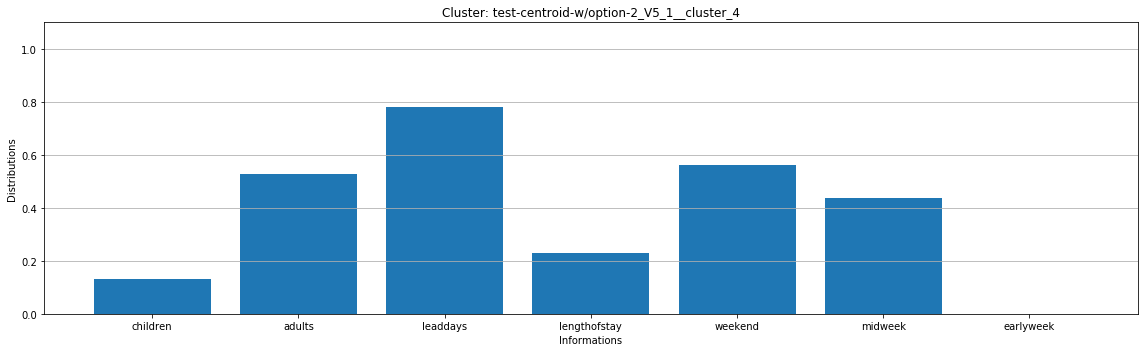

In [31]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_4')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

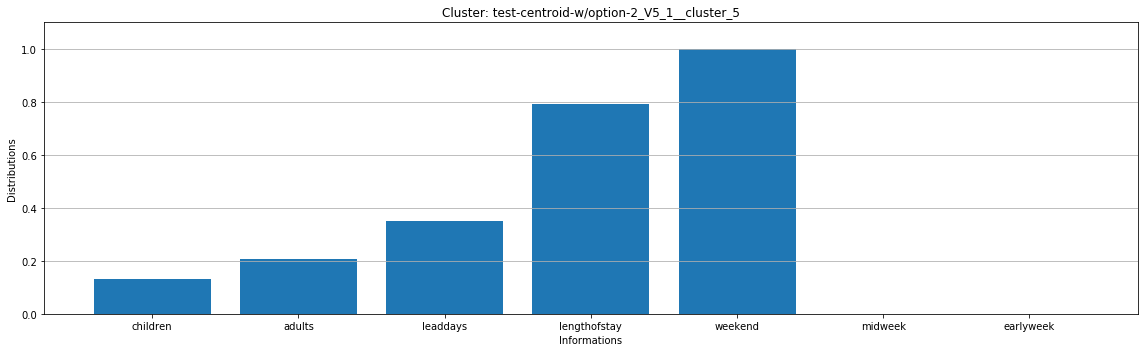

In [32]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[5][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_5')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

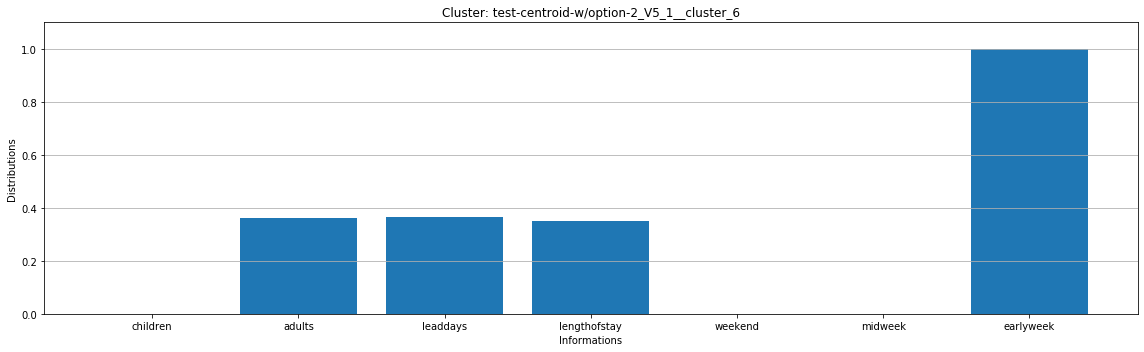

In [33]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[6][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_6')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

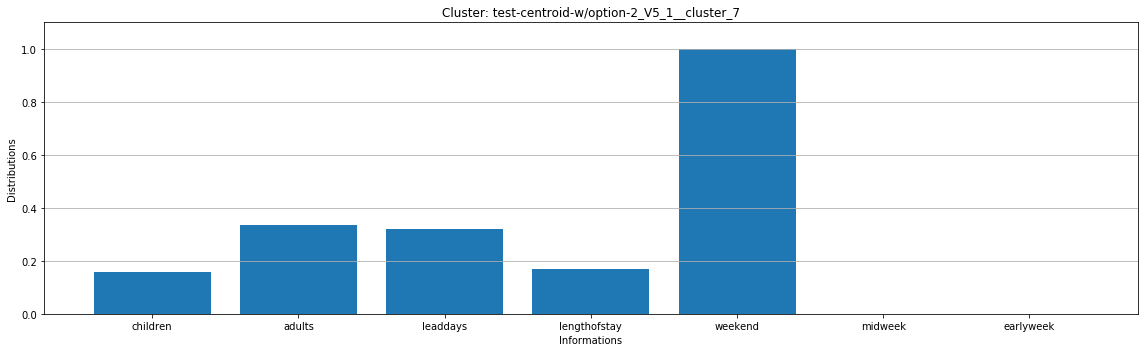

In [34]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[7][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_7')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

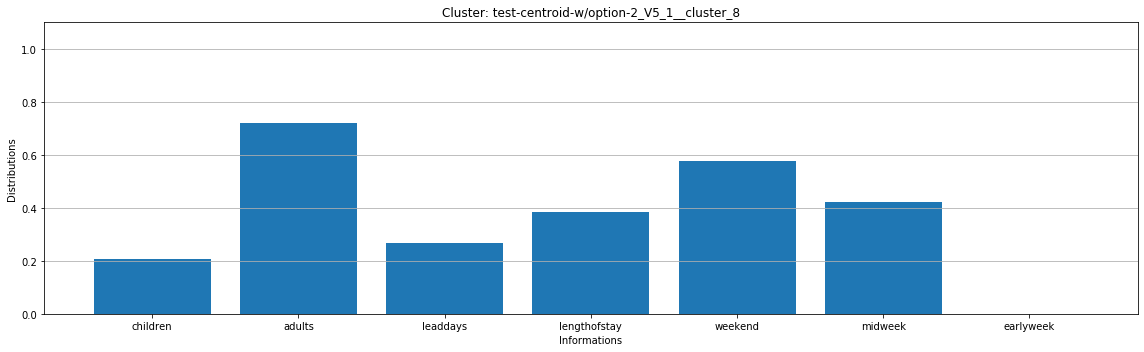

In [35]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[8][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_8')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

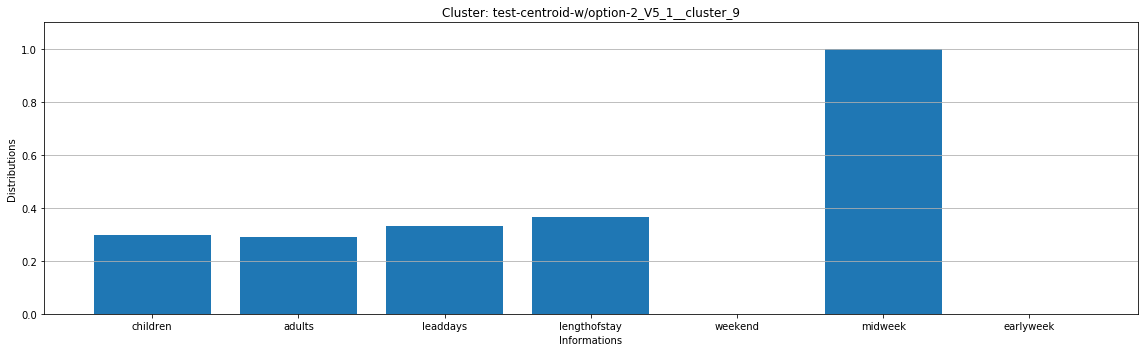

In [36]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[9][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_9')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

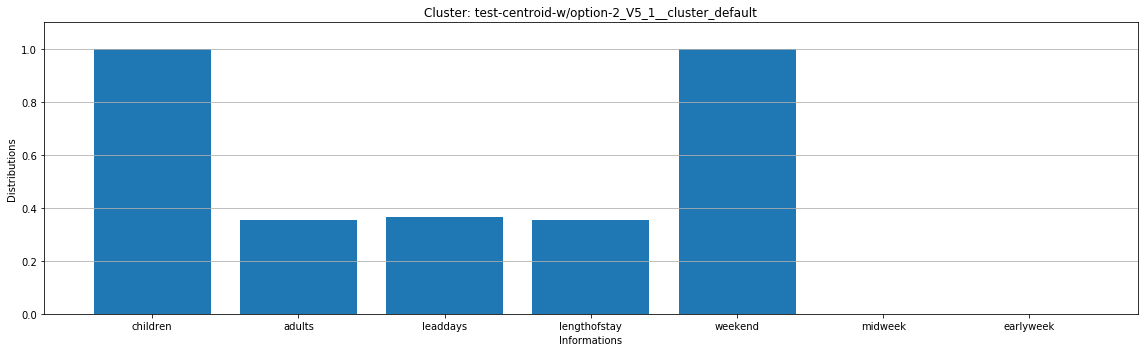

In [37]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[10][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroid-w/option-2_V5_1__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Test - 3
The same as above. Only difference is this time we are looking for "Balanced Clusters". "Balanced Cluster" are a safer and most prudent way to start an experiment. 
What is "Balance Cluster"?
It means, as much as we want to maintain a homogenious clusters, we also care about variations of number of members among each clusters. 

Note: This particular dataset actually produced exactly same set clusters, which is very intresting as well and proves the robustness of the algorithm. Refer to AthenaCustomerSegmentation_Driver_V5.ipynb.

**The pattern we would look for is in attributes of all the encompassed personals of each cluster.**

In [38]:
histrocalDataFilePath = './Mab-Experiment-4-DataForSegmentByDemographics.csv'
dataForPred = pd.read_csv(histrocalDataFilePath)
sourcePath = './Integration-Test-3-withOption2-CentroidsBalanced_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [39]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [40]:
dataForPred['Predicted_Cluster'] = preds

In [41]:
dataForPred['Predicted_Cluster'].value_counts()

test-centroidbalanced-w/option-2_v5_1__cluster_8          2037
test-centroidbalanced-w/option-2_v5_1__cluster_7          2022
test-centroidbalanced-w/option-2_v5_1__cluster_9          1892
test-centroidbalanced-w/option-2_v5_1__cluster_6          1655
test-centroidbalanced-w/option-2_v5_1__cluster_3          1312
test-centroidbalanced-w/option-2_v5_1__cluster_4          1222
test-centroidbalanced-w/option-2_v5_1__cluster_1          1205
test-centroidbalanced-w/option-2_v5_1__cluster_5           989
test-centroidbalanced-w/option-2_v5_1__cluster_0           981
test-centroidbalanced-w/option-2_v5_1__cluster_2           931
test-centroidbalanced-w/option-2_v5_1__cluster_default     754
Name: Predicted_Cluster, dtype: int64

In [42]:
dataForPred.columns

Index(['Adults', 'Children', 'LeadDays', 'LengthOfStay', 'ArrivalDate_WeekDay',
       'Predicted_Cluster'],
      dtype='object')

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are a "categorical" column here, **ArrivalDate_WeekDay**. We will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use the function we have used at the begining of creation of the model for data-preparation or feature engineering. 

In [43]:
columns = [i.lower() for i in list(dataForPred.columns)]
dataForPred['ArrivalDate_WeekDay'] = dataForPred['ArrivalDate_WeekDay'].apply(lambda x: x.strip().lower())
dataForPred.columns = columns
dataForPred, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred)

In [44]:
dataForPred.columns

Index(['predicted_cluster', 'children', 'arrivaldate_weekday', 'adults',
       'lengthofstay', 'leaddays', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

In [45]:
numericalCols = ['children', 'adults', 'leaddays', 'lengthofstay', 'arrivaldate_weekday_weekend',
                'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek']

In [46]:
eps = 0.00000001
for c in numericalCols:
    dataForPred[c] = (dataForPred[c]-min(dataForPred[c]))/(max(dataForPred[c]) - min(dataForPred[c])+eps)
colRename = {'arrivaldate_weekday_weekend': 'weekend',
            'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek'}
dataForPred.rename(columns=colRename, inplace=True)
numericalCols = ['children', 'adults', 'leaddays', 'lengthofstay', 'weekend', 'midweek', 'earlyweek']

In [47]:
dataForPred_DemographicData_Agg = dataForPred.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,children,adults,lengthofstay,leaddays,weekend,midweek,earlyweek
0,test-centroidbalanced-w/option-2_v5_1__cluster_0,0.000000,0.081142,0.235092,0.257594,0.574924,0.425076,0.0
1,test-centroidbalanced-w/option-2_v5_1__cluster_1,0.670124,0.084979,0.159855,0.376971,0.595021,0.404979,0.0
2,test-centroidbalanced-w/option-2_v5_1__cluster_2,0.779270,0.340709,0.757116,0.290172,0.576799,0.423201,0.0
3,test-centroidbalanced-w/option-2_v5_1__cluster_3,0.706936,0.355488,0.356231,0.347424,0.000000,0.000000,1.0
4,test-centroidbalanced-w/option-2_v5_1__cluster_4,0.131751,0.526187,0.228519,0.780867,0.562193,0.437807,0.0
5,test-centroidbalanced-w/option-2_v5_1__cluster_5,0.129929,0.208089,0.791456,0.350920,1.000000,0.000000,0.0
6,test-centroidbalanced-w/option-2_v5_1__cluster_6,0.000000,0.361450,0.349094,0.365190,0.000000,0.000000,1.0
7,test-centroidbalanced-w/option-2_v5_1__cluster_7,0.156281,0.335213,0.168892,0.321563,1.000000,0.000000,0.0
8,test-centroidbalanced-w/option-2_v5_1__cluster_8,0.208149,0.720177,0.382732,0.266637,0.576338,0.423662,0.0
9,test-centroidbalanced-w/option-2_v5_1__cluster_9,0.296776,0.291015,0.364627,0.330386,0.000000,1.000000,0.0


### Plotting

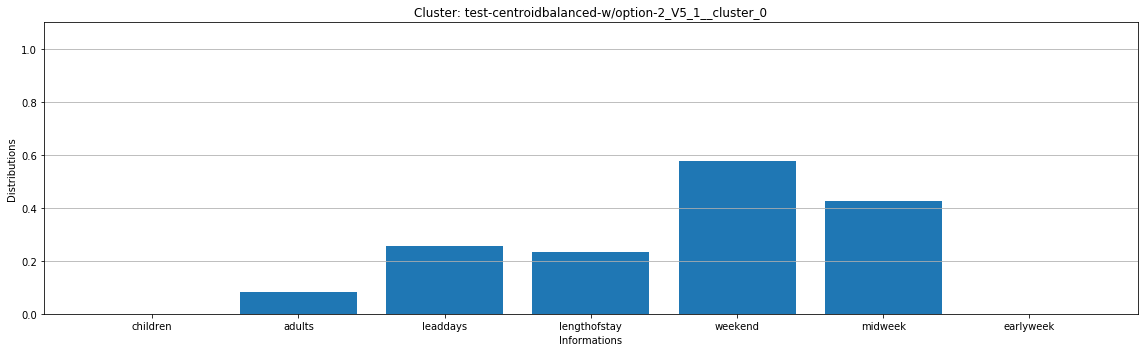

In [48]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

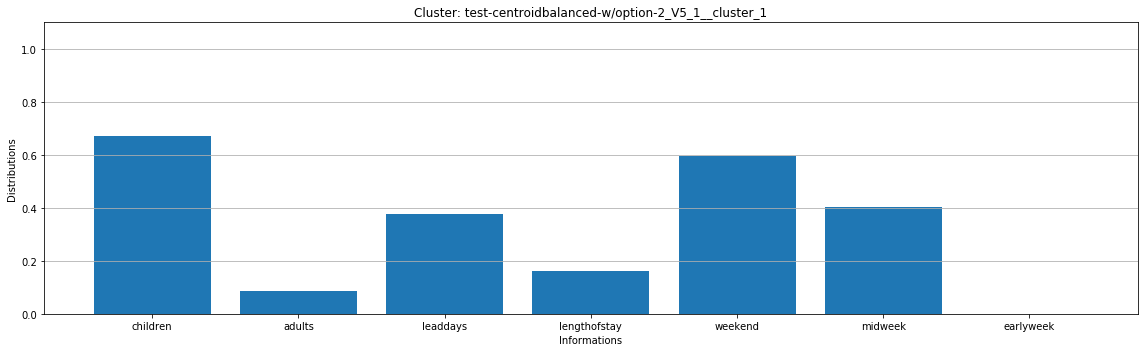

In [49]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

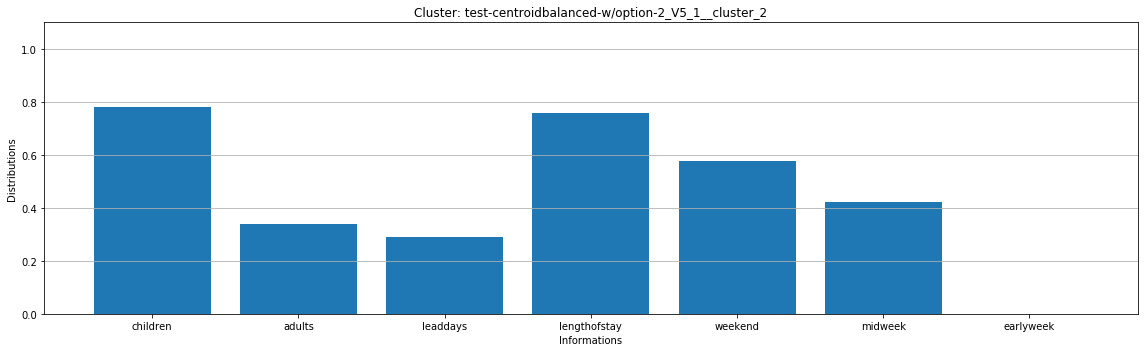

In [50]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

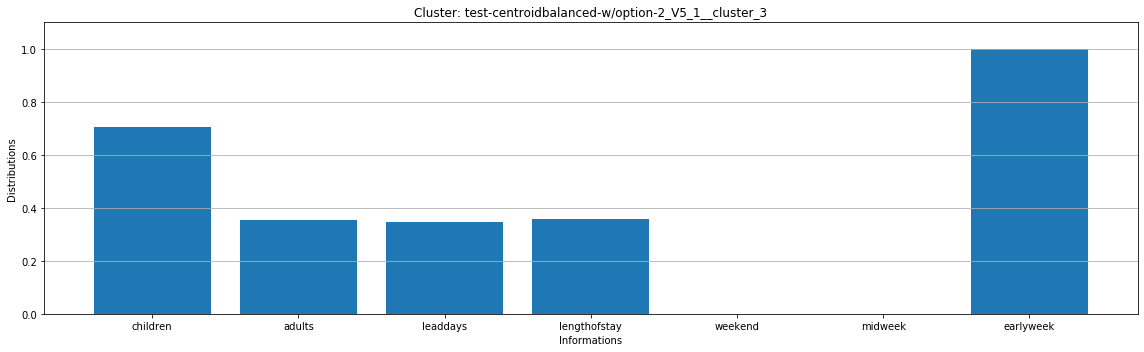

In [51]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

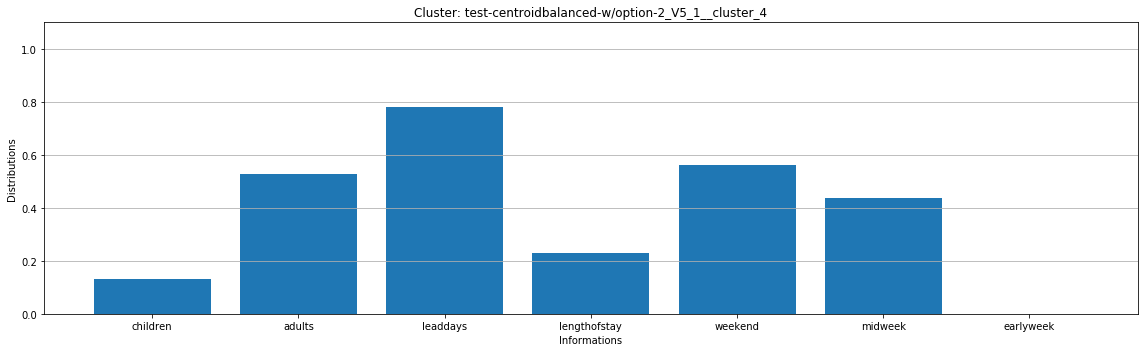

In [52]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_4')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

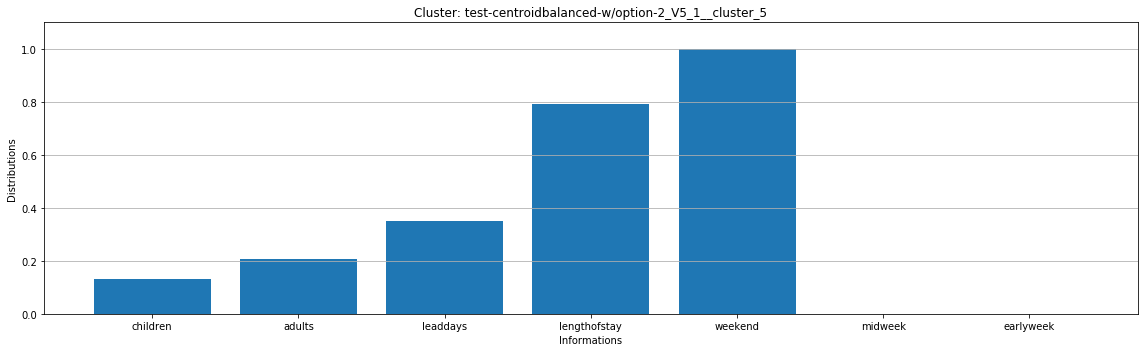

In [53]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[5][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_5')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

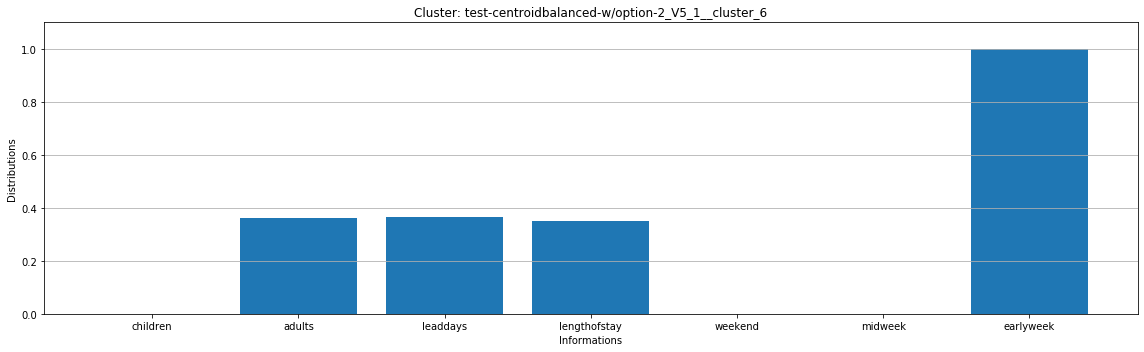

In [54]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[6][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_6')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

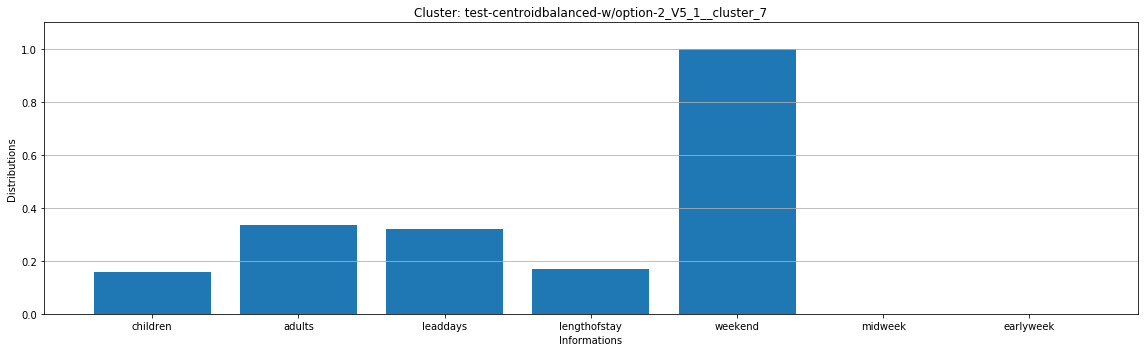

In [55]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[7][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_7')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

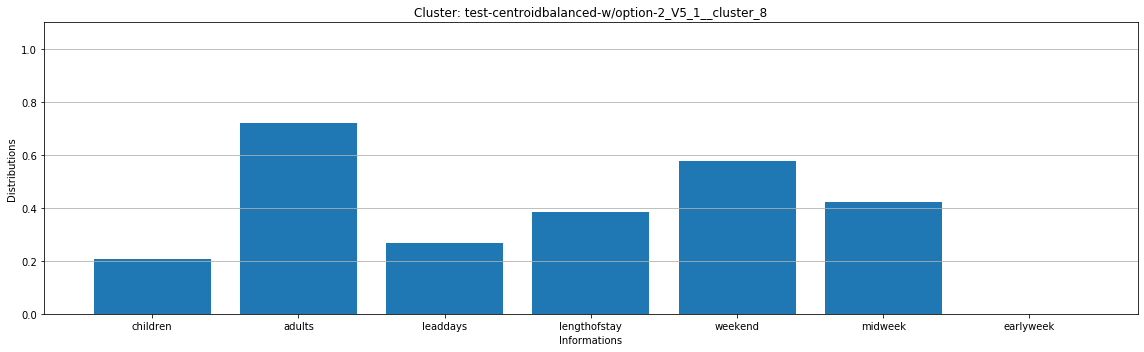

In [56]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[8][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_8')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

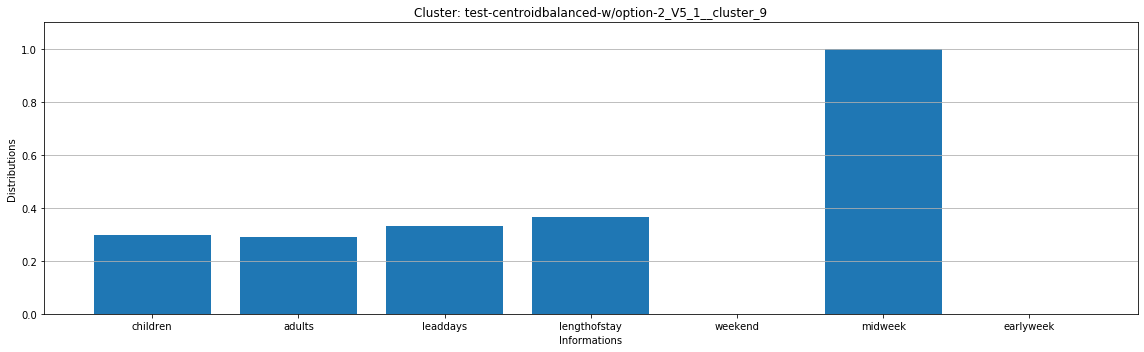

In [57]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[9][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_9')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

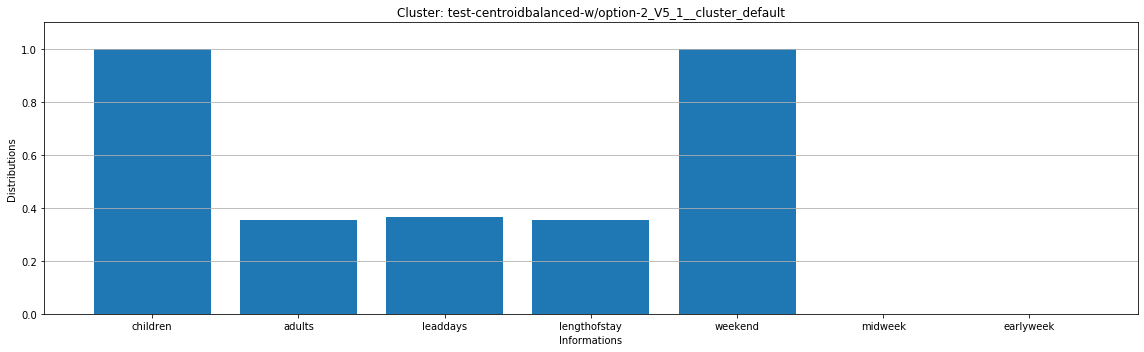

In [58]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[10][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidbalanced-w/option-2_V5_1__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Test - 4

The underlying data is same as above.
But the way the leaf nodes has been brought together is completely different. This process also resuses the same information as it was used to create the tree or for "dividing". But instead of calculating a "centroid" of hyper-rectangles created by the leaf nodes by subsequently dividing the whole space, we calculated average of all the attributes of all the datapoints at each leaf node and used that average information of all leaf nodes to bring all the leaves together.
We are not looking for balaced cluster at this time. 
As before the "conquering" process took a parameter, "min_y", which articulates that we need atleast these amount of members/personal in a group to be considered as a separate cluster. However, for the sake of robustness towards outliers, one and only one group can have less number of members than what is mentioned in "min_y". These are the data points are not similar to other groups significantly and may be among themselves as well. These are the data points which have been separated from well formed clusters because we do not want to disturb the integrity of well-formed clusters. 

**The pattern we would look for is in attributes of all the encompassed personals of each cluster.**

In [59]:
histrocalDataFilePath = './Mab-Experiment-4-DataForSegmentByDemographics.csv'
dataForPred = pd.read_csv(histrocalDataFilePath)
sourcePath = './Integration-Test-4-withOption2-ConquerWithDemographics_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [60]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [61]:
dataForPred['Predicted_Cluster'] = preds

In [62]:
dataForPred['Predicted_Cluster'].value_counts()

test-conquerw/demog-w/option-2_v5_1__cluster_9          2795
test-conquerw/demog-w/option-2_v5_1__cluster_7          1655
test-conquerw/demog-w/option-2_v5_1__cluster_4          1608
test-conquerw/demog-w/option-2_v5_1__cluster_8          1472
test-conquerw/demog-w/option-2_v5_1__cluster_3          1315
test-conquerw/demog-w/option-2_v5_1__cluster_2          1312
test-conquerw/demog-w/option-2_v5_1__cluster_1          1302
test-conquerw/demog-w/option-2_v5_1__cluster_6          1172
test-conquerw/demog-w/option-2_v5_1__cluster_5           940
test-conquerw/demog-w/option-2_v5_1__cluster_0           927
test-conquerw/demog-w/option-2_v5_1__cluster_default     502
Name: Predicted_Cluster, dtype: int64

In [63]:
dataForPred.columns

Index(['Adults', 'Children', 'LeadDays', 'LengthOfStay', 'ArrivalDate_WeekDay',
       'Predicted_Cluster'],
      dtype='object')

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are a "categorical" column here, **ArrivalDate_WeekDay**. We will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use the function we have used at the begining of creation of the model for data-preparation or feature engineering. 

In [64]:
columns = [i.lower() for i in list(dataForPred.columns)]
dataForPred['ArrivalDate_WeekDay'] = dataForPred['ArrivalDate_WeekDay'].apply(lambda x: x.strip().lower())
dataForPred.columns = columns
dataForPred, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred)

In [65]:
dataForPred.columns

Index(['predicted_cluster', 'children', 'arrivaldate_weekday', 'adults',
       'lengthofstay', 'leaddays', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

In [66]:
numericalCols = ['children', 'adults', 'leaddays', 'lengthofstay', 'arrivaldate_weekday_weekend',
                'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek']

In [67]:
eps = 0.00000001
for c in numericalCols:
    dataForPred[c] = (dataForPred[c]-min(dataForPred[c]))/(max(dataForPred[c]) - min(dataForPred[c])+eps)
colRename = {'arrivaldate_weekday_weekend': 'weekend',
            'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek'}
dataForPred.rename(columns=colRename, inplace=True)
numericalCols = ['children', 'adults', 'leaddays', 'lengthofstay', 'weekend', 'midweek', 'earlyweek']

In [68]:
dataForPred_DemographicData_Agg = dataForPred.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,children,adults,lengthofstay,leaddays,weekend,midweek,earlyweek
0,test-conquerw/demog-w/option-2_v5_1__cluster_0,0.138080,0.125351,0.788700,0.340399,0.985976,0.014024,0.0
1,test-conquerw/demog-w/option-2_v5_1__cluster_1,0.000000,0.095392,0.246544,0.388564,0.566820,0.433180,0.0
2,test-conquerw/demog-w/option-2_v5_1__cluster_2,0.706936,0.355488,0.356231,0.347424,0.000000,0.000000,1.0
3,test-conquerw/demog-w/option-2_v5_1__cluster_3,0.164259,0.116958,0.136787,0.388433,0.991635,0.008365,0.0
4,test-conquerw/demog-w/option-2_v5_1__cluster_4,0.660448,0.113433,0.338464,0.309701,0.592040,0.407960,0.0
5,test-conquerw/demog-w/option-2_v5_1__cluster_5,1.000000,0.376170,0.553457,0.398809,0.826596,0.173404,0.0
6,test-conquerw/demog-w/option-2_v5_1__cluster_6,0.348123,0.715188,0.282423,0.289462,0.983788,0.016212,0.0
7,test-conquerw/demog-w/option-2_v5_1__cluster_7,0.000000,0.361450,0.349094,0.365190,0.000000,0.000000,1.0
8,test-conquerw/demog-w/option-2_v5_1__cluster_8,0.380774,0.335598,0.213655,0.294613,0.008832,0.991168,0.0
9,test-conquerw/demog-w/option-2_v5_1__cluster_9,0.181216,0.701395,0.329964,0.415850,0.568157,0.431843,0.0


### Plotting

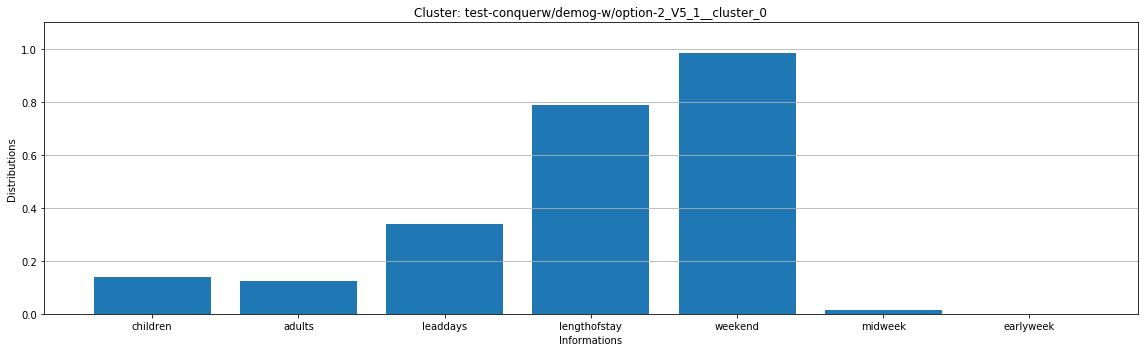

In [69]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

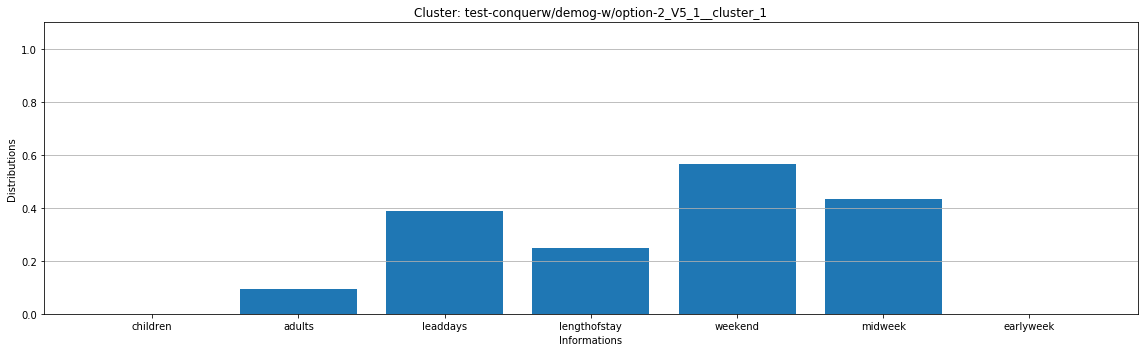

In [70]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

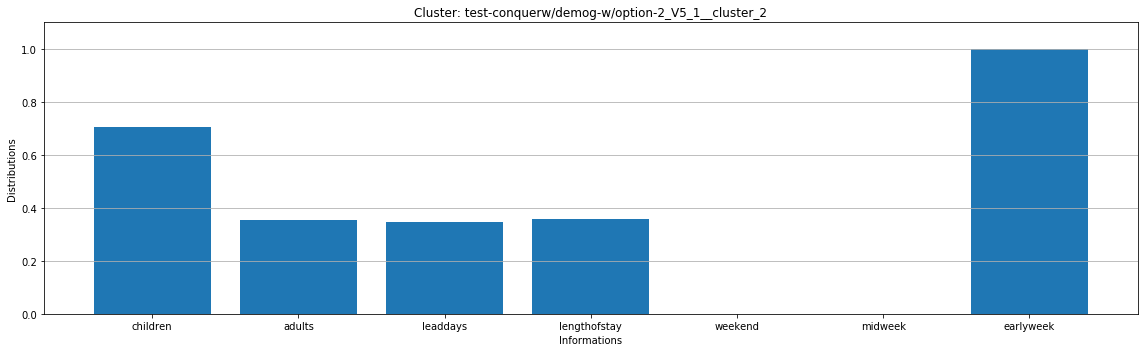

In [71]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

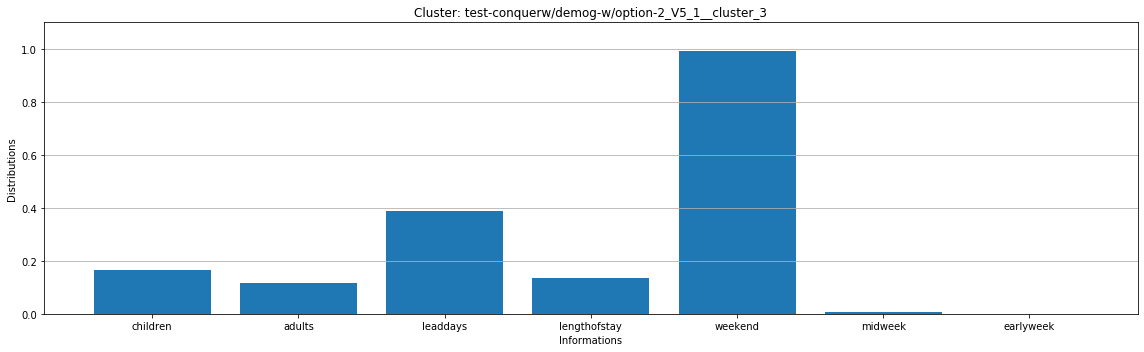

In [72]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

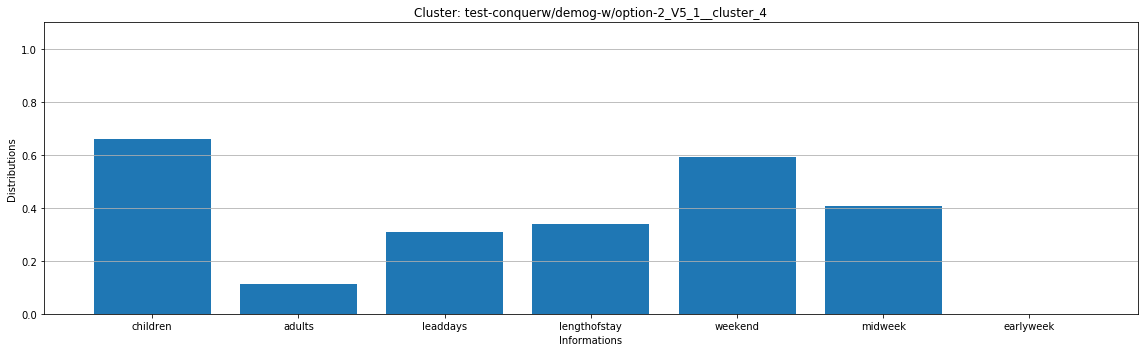

In [73]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_4')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

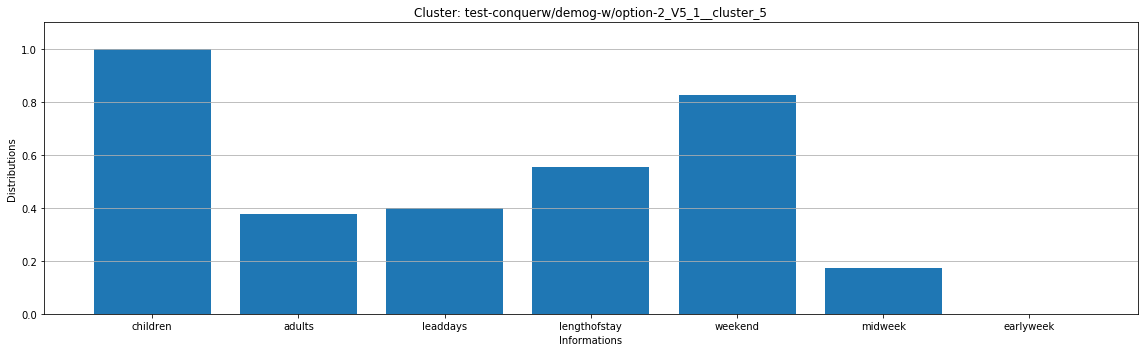

In [74]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[5][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_5')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

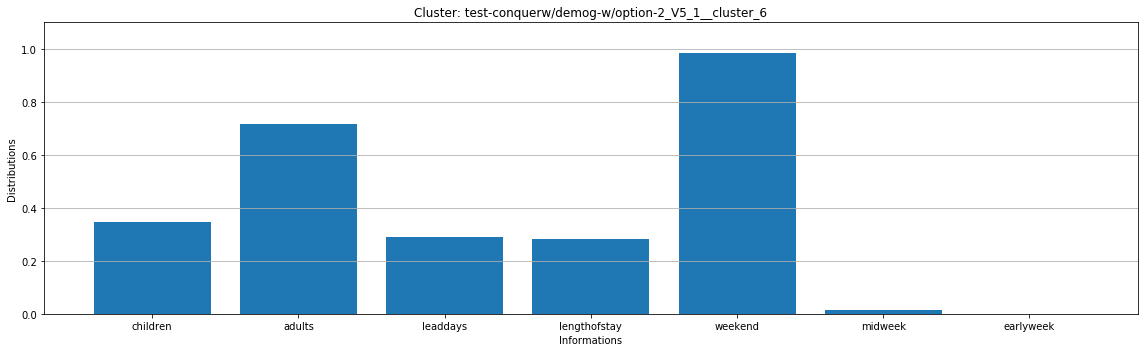

In [75]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[6][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_6')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

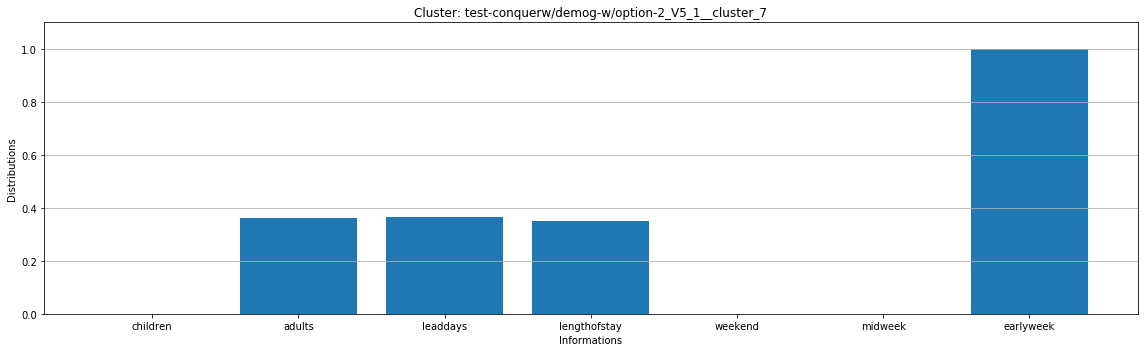

In [76]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[7][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_7')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

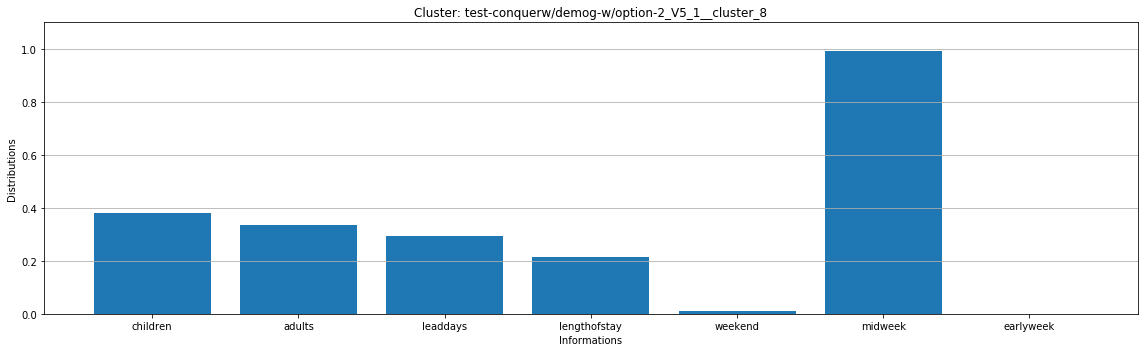

In [77]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[8][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_8')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

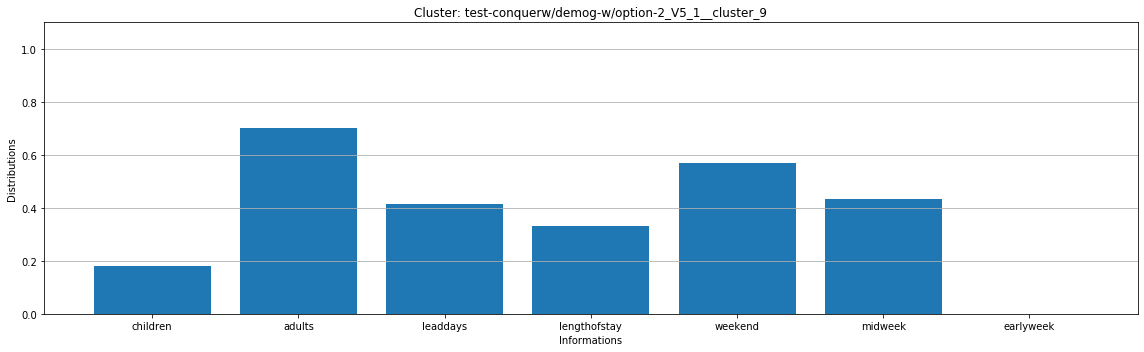

In [78]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[9][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_9')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

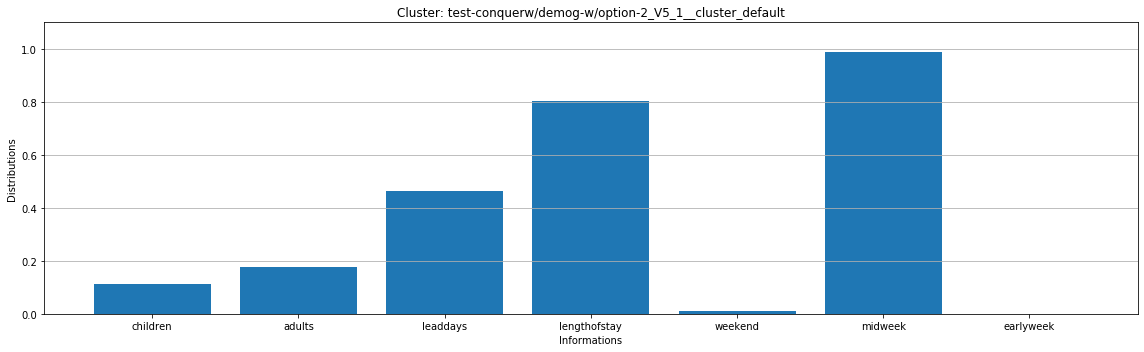

In [79]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[10][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-conquerw/demog-w/option-2_V5_1__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Defination:

   **Seasonality:** Grouping together few "keyString" months. 
    "keyString" is something which is externally provided.
    "keyString" should take value between **("arrival", "booking", "stay" etc.)**
    suppose you want to do seasonality based on "arrival_month", mention "keyString" = "arrival"
    and the data should have "arrival_month"|"month_of_arrival"|"arrivalmonth" etc. in the data colums by the
    time of training.
    If for some reason, you have mention something in "keyString" but there is no column in data
    which associates with "keyString" + "month" irrespective of their position,
    the algorithm will throw an error at the time of training. 
   
    Same for any other string you mention as "keyString". How seasnality happens in a hotel/property/entity , it depends on the perpective of the people in-charge, how they look at their customer base. Also, we have to make sure that we apply seasonality based on something which we can pass at the backend at the time of transaction. Let's say, if "stay" is the keySting and we do not have ability to pass "stay_month" at the time of transaction going on, then we should not apply seasonality for that property. But if you think about it, "arrival" is close to "stay" so, if it is okay with everyone, and the we can replace the "stay" with "arrival" and we can pass "arrival_month" to the backend by the time of live transaction going on, then we should apply "arival" as "keyString" by the time of training and inference. 
    **In general as well, be sure that you are using the same variable name as the time of training vs inference
    otherwise the algotith willl not be able to recognise it and will assume default value for an attribute whenever
    necessary.**
   
   
   **Continous Seasonality:** Grouping together months by similarity among them by some criteria which are only adjacent to each other.
   
   **Discerete Seasonality:** Grouping together months by similarity among them by some criteria irrespective of adjacency.
   
The way seasonality detection algorithm is designed, it is stateless. Only assumption it makes, 
each row is representation is one month and the rows are sorted by month. Ex.: January at row 0 and December at row 11 etc.
**"option" == 3 means you are asking for to detect seasnality from the data** and then create customer segmentation for each season or group of months. 
**"continuousVsDiscrete" is a boolean(True == Continuous, False == Discrete) flag**, based on which "continous" or "discrete" seasonality detection gets triggered. The default value for this flag is "True" (or Continuous). 

Alternatively, suppose you want to **detect seasonality based on a different dataset than dataset used for core segmentation.** Ex. You have been provided a sales statistics and based on that we have to detect seasnality and once we have groupped together months based on the separate data, we will continue to our task of segmentation for each group of month based on the primary data. **"seasonalityDataPath" is the variable to provide path of secondary datasource to detect seasonality from it.**

In addition, one can choose to provide **"manualSeasonality". Ex:  manualSeasonality = [[1,2,3,4], [5,12,7], [6,8,9,10,11]]**

## Test - 6

This one has "continuous" seasonality implemented on "arrival" month.
1st the "continous" seasnality detection algorithm kicks in. 
Based on how "arrival" months are groupped together, the core segmentation algorithm looks
at a subset of the data based a "season" or group of "arrival" months and then create
a tree same way as previous and conquer them by "centroid" of the hyper rectangle created by the leaves. 
We are not looking for balanced cluster here. This process continues for each group months at a time,
them at last all the trees gets merged together. 

The "conquering" process is similar to **Test - 2**


In [80]:
histrocalDataFilePath = './RezSnapShot_2018_78111-3.csv'
dataForPred = pd.read_csv(histrocalDataFilePath, delimiter=';')
sourcePath = './Integration-Test-6-withOption3-CentroidMerging_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [81]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [82]:
dataForPred['Predicted_Cluster'] = preds

In [83]:
dataForPred['Predicted_Cluster'].value_counts()

test-centroidmerging-w/option-3_v5_1_12111095687__cluster_2          3529
test-centroidmerging-w/option-3_v5_1_12111095687__cluster_4          3350
test-centroidmerging-w/option-3_v5_1_12111095687__cluster_1          2650
test-centroidmerging-w/option-3_v5_1_12111095687__cluster_0          2578
test-centroidmerging-w/option-3_v5_1_43__cluster_0                   2457
test-centroidmerging-w/option-3_v5_1_12111095687__cluster_3          1691
test-centroidmerging-w/option-3_v5_1_21__cluster_0                   1552
test-centroidmerging-w/option-3_v5_1_21__cluster_1                   1115
test-centroidmerging-w/option-3_v5_1_12111095687__cluster_5          1080
test-centroidmerging-w/option-3_v5_1_43__cluster_default              887
test-centroidmerging-w/option-3_v5_1_21__cluster_default              871
test-centroidmerging-w/option-3_v5_1_12111095687__cluster_default     628
Name: Predicted_Cluster, dtype: int64

In [84]:
dataForPred.tail()

,ArrivalDate_Weekday,Arrival_Month,LeadDays,nights_qty,room_qty,adult_qty,child_qty,infant_qty,Predicted_Cluster
22383,MONDAY,10,0,4,1,2,0,0,test-centroidmerging-w/option-3_v5_1_121110956...
22384,THURSDAY,11,6,4,1,2,0,0,test-centroidmerging-w/option-3_v5_1_121110956...
22385,MONDAY,12,28,4,1,1,0,0,test-centroidmerging-w/option-3_v5_1_121110956...
22386,MONDAY,11,1,4,1,1,0,0,test-centroidmerging-w/option-3_v5_1_121110956...
22387,MONDAY,11,1,3,1,1,0,0,test-centroidmerging-w/option-3_v5_1_121110956...


In [85]:
dataForPred.head()

,ArrivalDate_Weekday,Arrival_Month,LeadDays,nights_qty,room_qty,adult_qty,child_qty,infant_qty,Predicted_Cluster
0,SUNDAY,2,104,2,1,1,0,0,test-centroidmerging-w/option-3_v5_1_21__clust...
1,MONDAY,1,66,1,1,1,0,0,test-centroidmerging-w/option-3_v5_1_21__clust...
2,MONDAY,1,42,1,1,1,0,0,test-centroidmerging-w/option-3_v5_1_21__clust...
3,MONDAY,1,42,1,1,1,0,0,test-centroidmerging-w/option-3_v5_1_21__clust...
4,MONDAY,1,39,1,1,1,0,0,test-centroidmerging-w/option-3_v5_1_21__clust...


In [86]:
dataForPred.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'nights_qty',
       'room_qty', 'adult_qty', 'child_qty', 'infant_qty',
       'Predicted_Cluster'],
      dtype='object')

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are a "categorical" column here, **ArrivalDate_WeekDay**. We will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use the function we have used at the begining of creation of the model for data-preparation or feature engineering. 

In [87]:
columns = [i.lower() for i in list(dataForPred.columns)]
dataForPred['ArrivalDate_Weekday'] = dataForPred['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred.columns = columns
dataForPred, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred)

In [88]:
dataForPred.columns

Index(['nights_qty', 'predicted_cluster', 'child_qty', 'arrivaldate_weekday',
       'adult_qty', 'arrival_month', 'room_qty', 'leaddays', 'infant_qty',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek'],
      dtype='object')

### Refer to AthenaCustomerSegmentation_Driver_V5 >> Test 6
**2019-12-19 17:27:50,472 - 4574004672 - INFO - Cluster of months: {'Cluster-1': [12, 11, 10, 9, 5, 6, 8, 7], 'Cluster-2': [1, 2], 'Cluster-3': [4, 3]}**
So we will plot one season at a time

In [89]:
numericalCols = ['nights_qty', 'adult_qty', 'child_qty', 'leaddays',
       'room_qty', 'infant_qty','arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek']

### Season 1:  arrival_month in [12, 11, 10, 9, 5, 6, 7, 8]

In [90]:
dataForPred_12111095678 = dataForPred[dataForPred['arrival_month'].isin([12, 11, 10, 9, 5, 6, 7, 8])].copy(deep=True)
eps = 0.00000001
for c in numericalCols:
    dataForPred_12111095678[c] = (dataForPred_12111095678[c]-min(dataForPred_12111095678[c]))/\
    (max(dataForPred_12111095678[c]) - min(dataForPred_12111095678[c])+eps)
colRename = {'arrivaldate_weekday_weekend': 'weekend',
            'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek'}
dataForPred_12111095678.rename(columns=colRename, inplace=True)
numericalCols = ['nights_qty', 'adult_qty', 'child_qty', 'leaddays',
                   'room_qty', 'infant_qty', 'weekend', 'midweek', 'earlyweek']
dataForPred_DemographicData_Agg = dataForPred_12111095678.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-centroidmerging-w/option-3_v5_1_121110956...,0.016452,0.000000,0.250000,8.762219,0.000388,0.037927,0.0,0.000000,1.000000,0.000000
1,test-centroidmerging-w/option-3_v5_1_121110956...,0.033175,0.011572,0.499434,8.386415,0.000000,0.062420,0.0,0.000000,1.000000,0.000000
2,test-centroidmerging-w/option-3_v5_1_121110956...,0.025896,0.010768,0.397634,8.488524,0.000000,0.056491,0.0,0.000000,0.000000,1.000000
3,test-centroidmerging-w/option-3_v5_1_121110956...,0.032762,0.043761,0.506949,8.248374,0.000000,0.131354,0.0,0.486103,0.513897,0.000000
4,test-centroidmerging-w/option-3_v5_1_121110956...,0.025458,0.005771,0.423881,8.294627,0.000000,0.047446,0.0,1.000000,0.000000,0.000000
5,test-centroidmerging-w/option-3_v5_1_121110956...,0.078770,0.064815,0.412731,8.427778,0.000000,0.183297,0.0,0.462037,0.126852,0.411111
6,test-centroidmerging-w/option-3_v5_1_121110956...,0.057598,0.026539,0.376990,8.318471,0.000000,0.103804,0.0,0.000000,0.520701,0.479299


### Plotting

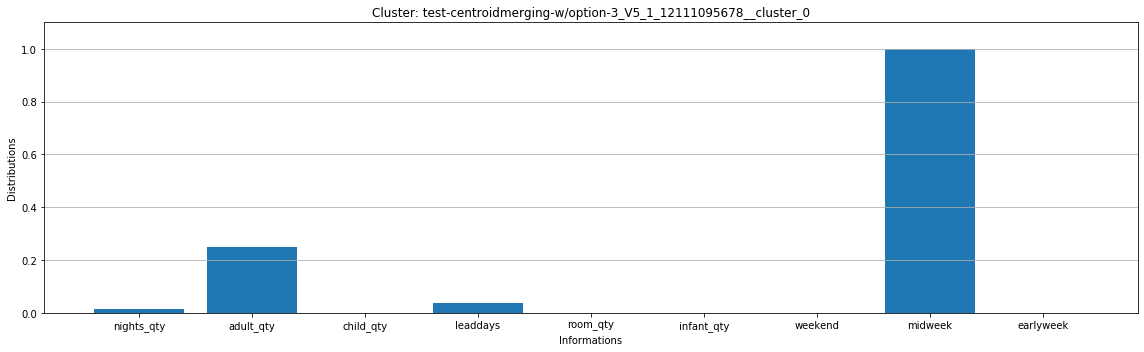

In [91]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_12111095678__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

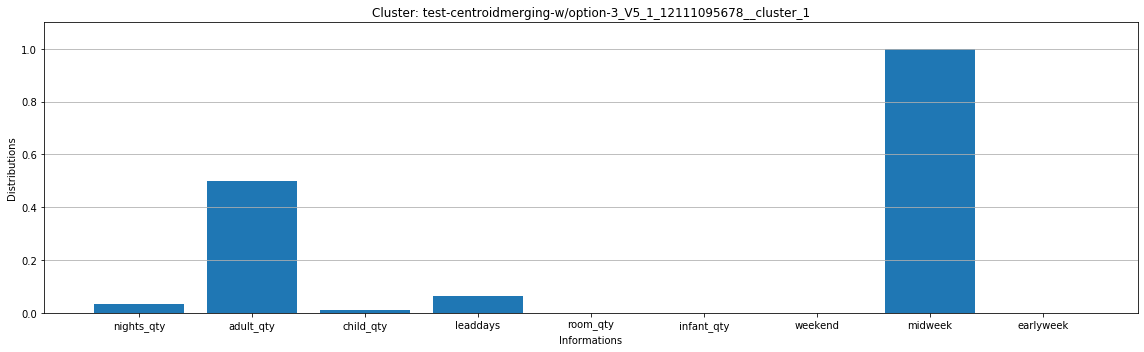

In [92]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_12111095678__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

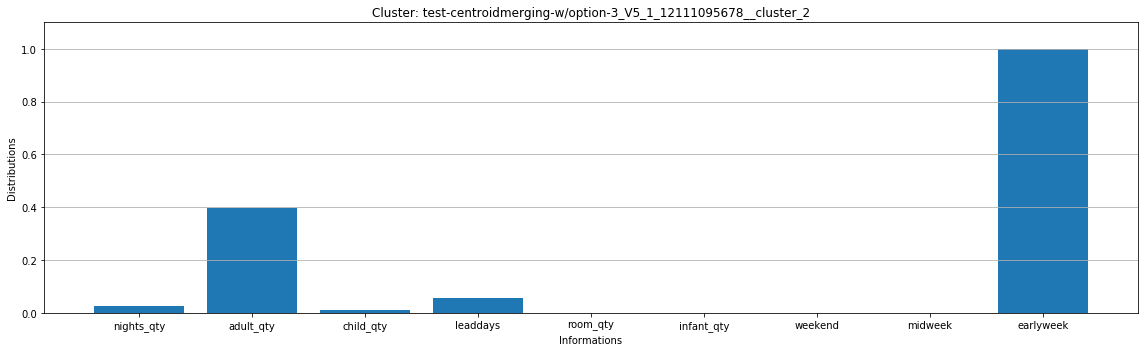

In [93]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_12111095678__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

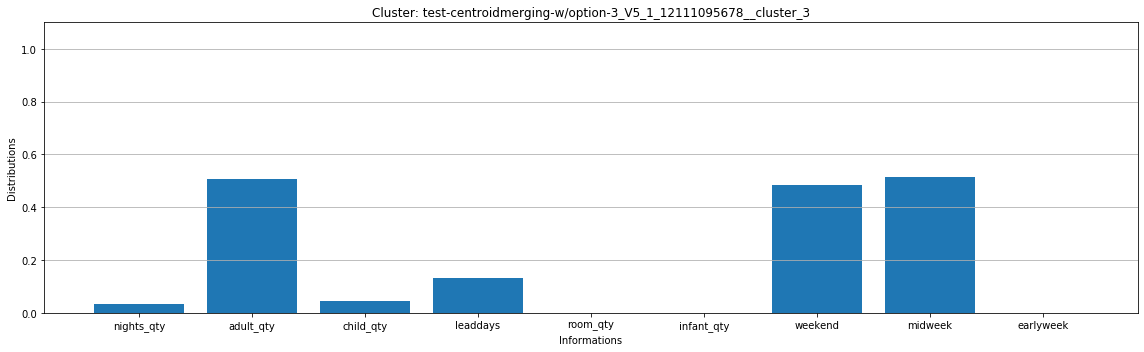

In [94]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_12111095678__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

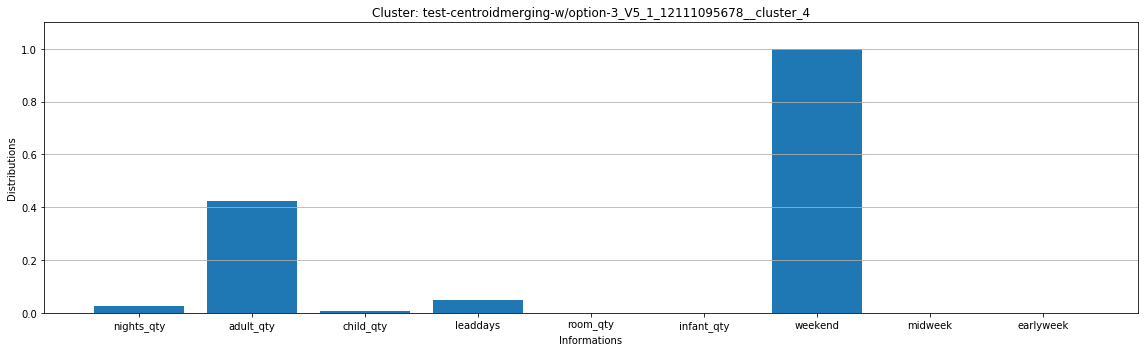

In [95]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_12111095678__cluster_4')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

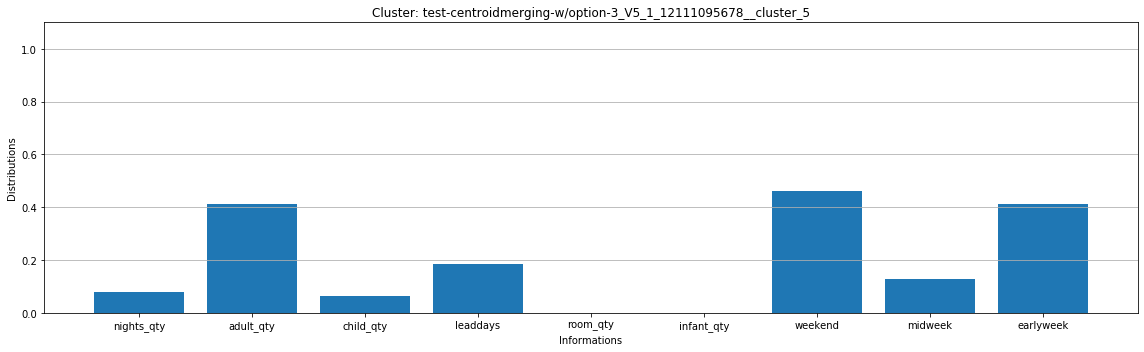

In [96]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[5][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_12111095678__cluster_5')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

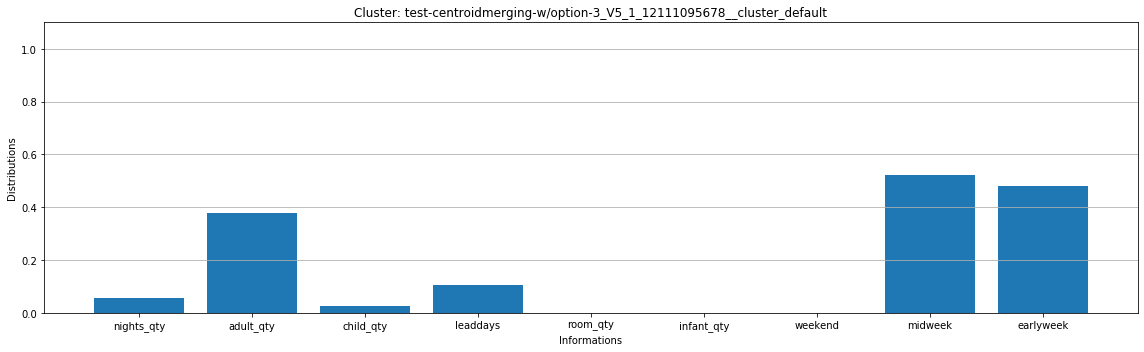

In [97]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[6][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_12111095678__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 2:  arrival_month in [1, 2]

In [98]:
numericalCols = ['nights_qty', 'adult_qty', 'child_qty', 'leaddays',
       'room_qty', 'infant_qty','arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek']
dataForPred_12 = dataForPred[dataForPred['arrival_month'].isin([1,2])].copy(deep=True)
eps = 0.00000001
for c in numericalCols:
    dataForPred_12[c] = (dataForPred_12[c]-min(dataForPred_12[c]))/\
                    (max(dataForPred_12[c]) - min(dataForPred_12[c])+eps)
colRename = {'arrivaldate_weekday_weekend': 'weekend',
            'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek'}
dataForPred_12.rename(columns=colRename, inplace=True)
numericalCols = ['nights_qty', 'adult_qty', 'child_qty', 'leaddays',
                   'room_qty', 'infant_qty', 'weekend', 'midweek', 'earlyweek']
dataForPred_DemographicData_Agg = dataForPred_12.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-centroidmerging-w/option-3_v5_1_21__clust...,0.037187,0.007732,0.246134,1.345361,0.000644,0.095175,0.0,0.000000,1.000000,0.000000
1,test-centroidmerging-w/option-3_v5_1_21__clust...,0.052552,0.025112,0.250673,1.460987,0.000897,0.106369,0.0,0.035874,0.067265,0.896861
2,test-centroidmerging-w/option-3_v5_1_21__clust...,0.043409,0.006889,0.365098,1.409874,0.000000,0.088467,0.0,1.000000,0.000000,0.000000


### Plotting

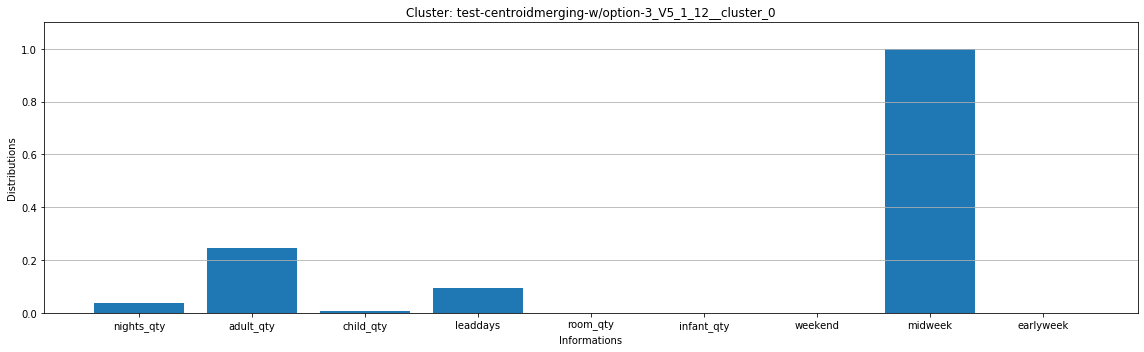

In [99]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_12__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

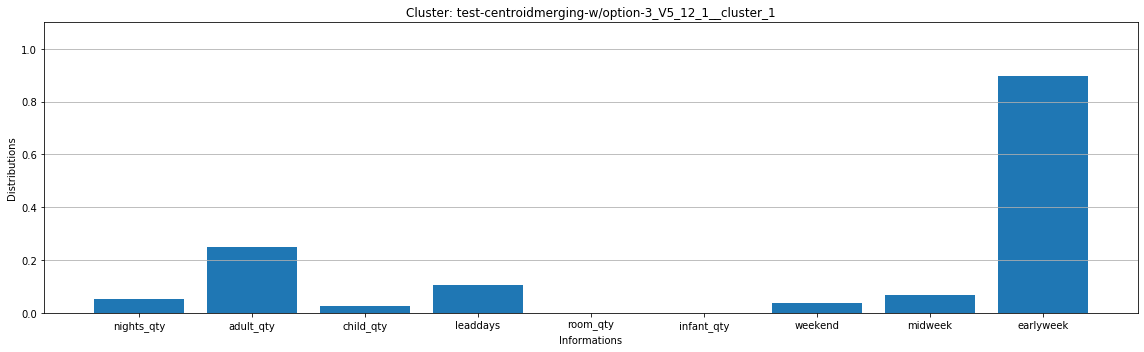

In [100]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_12_1__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

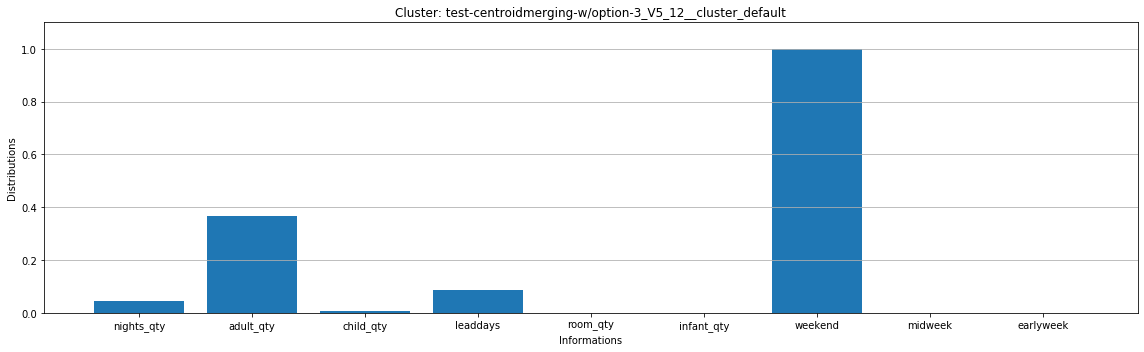

In [101]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_12__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 3:  arrival_month in [3, 4]

In [102]:
numericalCols = ['nights_qty', 'adult_qty', 'child_qty', 'leaddays',
       'room_qty', 'infant_qty','arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek']
dataForPred_34 = dataForPred[dataForPred['arrival_month'].isin([3,4])].copy(deep=True)
eps = 0.00000001
for c in numericalCols:
    dataForPred_34[c] = (dataForPred_34[c]-min(dataForPred_34[c]))/\
                    (max(dataForPred_34[c]) - min(dataForPred_34[c])+eps)
colRename = {'arrivaldate_weekday_weekend': 'weekend',
            'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek'}

dataForPred_34.rename(columns=colRename, inplace=True)
numericalCols = ['nights_qty', 'adult_qty', 'child_qty', 'leaddays',
                   'room_qty', 'infant_qty', 'weekend', 'midweek', 'earlyweek']

dataForPred_DemographicData_Agg = dataForPred_34.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-centroidmerging-w/option-3_v5_1_43__clust...,0.127646,0.018519,0.282051,3.474562,0.0,0.073468,0.0,0.396011,0.575906,0.028083
1,test-centroidmerging-w/option-3_v5_1_43__clust...,0.128664,0.012401,0.228861,3.547914,0.0,0.067936,0.0,0.001127,0.002255,0.996618


### Plotting

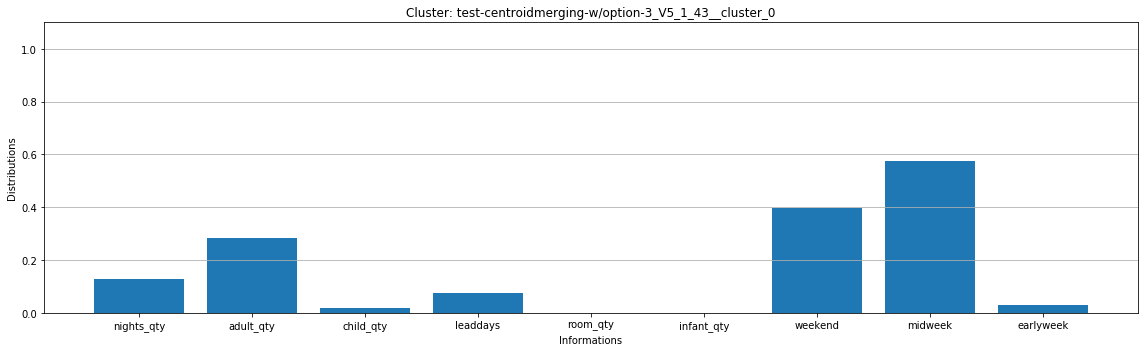

In [103]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_1_43__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

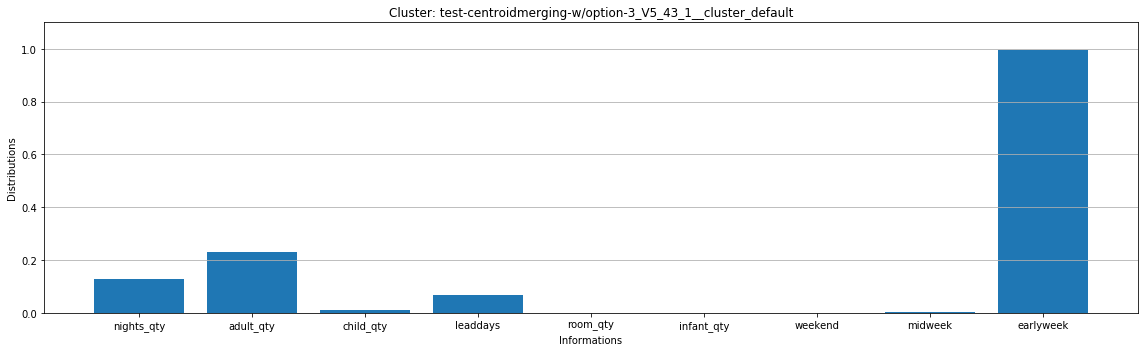

In [104]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmerging-w/option-3_V5_43_1__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Test - 7

This one has **"discrete" seasonality implemented on **"arrival" month.**
1st the **"discrete" seasnality detection algorithm** kicks in. 
Based on how "arrival" months are groupped together, the core segmentation algorithm looks
at a subset of the data based a "season" or group of "arrival" months and then create
a tree same way as previous and conquer them by "centroid" of the hyper rectangle created by the leaves. 
**We are looking for balanced cluster here**. This process continues for each group months at a time,
them at last all the trees gets merged together. 

The "conquering" process is similar to **Test - 3**


In [105]:
histrocalDataFilePath = './RezSnapShot_2018_78111-3.csv'
dataForPred = pd.read_csv(histrocalDataFilePath, delimiter=';')
sourcePath = './Integration-Test-7-withOption3-CentroidMergingBalanced_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [106]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [107]:
dataForPred['Predicted_Cluster'] = preds

In [108]:
dataForPred['Predicted_Cluster'].value_counts()

test-centroidmergingbalanced-w/option-3_v5_1_1578__cluster_2           2955
test-centroidmergingbalanced-w/option-3_v5_1_610912__cluster_1         2751
test-centroidmergingbalanced-w/option-3_v5_1_610912__cluster_0         2024
test-centroidmergingbalanced-w/option-3_v5_1_610912__cluster_2         1937
test-centroidmergingbalanced-w/option-3_v5_1_1578__cluster_0           1822
test-centroidmergingbalanced-w/option-3_v5_1_1578__cluster_1           1738
test-centroidmergingbalanced-w/option-3_v5_1_43211__cluster_3          1664
test-centroidmergingbalanced-w/option-3_v5_1_43211__cluster_2          1637
test-centroidmergingbalanced-w/option-3_v5_1_43211__cluster_1          1623
test-centroidmergingbalanced-w/option-3_v5_1_610912__cluster_3         1452
test-centroidmergingbalanced-w/option-3_v5_1_1578__cluster_3           1219
test-centroidmergingbalanced-w/option-3_v5_1_43211__cluster_0           932
test-centroidmergingbalanced-w/option-3_v5_1_43211__cluster_default     634
Name: Predic

In [109]:
dataForPred.tail()

,ArrivalDate_Weekday,Arrival_Month,LeadDays,nights_qty,room_qty,adult_qty,child_qty,infant_qty,Predicted_Cluster
22383,MONDAY,10,0,4,1,2,0,0,test-centroidmergingbalanced-w/option-3_v5_1_6...
22384,THURSDAY,11,6,4,1,2,0,0,test-centroidmergingbalanced-w/option-3_v5_1_4...
22385,MONDAY,12,28,4,1,1,0,0,test-centroidmergingbalanced-w/option-3_v5_1_6...
22386,MONDAY,11,1,4,1,1,0,0,test-centroidmergingbalanced-w/option-3_v5_1_4...
22387,MONDAY,11,1,3,1,1,0,0,test-centroidmergingbalanced-w/option-3_v5_1_4...


In [110]:
dataForPred.head()

,ArrivalDate_Weekday,Arrival_Month,LeadDays,nights_qty,room_qty,adult_qty,child_qty,infant_qty,Predicted_Cluster
0,SUNDAY,2,104,2,1,1,0,0,test-centroidmergingbalanced-w/option-3_v5_1_4...
1,MONDAY,1,66,1,1,1,0,0,test-centroidmergingbalanced-w/option-3_v5_1_1...
2,MONDAY,1,42,1,1,1,0,0,test-centroidmergingbalanced-w/option-3_v5_1_1...
3,MONDAY,1,42,1,1,1,0,0,test-centroidmergingbalanced-w/option-3_v5_1_1...
4,MONDAY,1,39,1,1,1,0,0,test-centroidmergingbalanced-w/option-3_v5_1_1...


In [111]:
dataForPred.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'nights_qty',
       'room_qty', 'adult_qty', 'child_qty', 'infant_qty',
       'Predicted_Cluster'],
      dtype='object')

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are a "categorical" column here, **ArrivalDate_WeekDay**. We will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use the function we have used at the begining of creation of the model for data-preparation or feature engineering. 

In [112]:
columns = [i.lower() for i in list(dataForPred.columns)]
dataForPred['ArrivalDate_Weekday'] = dataForPred['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred.columns = columns
dataForPred, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred)

In [113]:
dataForPred.columns

Index(['nights_qty', 'predicted_cluster', 'child_qty', 'arrivaldate_weekday',
       'adult_qty', 'arrival_month', 'room_qty', 'leaddays', 'infant_qty',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek'],
      dtype='object')

### Refer to AthenaCustomerSegmentation_Driver_V5 >> Test 7
**2019-12-19 17:32:03,164 - 4574004672 - INFO - Cluster of months: {'Cluster-1': [6, 10, 9, 12], 'Cluster-2': [1, 5, 7, 8], 'Cluster-3': [4, 3, 2, 11]}**

So we will plot one season at a time

In [114]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek'}
dataForPred.rename(columns=colRename, inplace=True)

In [115]:
numericalCols = ['nights_qty', 'adult_qty', 'child_qty', 'leaddays',
                'room_qty', 'infant_qty','weekend', 'midweek', 'earlyweek']

### Season 1:  arrival_month in [6, 10, 9, 12]

In [116]:
dataForPred_610912 = dataForPred[dataForPred['arrival_month'].isin([6,10,9,12])].copy(deep=True)

eps = 0.00000001
for c in numericalCols:
    dataForPred_610912[c] = (dataForPred_610912[c]-min(dataForPred_610912[c]))/\
    (max(dataForPred_610912[c]) - min(dataForPred_610912[c])+eps)

dataForPred_DemographicData_Agg = dataForPred_610912.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-centroidmergingbalanced-w/option-3_v5_1_6...,0.028466,0.006094,0.381423,9.169466,0.000000,0.066588,0.0,0.000000,0.000000,1.000000
1,test-centroidmergingbalanced-w/option-3_v5_1_6...,0.023316,0.004120,0.372410,9.334787,0.000364,0.054522,0.0,0.000000,1.000000,0.000000
2,test-centroidmergingbalanced-w/option-3_v5_1_6...,0.025850,0.008260,0.423980,8.937532,0.000000,0.077825,0.0,0.996386,0.002065,0.001549
3,test-centroidmergingbalanced-w/option-3_v5_1_6...,0.052361,0.058310,0.441460,9.267218,0.000000,0.123257,0.0,0.399449,0.423554,0.176997


### Plotting

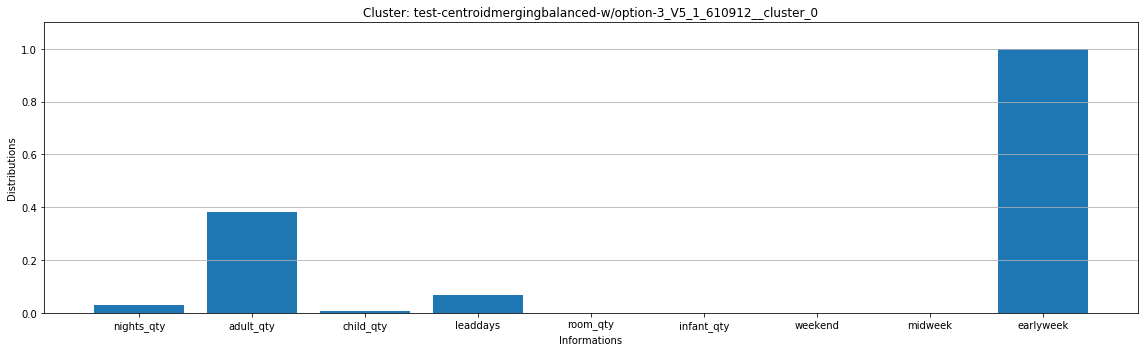

In [117]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_610912__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

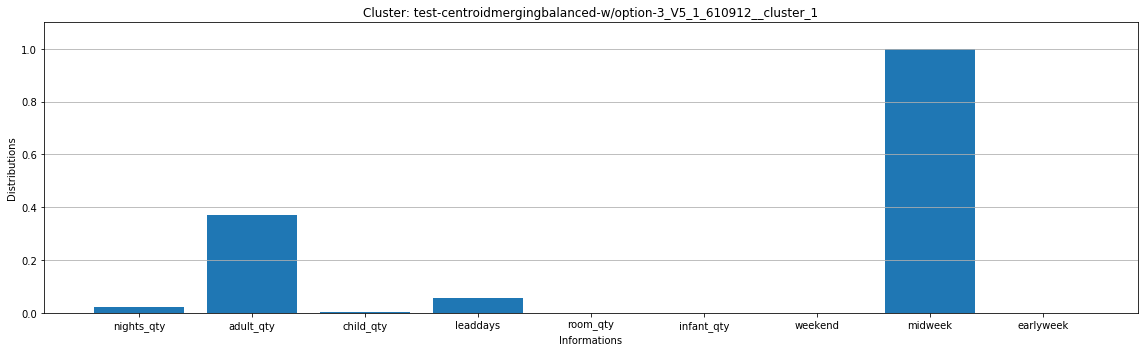

In [118]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_610912__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

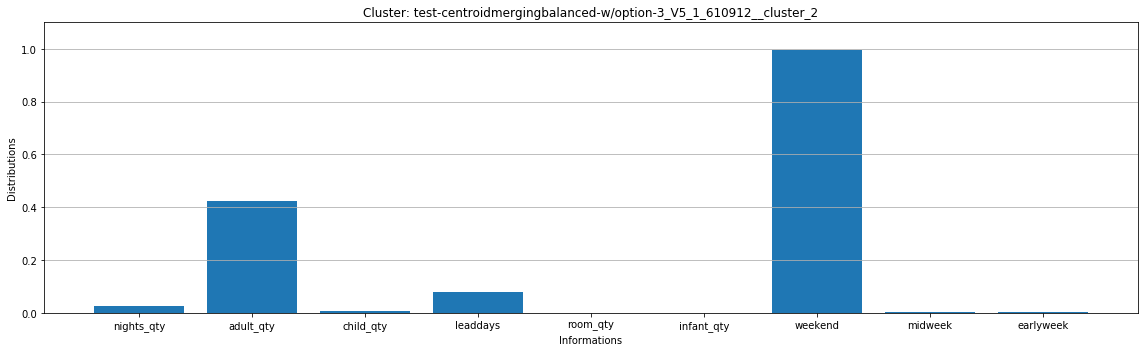

In [119]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_610912__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

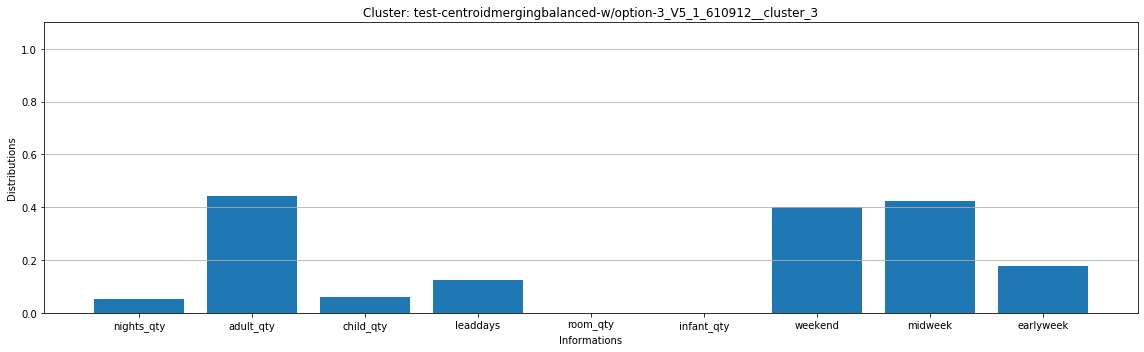

In [120]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_610912__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 2:  arrival_month in [1,5,7,8]

In [121]:
dataForPred_1578 = dataForPred[dataForPred['arrival_month'].isin([1,5,7,8])].copy(deep=True)
eps = 0.00000001
for c in numericalCols:
    dataForPred_1578[c] = (dataForPred_1578[c]-min(dataForPred_1578[c]))/\
                        (max(dataForPred_1578[c]) - min(dataForPred_1578[c])+eps)

dataForPred_DemographicData_Agg = dataForPred_1578.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-centroidmergingbalanced-w/option-3_v5_1_1...,0.046234,0.011800,0.446762,5.091109,0.000000,0.068224,0.0,1.000000,0.000000,0.0000
1,test-centroidmergingbalanced-w/option-3_v5_1_1...,0.047605,0.017261,0.398303,5.120829,0.000000,0.069546,0.0,0.000000,0.000000,1.0000
2,test-centroidmergingbalanced-w/option-3_v5_1_1...,0.046459,0.011675,0.398308,4.649408,0.000338,0.069426,0.0,0.000338,0.999662,0.0000
3,test-centroidmergingbalanced-w/option-3_v5_1_1...,0.085804,0.094340,0.458368,5.668581,0.000820,0.142586,0.0,0.332240,0.381460,0.2863


### Plotting

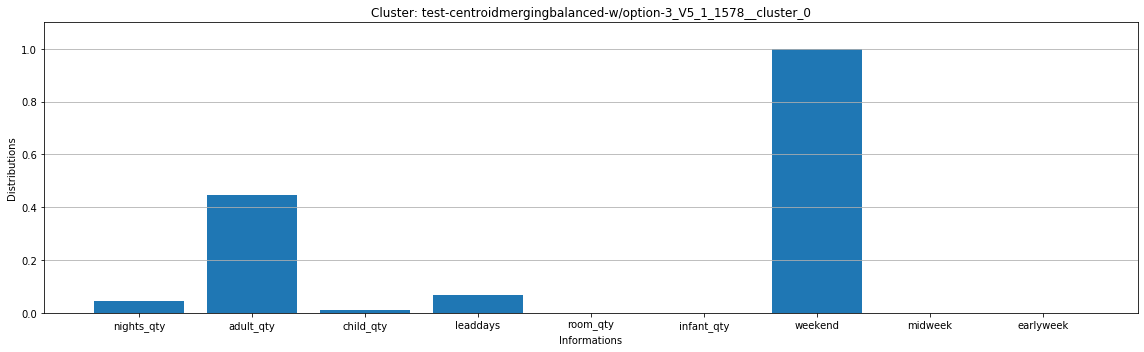

In [122]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_1578__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

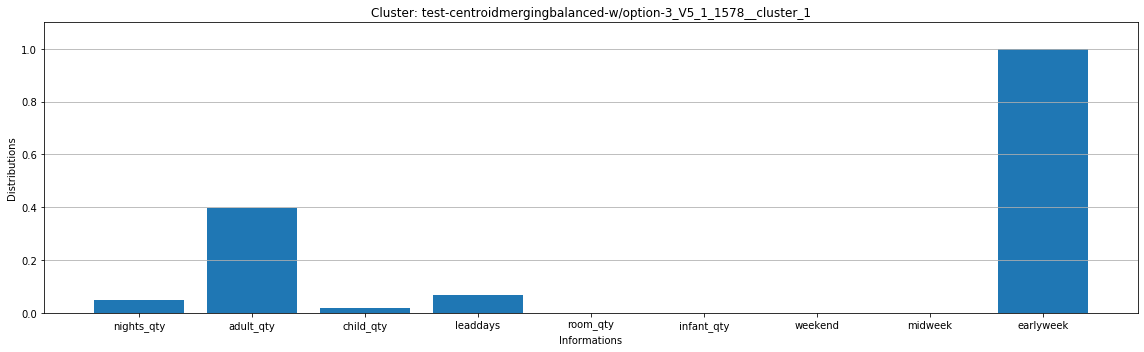

In [123]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_1578__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

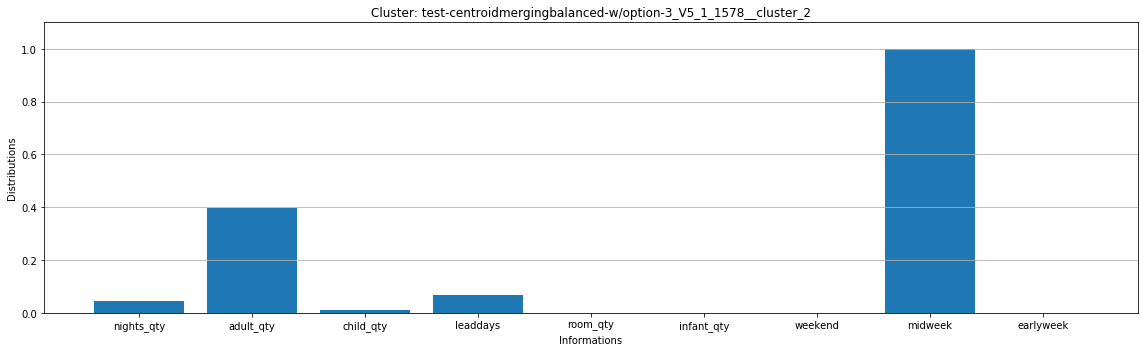

In [124]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_1578__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

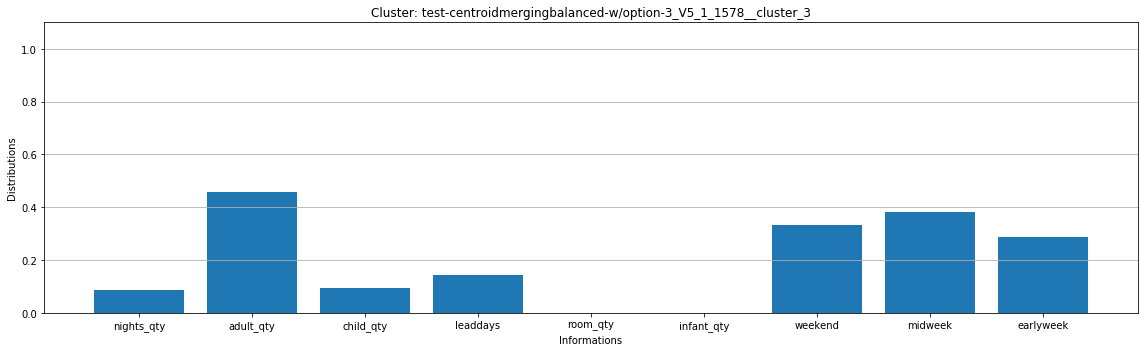

In [125]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_1578__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 3:  arrival_month in [4,3,2,11]

In [126]:
dataForPred_43211= dataForPred[dataForPred['arrival_month'].isin([4,3,2,11])].copy(deep=True)
eps = 0.00000001
for c in numericalCols:
    dataForPred_43211[c] = (dataForPred_43211[c]-min(dataForPred_43211[c]))/\
    (max(dataForPred_43211[c]) - min(dataForPred_43211[c])+eps)
    
dataForPred_DemographicData_Agg = dataForPred_43211.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-centroidmergingbalanced-w/option-3_v5_1_4...,0.057973,0.000000,0.502146,5.018240,0.0,0.070643,0.0,0.000000,1.000000,0.000000
1,test-centroidmergingbalanced-w/option-3_v5_1_4...,0.050350,0.007702,0.046519,5.690696,0.0,0.046648,0.0,0.000000,1.000000,0.000000
2,test-centroidmergingbalanced-w/option-3_v5_1_4...,0.052134,0.007636,0.336591,5.143555,0.0,0.052223,0.0,1.000000,0.000000,0.000000
3,test-centroidmergingbalanced-w/option-3_v5_1_4...,0.058575,0.009014,0.234375,4.917067,0.0,0.051521,0.0,0.000000,0.000000,1.000000
4,test-centroidmergingbalanced-w/option-3_v5_1_4...,0.121057,0.075710,0.390379,4.908517,0.0,0.136423,0.0,0.285489,0.411672,0.302839


### Plotting

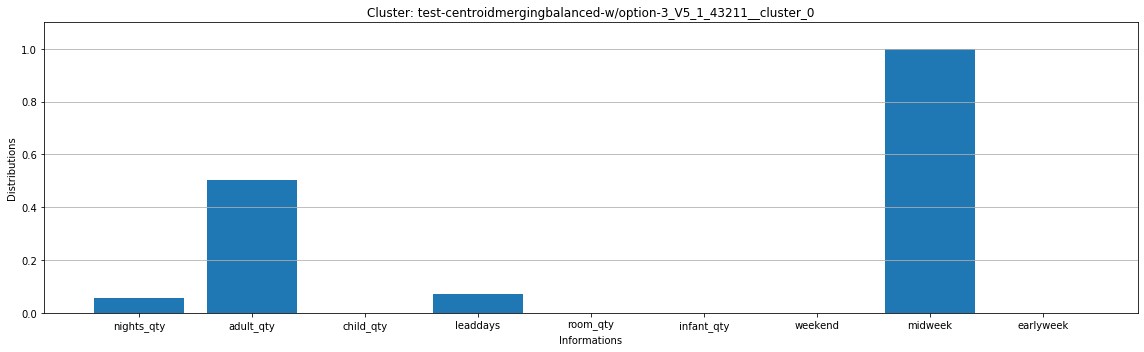

In [127]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_43211__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

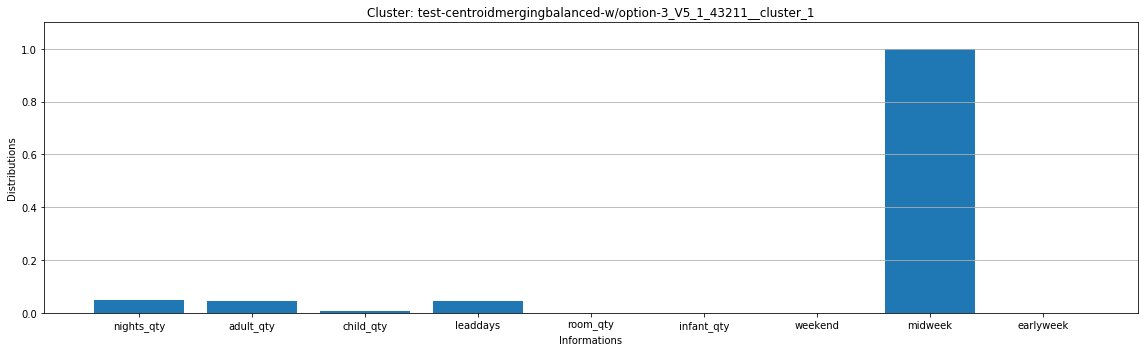

In [128]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_43211__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

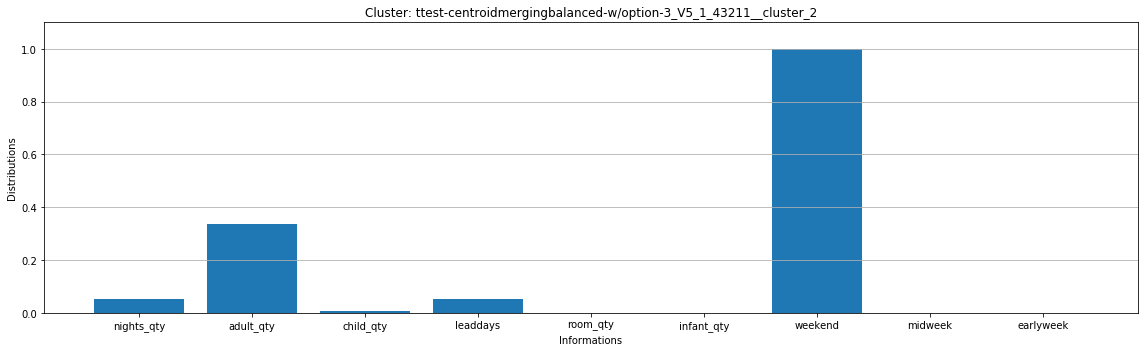

In [129]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: ttest-centroidmergingbalanced-w/option-3_V5_1_43211__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

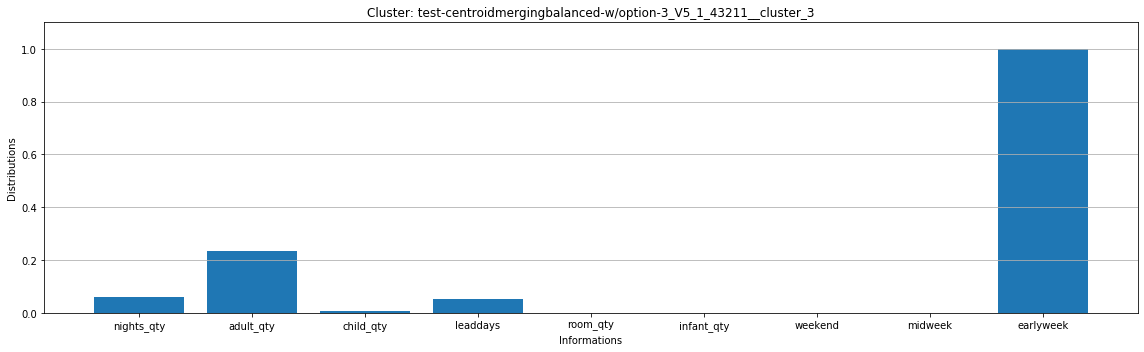

In [130]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_43211__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

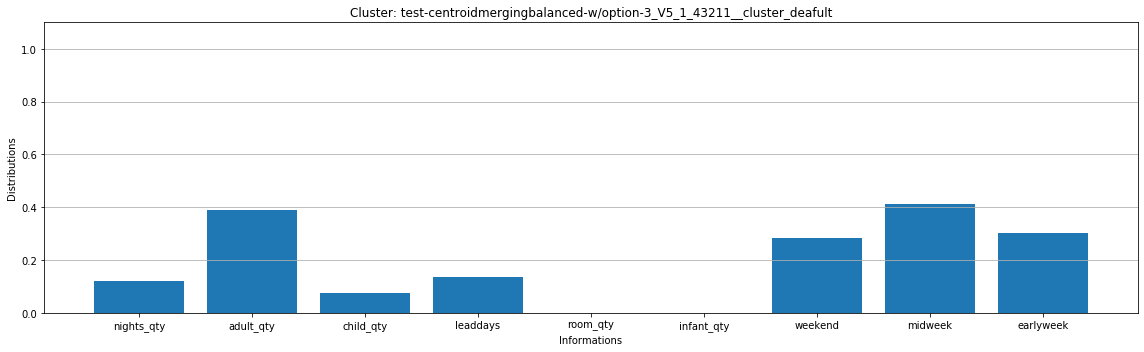

In [131]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-centroidmergingbalanced-w/option-3_V5_1_43211__cluster_deafult')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Test - 8

This one has **"discrete" seasonality implemented on **"arrival" month.**
1st the **"discrete" seasnality detection algorithm** kicks in. 
Based on how "arrival" months are groupped together, the core segmentation algorithm looks
at a subset of the data based a "season" or group of "arrival" months and then create
a tree same way as previous and conquer them by resuing the data we have used to divide the whole data into small groups by the average of the all the attributes of all the data points at each "Leaf".  
**We are NOT looking for balanced cluster here**. This process continues for each group months at a time,
them at last all the trees gets merged together. 

The "conquering" process is similar to **Test - 4**. That means we are not calculating centroid anymore here. 


In [132]:
histrocalDataFilePath = './RezSnapShot_2018_78111-3.csv'
dataForPred = pd.read_csv(histrocalDataFilePath, delimiter=';')
sourcePath = './Integration-Test-8-withOption3Discrete_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [133]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [134]:
dataForPred['Predicted_Cluster'] = preds

In [135]:
dataForPred['Predicted_Cluster'].value_counts()

test-w/option-3discrete_v5_1_1578__cluster_2            3022
test-w/option-3discrete_v5_1_610912__cluster_1          2760
test-w/option-3discrete_v5_1_610912__cluster_0          2035
test-w/option-3discrete_v5_1_610912__cluster_3          1968
test-w/option-3discrete_v5_1_1578__cluster_1            1869
test-w/option-3discrete_v5_1_43211__cluster_2           1707
test-w/option-3discrete_v5_1_1578__cluster_0            1698
test-w/option-3discrete_v5_1_43211__cluster_3           1679
test-w/option-3discrete_v5_1_43211__cluster_0           1389
test-w/option-3discrete_v5_1_43211__cluster_1           1179
test-w/option-3discrete_v5_1_1578__cluster_3            1145
test-w/option-3discrete_v5_1_610912__cluster_2           908
test-w/option-3discrete_v5_1_43211__cluster_default      536
test-w/option-3discrete_v5_1_610912__cluster_default     493
Name: Predicted_Cluster, dtype: int64

In [136]:
dataForPred.tail()

,ArrivalDate_Weekday,Arrival_Month,LeadDays,nights_qty,room_qty,adult_qty,child_qty,infant_qty,Predicted_Cluster
22383,MONDAY,10,0,4,1,2,0,0,test-w/option-3discrete_v5_1_610912__cluster_0
22384,THURSDAY,11,6,4,1,2,0,0,test-w/option-3discrete_v5_1_43211__cluster_1
22385,MONDAY,12,28,4,1,1,0,0,test-w/option-3discrete_v5_1_610912__cluster_0
22386,MONDAY,11,1,4,1,1,0,0,test-w/option-3discrete_v5_1_43211__cluster_3
22387,MONDAY,11,1,3,1,1,0,0,test-w/option-3discrete_v5_1_43211__cluster_3


In [137]:
dataForPred.head()

,ArrivalDate_Weekday,Arrival_Month,LeadDays,nights_qty,room_qty,adult_qty,child_qty,infant_qty,Predicted_Cluster
0,SUNDAY,2,104,2,1,1,0,0,test-w/option-3discrete_v5_1_43211__cluster_3
1,MONDAY,1,66,1,1,1,0,0,test-w/option-3discrete_v5_1_1578__cluster_0
2,MONDAY,1,42,1,1,1,0,0,test-w/option-3discrete_v5_1_1578__cluster_0
3,MONDAY,1,42,1,1,1,0,0,test-w/option-3discrete_v5_1_1578__cluster_0
4,MONDAY,1,39,1,1,1,0,0,test-w/option-3discrete_v5_1_1578__cluster_0


In [138]:
dataForPred.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'nights_qty',
       'room_qty', 'adult_qty', 'child_qty', 'infant_qty',
       'Predicted_Cluster'],
      dtype='object')

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are a "categorical" column here, **ArrivalDate_WeekDay**. We will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use the function we have used at the begining of creation of the model for data-preparation or feature engineering. 

In [139]:
columns = [i.lower() for i in list(dataForPred.columns)]
dataForPred['ArrivalDate_Weekday'] = dataForPred['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred.columns = columns
dataForPred, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred)

In [140]:
dataForPred.columns

Index(['nights_qty', 'predicted_cluster', 'child_qty', 'arrivaldate_weekday',
       'adult_qty', 'arrival_month', 'room_qty', 'leaddays', 'infant_qty',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek'],
      dtype='object')

### Refer to AthenaCustomerSegmentation_Driver_V5 >> Test 8
**2019-12-19 17:37:00,877 - 4574004672 - INFO - Cluster of months: {'Cluster-1': [6, 10, 9, 12], 'Cluster-2': [1, 5, 7, 8], 'Cluster-3': [4, 3, 2, 11]**

So we will plot one season at a time

In [141]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek'}
dataForPred.rename(columns=colRename, inplace=True)

In [142]:
numericalCols = ['nights_qty', 'adult_qty', 'child_qty', 'leaddays',
                'room_qty', 'infant_qty','weekend', 'midweek', 'earlyweek']

### Season 1:  arrival_month in [6, 10, 9, 12]

In [143]:
dataForPred_610912 = dataForPred[dataForPred['arrival_month'].isin([6,10,9,12])].copy(deep=True)
eps = 0.00000001
for c in numericalCols:
    dataForPred_610912[c] = (dataForPred_610912[c]-min(dataForPred_610912[c]))/\
                                (max(dataForPred_610912[c]) - min(dataForPred_610912[c])+eps)


dataForPred_DemographicData_Agg = dataForPred_610912.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-w/option-3discrete_v5_1_610912__cluster_0,0.028480,0.008518,0.380713,9.170025,0.000000,0.066441,0.0,0.000491,0.000491,0.999017
1,test-w/option-3discrete_v5_1_610912__cluster_1,0.023385,0.005797,0.372283,9.336232,0.000362,0.055169,0.0,0.000000,0.999275,0.000725
2,test-w/option-3discrete_v5_1_610912__cluster_2,0.046649,0.035242,0.462555,9.171806,0.000000,0.129117,0.0,0.491189,0.498899,0.009912
3,test-w/option-3discrete_v5_1_610912__cluster_3,0.027323,0.014228,0.422510,8.941565,0.000000,0.075775,0.0,0.994411,0.002033,0.003557
4,test-w/option-3discrete_v5_1_610912__cluster_d...,0.059287,0.062880,0.415821,9.438134,0.000000,0.123007,0.0,0.215010,0.312373,0.472617


### Plotting

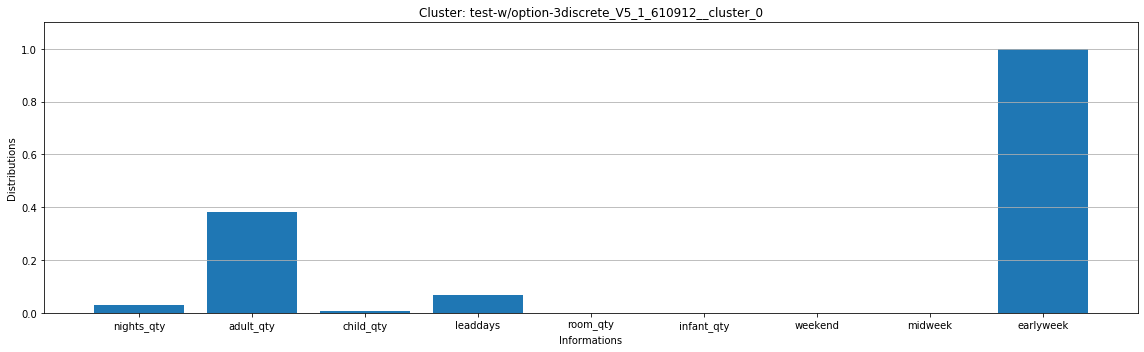

In [144]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_610912__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

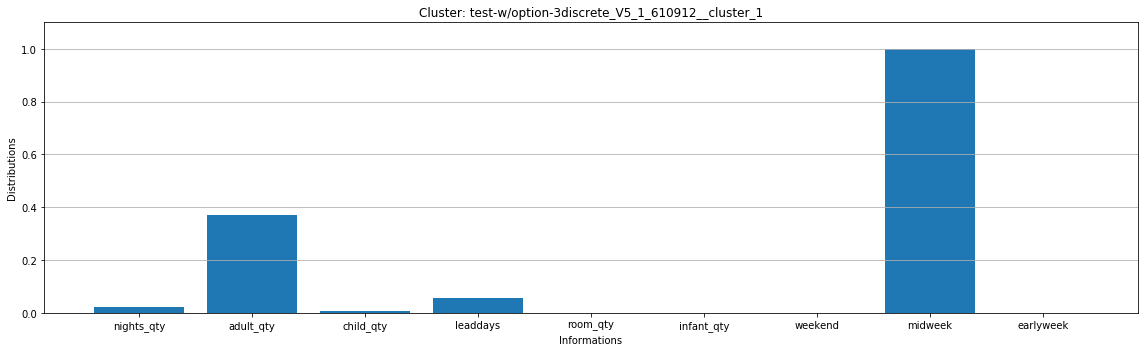

In [145]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_610912__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

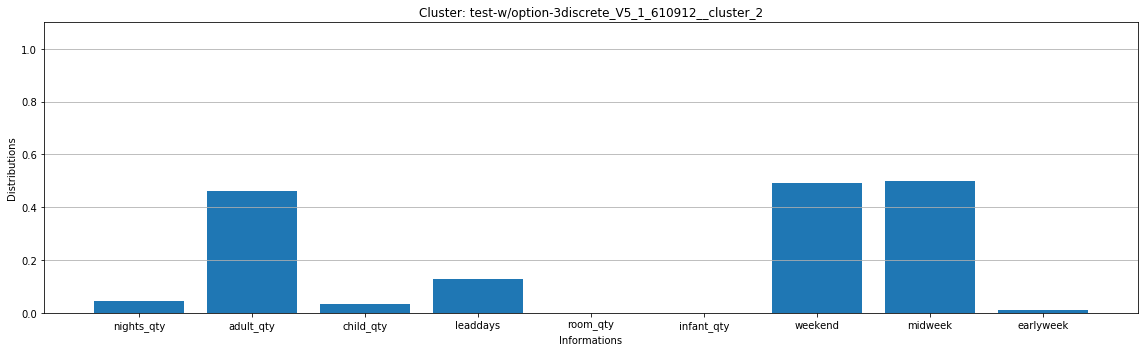

In [146]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_610912__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

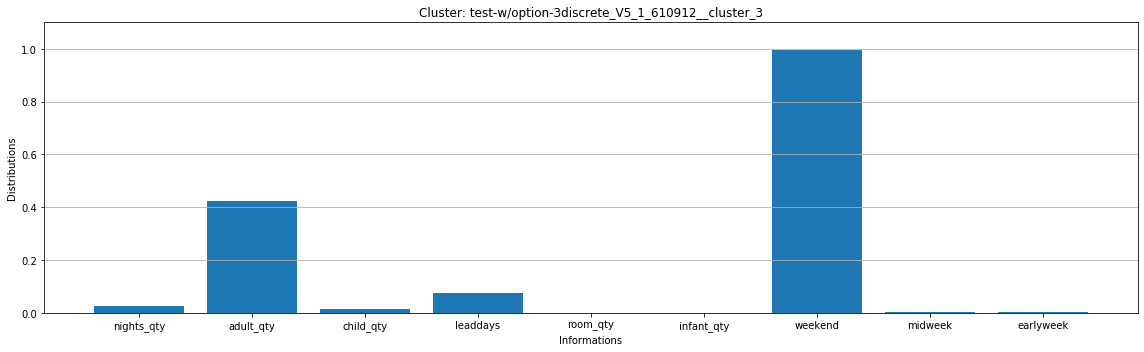

In [147]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_610912__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

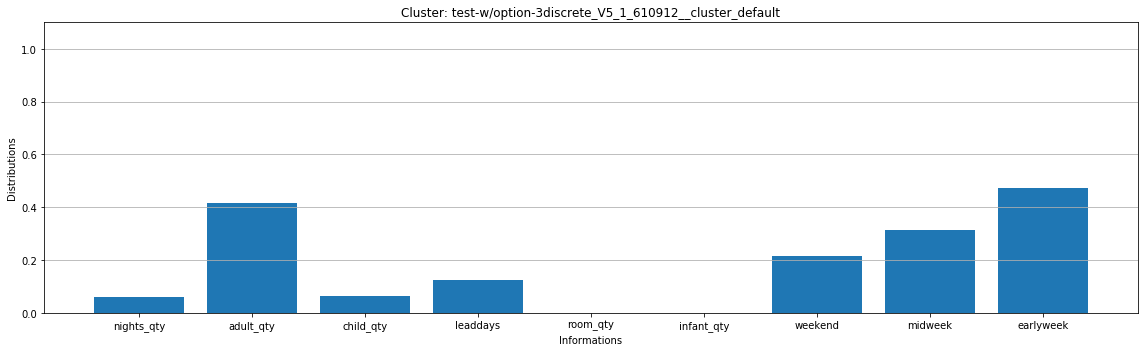

In [148]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_610912__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 2:  arrival_month in [1,5,7,8]

In [149]:
dataForPred_1578 = dataForPred[dataForPred['arrival_month'].isin([1,5,7,8])].copy(deep=True)
eps = 0.00000001
for c in numericalCols:
    dataForPred_1578[c] = (dataForPred_1578[c]-min(dataForPred_1578[c]))/\
                (max(dataForPred_1578[c]) - min(dataForPred_1578[c])+eps)

dataForPred_DemographicData_Agg = dataForPred_1578.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-w/option-3discrete_v5_1_1578__cluster_0,0.050255,0.000000,0.396054,5.095406,0.000000,0.069358,0.0,0.000000,0.001767,0.998233
1,test-w/option-3discrete_v5_1_1578__cluster_1,0.046562,0.022739,0.446228,5.109684,0.000000,0.070000,0.0,0.994114,0.003745,0.002140
2,test-w/option-3discrete_v5_1_1578__cluster_2,0.046666,0.026142,0.400232,4.683322,0.000331,0.069390,0.0,0.009265,0.990073,0.000662
3,test-w/option-3discrete_v5_1_1578__cluster_3,0.083385,0.069432,0.459389,5.650655,0.000873,0.144844,0.0,0.298690,0.364192,0.337118


### Plotting

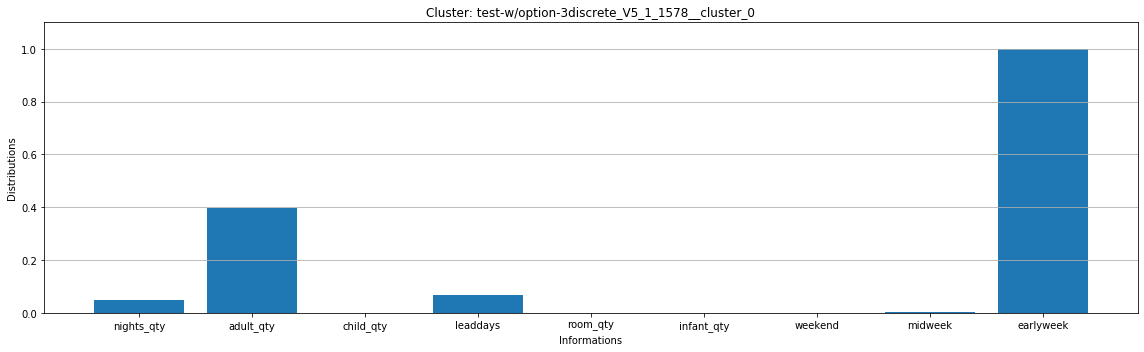

In [150]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_1578__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

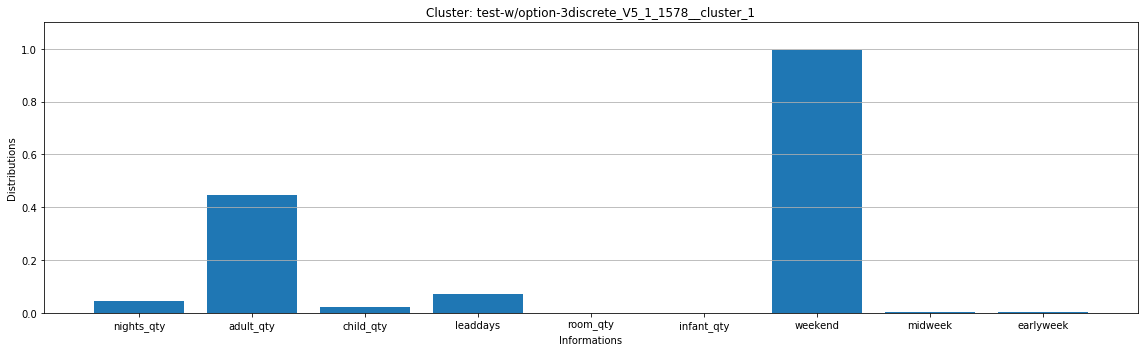

In [151]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_1578__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

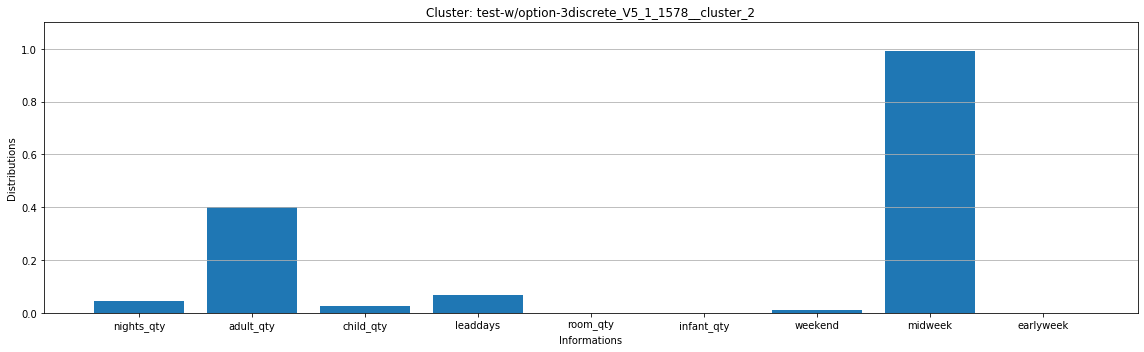

In [152]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_1578__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

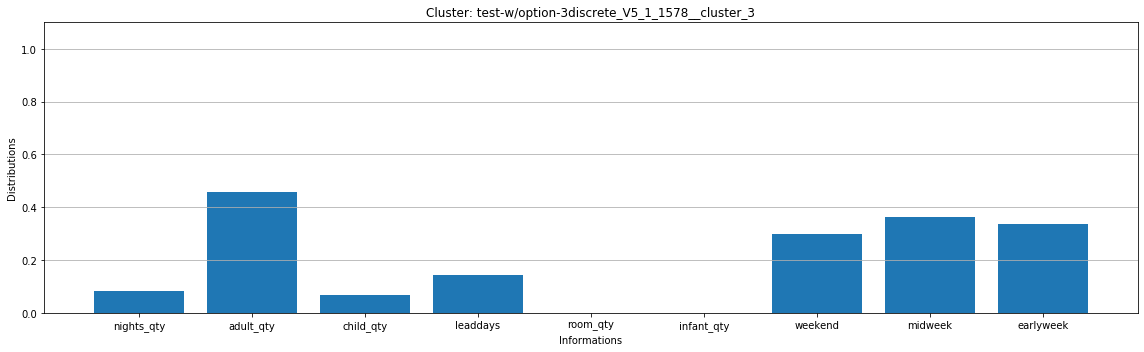

In [153]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_1578__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 3:  arrival_month in [4,3,2,11]

In [154]:
dataForPred_43211= dataForPred[dataForPred['arrival_month'].isin([4,3,2,11])].copy(deep=True)
eps = 0.00000001
for c in numericalCols:
    dataForPred_43211[c] = (dataForPred_43211[c]-min(dataForPred_43211[c]))/\
                (max(dataForPred_43211[c]) - min(dataForPred_43211[c])+eps)

dataForPred_DemographicData_Agg = dataForPred_43211.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,nights_qty,child_qty,adult_qty,arrival_month,room_qty,leaddays,infant_qty,weekend,midweek,earlyweek
0,test-w/option-3discrete_v5_1_43211__cluster_0,0.044231,0.000000,0.003960,5.650828,0.0,0.040254,0.0,0.000000,1.000000,0.000000
1,test-w/option-3discrete_v5_1_43211__cluster_1,0.063401,0.000000,0.480492,5.235793,0.0,0.072715,0.0,0.011026,0.988974,0.000000
2,test-w/option-3discrete_v5_1_43211__cluster_2,0.059461,0.008787,0.339484,5.129467,0.0,0.054532,0.0,0.987112,0.004687,0.008202
3,test-w/option-3discrete_v5_1_43211__cluster_3,0.058833,0.008934,0.239130,4.918999,0.0,0.053884,0.0,0.001787,0.000596,0.997618
4,test-w/option-3discrete_v5_1_43211__cluster_de...,0.109783,0.108209,0.333955,4.832090,0.0,0.138169,0.0,0.218284,0.470149,0.311567


### Plotting

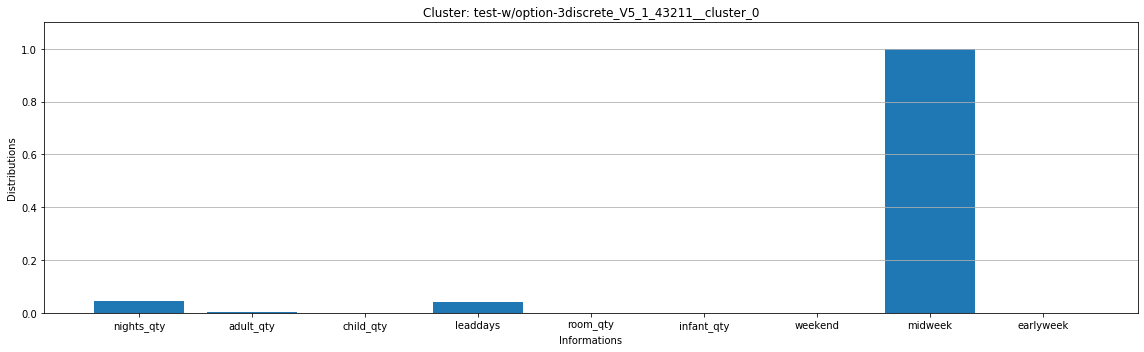

In [155]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_43211__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

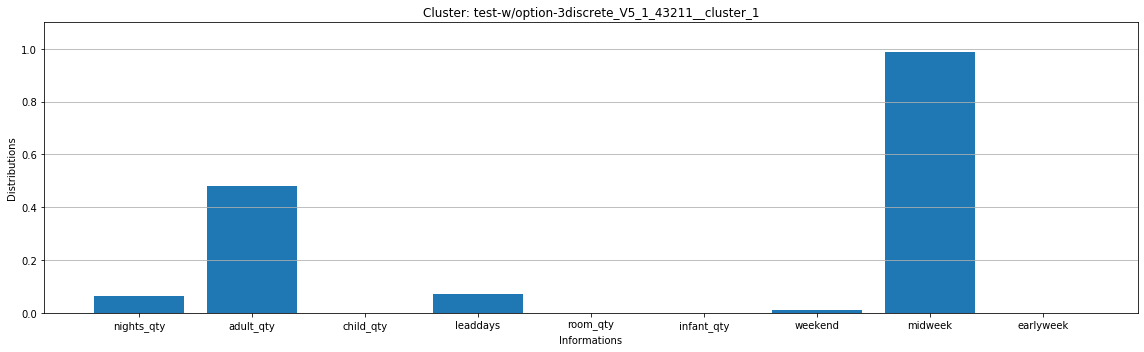

In [156]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_43211__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

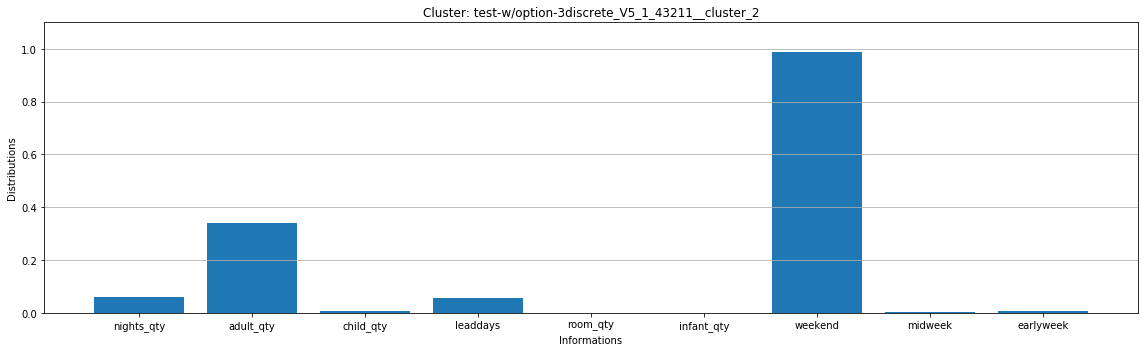

In [157]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_43211__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

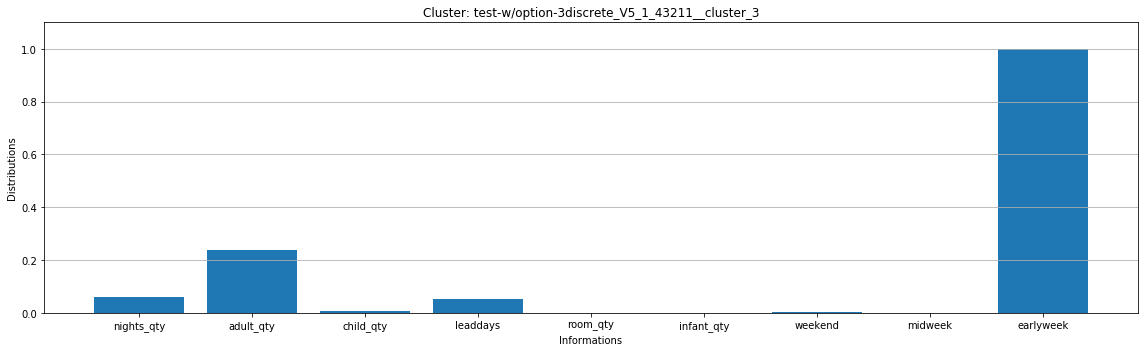

In [158]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_43211__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

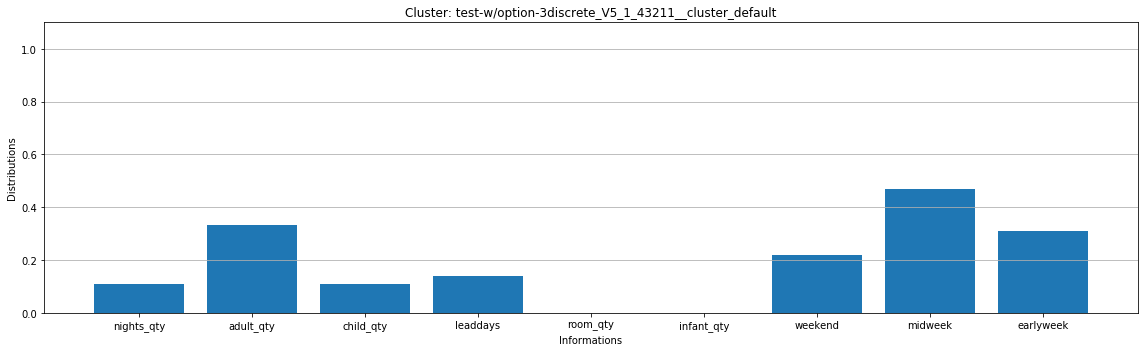

In [159]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3discrete_V5_1_43211__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Test - 9

No Seanality. 
**2 Additional categorical Variables**
categoricalAttributes = ['channel_id', 'lang_id']

Create an initial CLTtree same way as previous and conquer them by resuing the data we have used to divide the whole data into small groups by the taking average of the all the attributes of all the data points at each "Leaf". We are **NOT** looking for balanced cluster here. 

The "conquering" process is similar to Test 4. That means we are not calculating centroid anymore here.

In [160]:
histrocalDataFilePath = './RezSnapShot_2018_78111-1.csv'
dataForPred = pd.read_csv(histrocalDataFilePath, delimiter=';')
sourcePath = './Integration-Test-9-withOption2-conqueringNodes_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [161]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [162]:
dataForPred['Predicted_Cluster'] = preds

In [163]:
dataForPred['Predicted_Cluster'].value_counts()

test-w/option-2-conqueringnodes_v5_1__cluster_7          4947
test-w/option-2-conqueringnodes_v5_1__cluster_2          3755
test-w/option-2-conqueringnodes_v5_1__cluster_5          3741
test-w/option-2-conqueringnodes_v5_1__cluster_3          2976
test-w/option-2-conqueringnodes_v5_1__cluster_4          2352
test-w/option-2-conqueringnodes_v5_1__cluster_0          2117
test-w/option-2-conqueringnodes_v5_1__cluster_6           949
test-w/option-2-conqueringnodes_v5_1__cluster_1           923
test-w/option-2-conqueringnodes_v5_1__cluster_default     628
Name: Predicted_Cluster, dtype: int64

In [164]:
dataForPred.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are three "categorical" column here, in addition to **ArrivalDate_WeekDay**, we also have **'channel_id', 'lang_id'**. There is different type of mechanism to handle these 3 categorical variables. **channel_id' and 'lang_id'** has been handled differently than  **ArrivalDate_WeekDay**. Unlike **ArrivalDate_WeekDay** we will **'channel_id' and 'lang_id'** into one-hot encoded data columns. 

For **ArrivalDate_WeekDay** as usual we will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use two functions we have used at the begining of creation of the initial model for data-preparation or feature engineering.

In [165]:
columns = [i.lower() for i in list(dataForPred.columns)]
dataForPred['ArrivalDate_Weekday'] = dataForPred['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred.columns = columns
dataForPred, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred)

In [166]:
dataForPred.columns

Index(['channel_id', 'predicted_cluster', 'arrivaldate_weekday',
       'arrival_month', 'leaddays', 'lang_id', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

**categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001 Refer to AthenaCustomerSegmentation_Driver_V5  >> Test-9**

In [167]:
_, dataForPred = getOthersGoup(data=dataForPred, categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001)

In [168]:
dataForPred.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek', 'channel_id_6', 'channel_id_7',
       'channel_id_13', 'channel_id_1', 'channel_id_12', 'channel_id_others',
       'lang_id_1', 'lang_id_3'],
      dtype='object')

In [169]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek', 'channel_id_6':'ChId_6', 'channel_id_7':'ChId_7',
            'channel_id_13': 'ChId_13', 'channel_id_1': 'ChId_1', 'channel_id_12': 'ChId_12', 
            'channel_id_others': 'ChId_OTH', 'lang_id_1': 'lngId_1', 'lang_id_3': 'lngId_3'}
dataForPred.rename(columns=colRename, inplace=True)

In [170]:
dataForPred.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'weekend', 'midweek', 'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13',
       'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_3'],
      dtype='object')

In [171]:
numericalCols = ['leaddays', 'weekend', 'midweek', 'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13',
                   'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_3']

In [172]:
eps = 0.00000001
for c in numericalCols:
    dataForPred[c] = (dataForPred[c]-min(dataForPred[c]))/\
                (max(dataForPred[c]) - min(dataForPred[c])+eps)
dataForPred_DemographicData_Agg = dataForPred.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,arrival_month,leaddays,weekend,midweek,earlyweek,ChId_6,ChId_7,ChId_13,ChId_1,ChId_12,ChId_OTH,lngId_1,lngId_3
0,test-w/option-2-conqueringnodes_v5_1__cluster_0,6.119509,0.040861,0.997638,0.002362,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
1,test-w/option-2-conqueringnodes_v5_1__cluster_1,6.452871,0.050649,0.013001,0.981582,0.005417,0.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000
2,test-w/option-2-conqueringnodes_v5_1__cluster_2,6.838615,0.060585,0.998402,0.000533,0.001065,0.993609,0.006391,0.0,0.0,0.000000,0.000000,1.000000,0.000000
3,test-w/option-2-conqueringnodes_v5_1__cluster_3,7.014785,0.066633,0.000000,0.010417,0.989583,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
4,test-w/option-2-conqueringnodes_v5_1__cluster_4,5.990646,0.055846,0.007228,0.011054,0.981718,0.005952,0.984694,0.0,0.0,0.000000,0.009354,1.000000,0.000000
5,test-w/option-2-conqueringnodes_v5_1__cluster_5,5.995723,0.046736,0.016306,0.983694,0.000000,0.000267,0.999733,0.0,0.0,0.000000,0.000000,1.000000,0.000000
6,test-w/option-2-conqueringnodes_v5_1__cluster_6,6.744995,0.088293,0.180190,0.091675,0.728135,0.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000
7,test-w/option-2-conqueringnodes_v5_1__cluster_7,7.011320,0.093601,0.056600,0.927229,0.016171,0.956741,0.026885,0.0,0.0,0.016374,0.000000,1.000000,0.000000
8,test-w/option-2-conqueringnodes_v5_1__cluster_...,6.985669,0.098747,0.245223,0.447452,0.307325,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.961783,0.038217


### Plotting

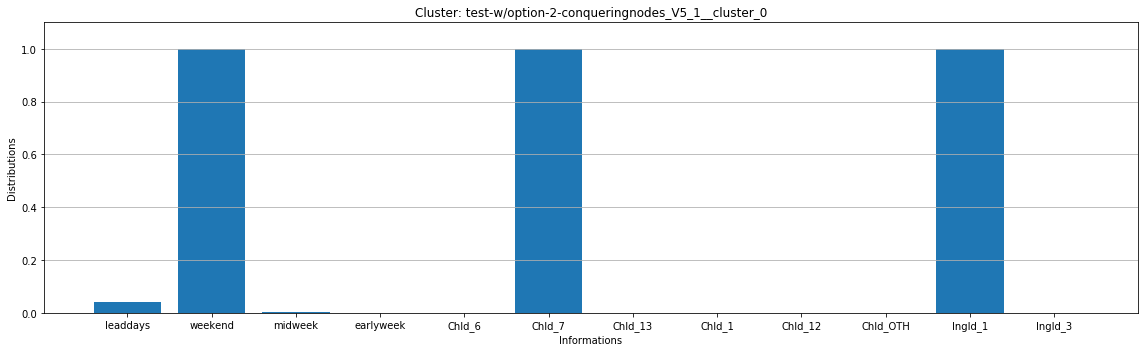

In [173]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

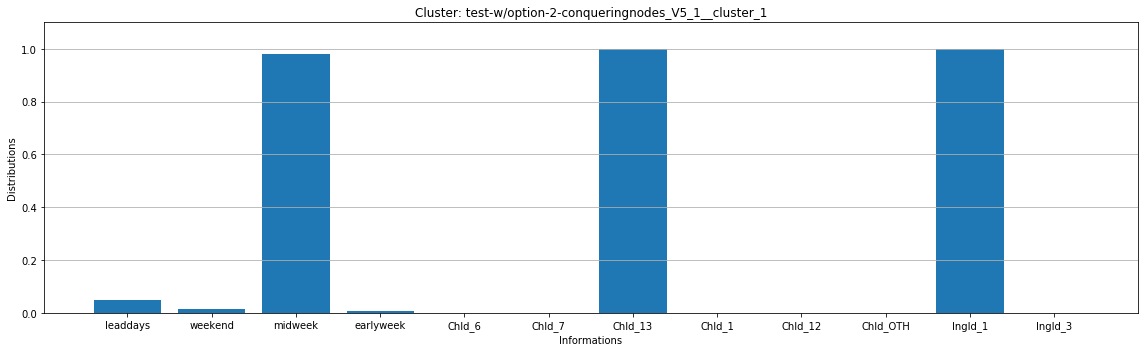

In [174]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

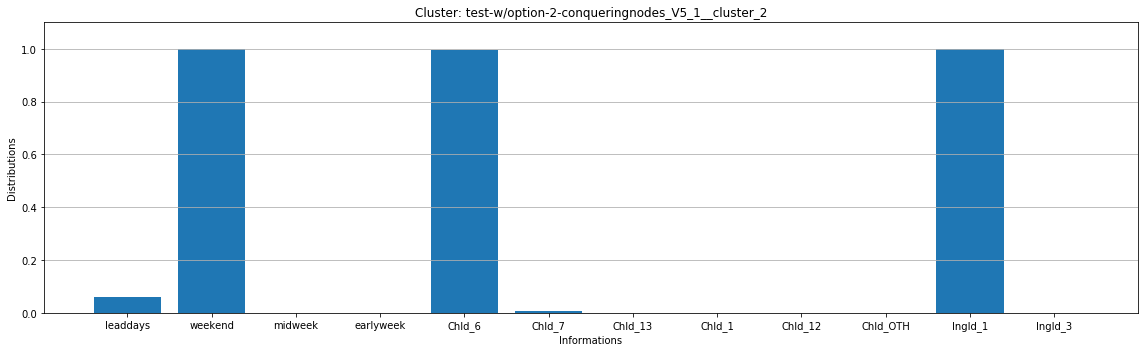

In [175]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

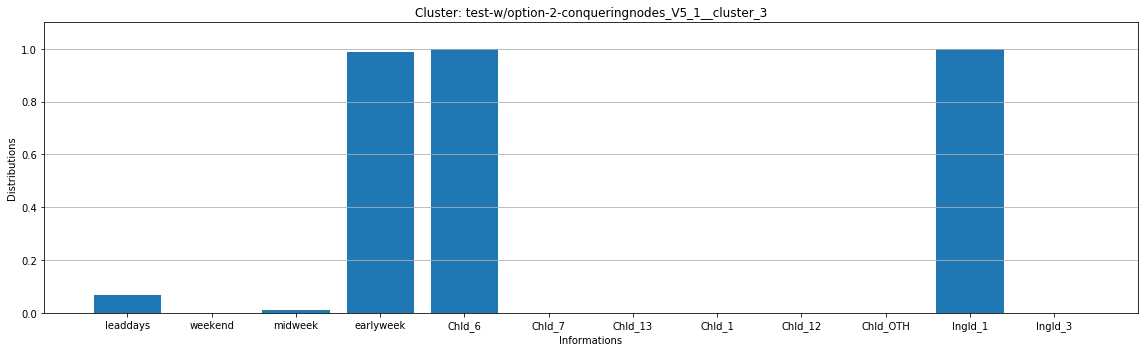

In [176]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

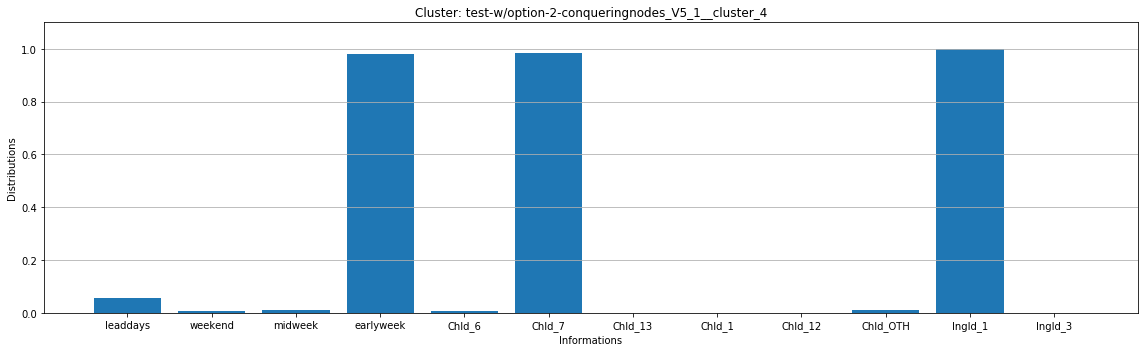

In [177]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_4')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

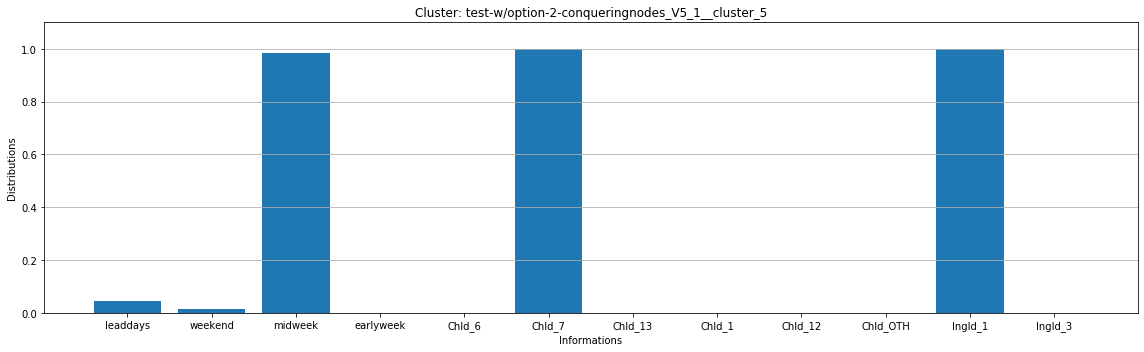

In [178]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[5][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_5')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

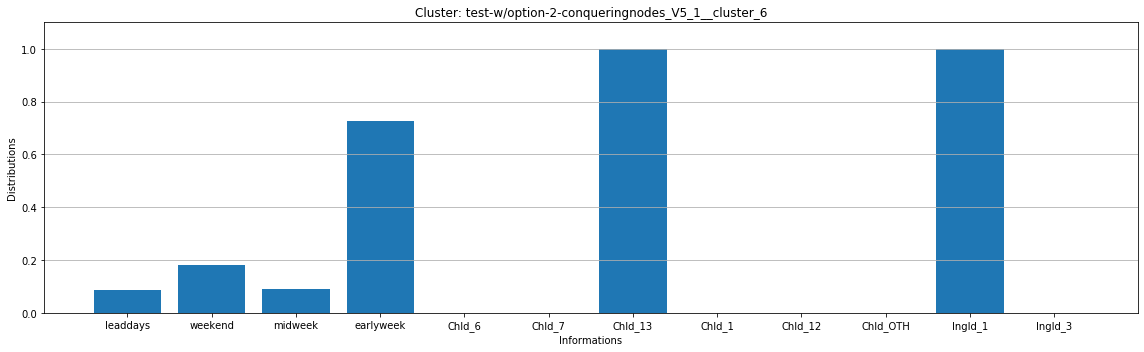

In [179]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[6][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_6')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

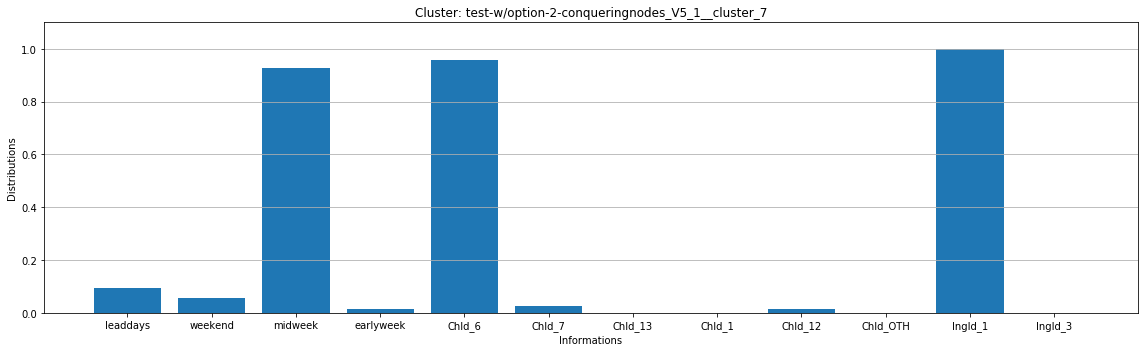

In [180]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[7][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_7')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

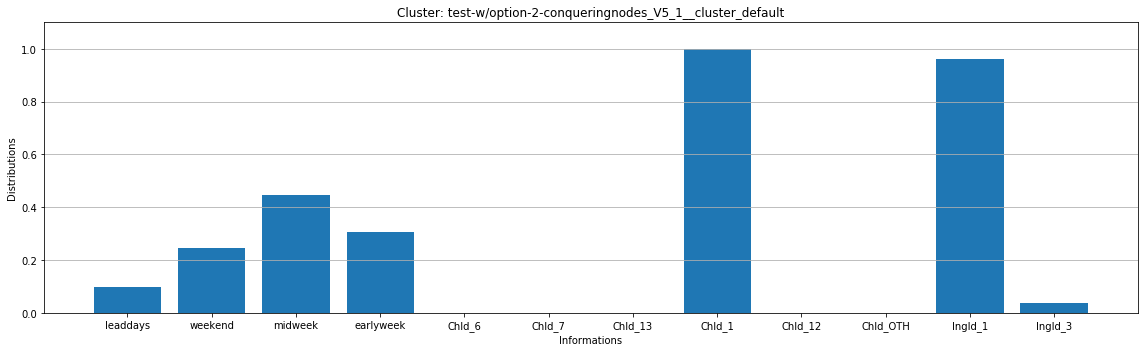

In [181]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[8][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-conqueringnodes_V5_1__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Test - 10

Same as Test-9 by data. But it has used different pruning mechanism.
No Seanality. 
**2 Additional categorical Variables**
categoricalAttributes = ['channel_id', 'lang_id']

Create an initial CLTtree same way as previous and conquer them by resuing the data we have used to divide the whole data into small groups by the calculating the "centroids" of all the hyper-rectangles created by all the leaves and bringing 2 leaves at a time based on similarity. **We are NOT looking for balanced clusters here**

**The "conquering" process is similar to Test 2.**

In [182]:
histrocalDataFilePath = './RezSnapShot_2018_78111-1.csv'
dataForPred = pd.read_csv(histrocalDataFilePath, delimiter=';')
sourcePath = './Integration-Test-10-withOption2-mergingCentroids_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [183]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)

In [184]:
dataForPred['Predicted_Cluster'] = preds

In [185]:
dataForPred['Predicted_Cluster'].value_counts()

test-w/option-2-mergingcentroids_v5_1__cluster_5          4569
test-w/option-2-mergingcentroids_v5_1__cluster_2          4209
test-w/option-2-mergingcentroids_v5_1__cluster_4          3880
test-w/option-2-mergingcentroids_v5_1__cluster_3          2904
test-w/option-2-mergingcentroids_v5_1__cluster_1          2234
test-w/option-2-mergingcentroids_v5_1__cluster_0          2092
test-w/option-2-mergingcentroids_v5_1__cluster_6          1872
test-w/option-2-mergingcentroids_v5_1__cluster_default     628
Name: Predicted_Cluster, dtype: int64

In [186]:
dataForPred.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are three "categorical" column here, in addition to **ArrivalDate_WeekDay**, we also have **'channel_id', 'lang_id'**. There is different type of mechanism to handle these 3 categorical variables. **channel_id' and 'lang_id'** has been handled differently than  **ArrivalDate_WeekDay**. Unlike **ArrivalDate_WeekDay** we will **'channel_id' and 'lang_id'** into one-hot encoded data columns. 

For **ArrivalDate_WeekDay** as usual we will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use two functions we have used at the begining of creation of the initial model for data-preparation or feature engineering.

In [187]:
columns = [i.lower() for i in list(dataForPred.columns)]
dataForPred['ArrivalDate_Weekday'] = dataForPred['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred.columns = columns
dataForPred, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred)

In [188]:
dataForPred.columns

Index(['channel_id', 'predicted_cluster', 'arrivaldate_weekday',
       'arrival_month', 'leaddays', 'lang_id', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

**categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001 Refer to AthenaCustomerSegmentation_Driver_V5  >> Test-10**

In [189]:
_, dataForPred = getOthersGoup(data=dataForPred, categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001)

In [190]:
dataForPred.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek', 'channel_id_6', 'channel_id_7',
       'channel_id_13', 'channel_id_1', 'channel_id_12', 'channel_id_others',
       'lang_id_1', 'lang_id_3'],
      dtype='object')

In [191]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek', 'channel_id_6':'ChId_6', 'channel_id_7':'ChId_7',
            'channel_id_13': 'ChId_13', 'channel_id_1': 'ChId_1', 'channel_id_12': 'ChId_12', 
            'channel_id_others': 'ChId_OTH', 'lang_id_1': 'lngId_1', 'lang_id_3': 'lngId_3'}
dataForPred.rename(columns=colRename, inplace=True)

In [192]:
dataForPred.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'weekend', 'midweek', 'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13',
       'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_3'],
      dtype='object')

In [193]:
numericalCols = ['leaddays', 'weekend', 'midweek', 'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13',
                   'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_3']

In [194]:
eps = 0.00000001
for c in numericalCols:
    dataForPred[c] = (dataForPred[c]-min(dataForPred[c]))/\
                (max(dataForPred[c]) - min(dataForPred[c])+eps)
    
dataForPred_DemographicData_Agg = dataForPred.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,arrival_month,leaddays,weekend,midweek,earlyweek,ChId_6,ChId_7,ChId_13,ChId_1,ChId_12,ChId_OTH,lngId_1,lngId_3
0,test-w/option-2-mergingcentroids_v5_1__cluster_0,6.109943,0.039416,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
1,test-w/option-2-mergingcentroids_v5_1__cluster_1,5.954342,0.043629,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
2,test-w/option-2-mergingcentroids_v5_1__cluster_2,7.030886,0.056912,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
3,test-w/option-2-mergingcentroids_v5_1__cluster_3,7.023072,0.063080,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
4,test-w/option-2-mergingcentroids_v5_1__cluster_4,6.015464,0.054300,0.020876,0.971649,0.007474,0.010825,0.989175,0.0,0.0,0.000000,0.000000,1.000000,0.000000
5,test-w/option-2-mergingcentroids_v5_1__cluster_5,6.851171,0.102473,0.885533,0.077041,0.037426,0.941125,0.036332,0.0,0.0,0.017728,0.004815,1.000000,0.000000
6,test-w/option-2-mergingcentroids_v5_1__cluster_6,6.600962,0.069732,0.097756,0.530449,0.371795,0.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000
7,test-w/option-2-mergingcentroids_v5_1__cluster...,6.985669,0.098747,0.245223,0.447452,0.307325,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.961783,0.038217


### Plotting

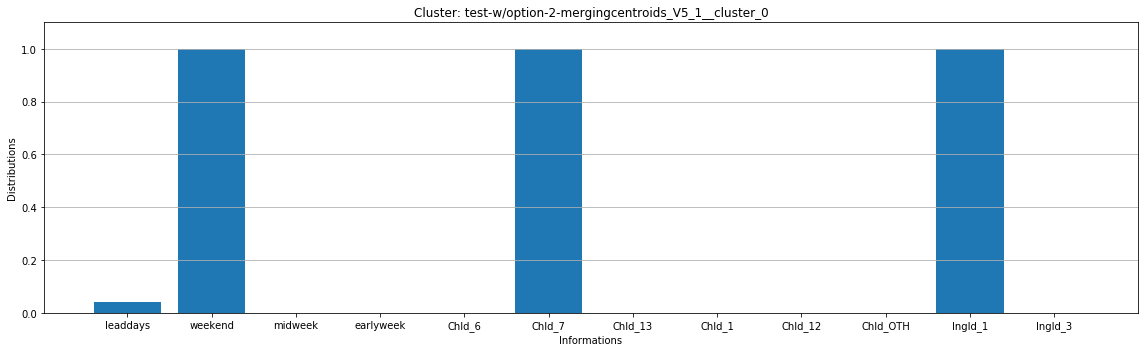

In [195]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-mergingcentroids_V5_1__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

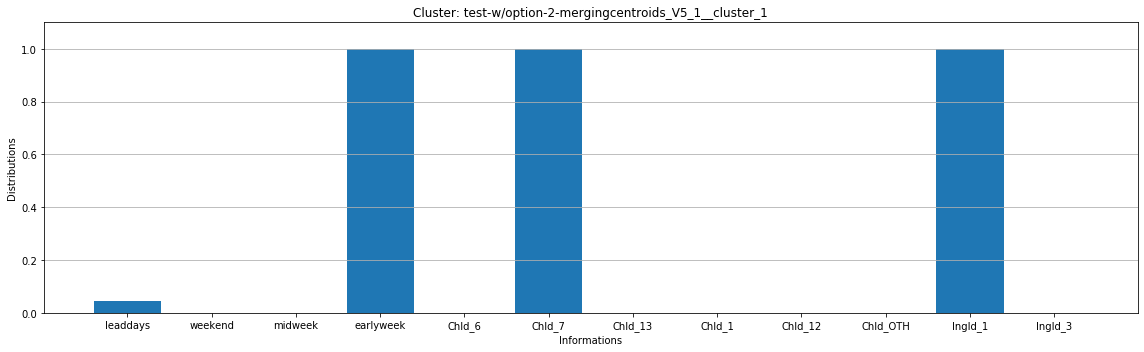

In [196]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-mergingcentroids_V5_1__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

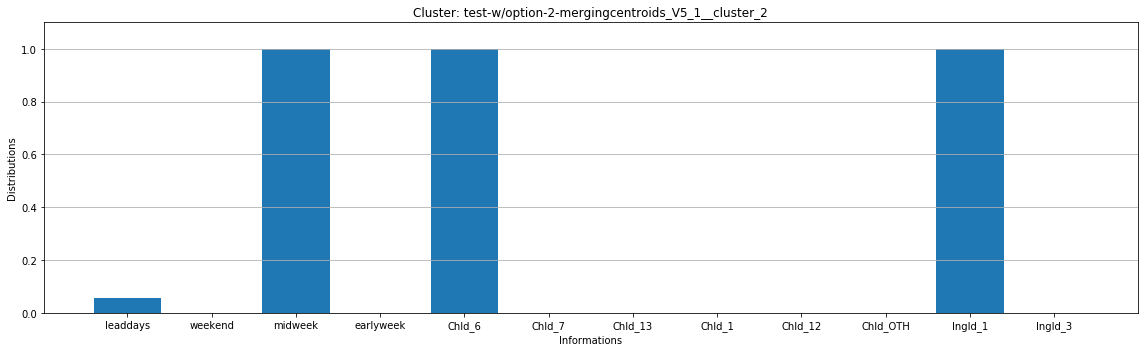

In [197]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-mergingcentroids_V5_1__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

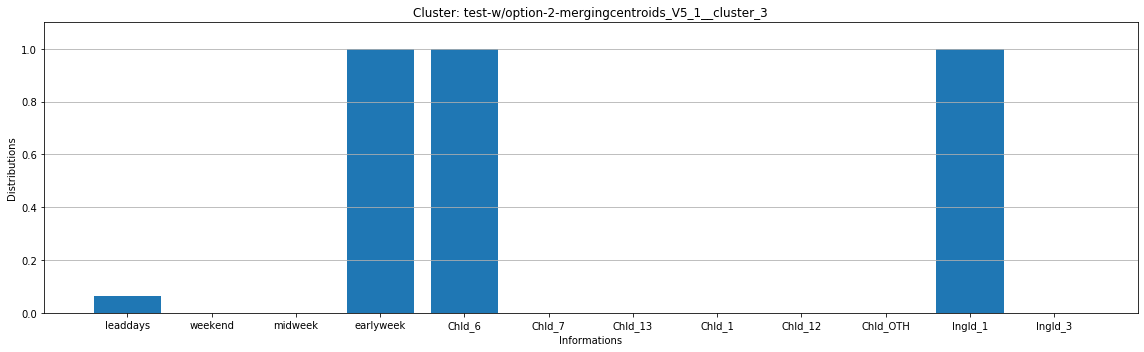

In [198]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-mergingcentroids_V5_1__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

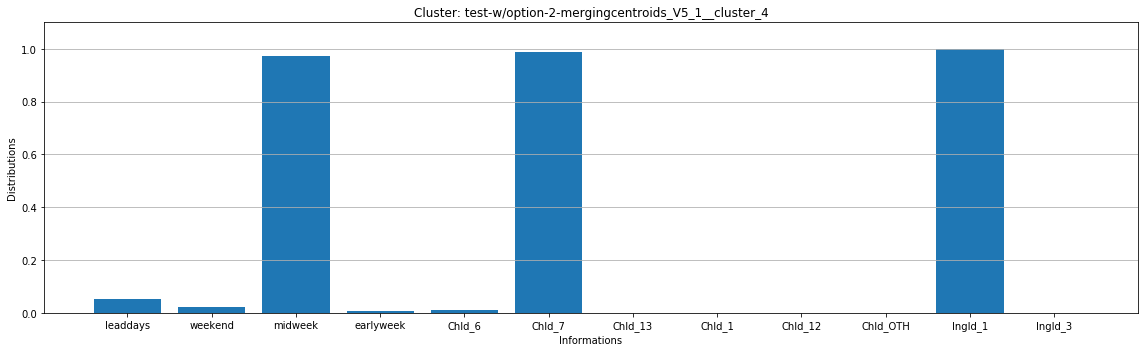

In [199]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-mergingcentroids_V5_1__cluster_4')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

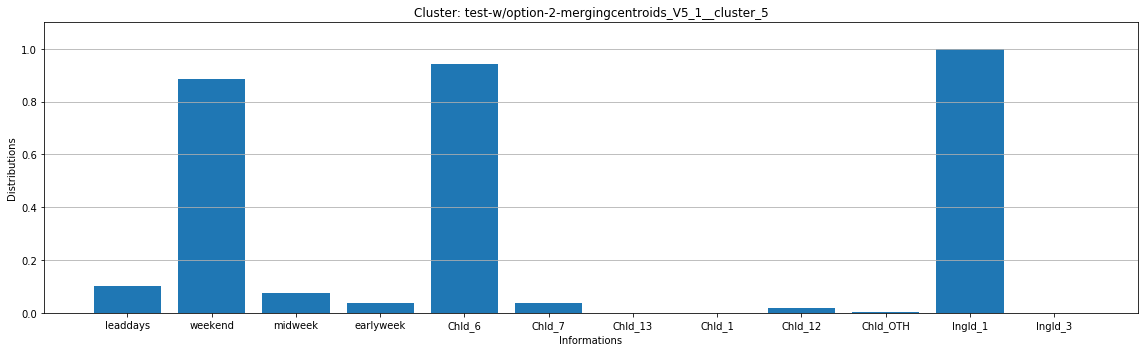

In [200]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[5][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-mergingcentroids_V5_1__cluster_5')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

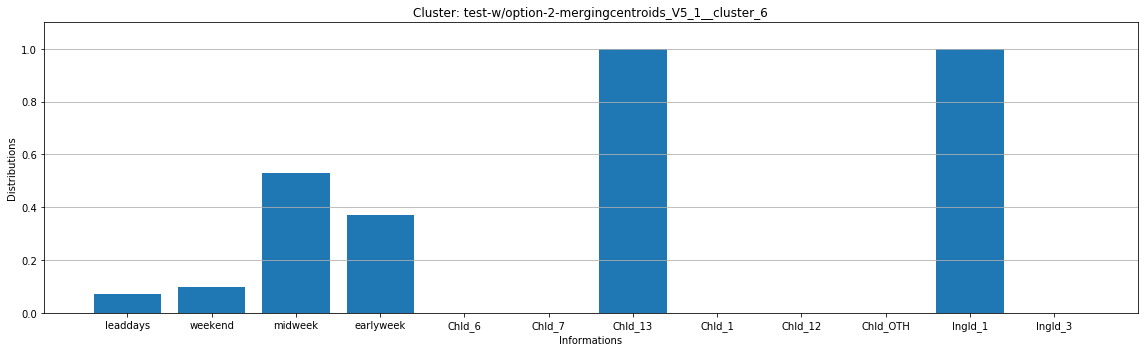

In [201]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[6][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-mergingcentroids_V5_1__cluster_6')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

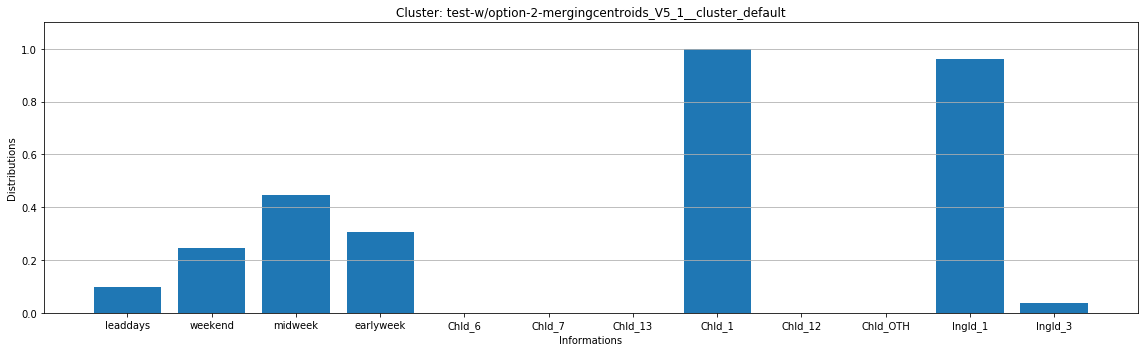

In [202]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[7][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-2-mergingcentroids_V5_1__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Test - 11

**Same as Test-10 by data. But it has "Continuous" seasonality by <u>arrival_month</u> on top of Test-10.**

First the Continuous Seasonality detection algorithm kicks in and groups together adjacent months based on booking trend [**Becasue there is no secondary data source provided to do the seasnality on it**]

The algorithm will look at each group of months and take a subset of data and  then will use the subset of the data to create an initial CLTtree same way as previous and conquer them by resuing the data we have used to divide the season-based subset of the whole data into small groups by the calculating the "centroids" of all the hyper-rectangles created by all the leaves and bringing 2 leaves at a time based on similarity. **We are NOT looking for balanced clusters here**
This process will continue for the detected seasons and at the end all individual trees gets merged together to form the the final tree. 

**The "conquering" process is similar to Test - 2.**

In [203]:
histrocalDataFilePath = './RezSnapShot_2018_78111-1.csv'
dataForPred = pd.read_csv(histrocalDataFilePath, delimiter=';')
sourcePath = './Integration-Test-11-withOption3C-mergingCentroids_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [204]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [205]:
dataForPred['Predicted_Cluster'] = preds

In [206]:
dataForPred['Predicted_Cluster'].value_counts()

test-w/option-3c-mergingcentroids_v5_1_12111098765__cluster_1          3377
test-w/option-3c-mergingcentroids_v5_1_12111098765__cluster_4          3026
test-w/option-3c-mergingcentroids_v5_1_12111098765__cluster_2          2165
test-w/option-3c-mergingcentroids_v5_1_12111098765__cluster_0          2030
test-w/option-3c-mergingcentroids_v5_1_12111098765__cluster_5          1743
test-w/option-3c-mergingcentroids_v5_1_43__cluster_1                   1612
test-w/option-3c-mergingcentroids_v5_1_12__cluster_1                   1430
test-w/option-3c-mergingcentroids_v5_1_12111098765__cluster_3          1388
test-w/option-3c-mergingcentroids_v5_1_12111098765__cluster_6          1329
test-w/option-3c-mergingcentroids_v5_1_12__cluster_2                   1184
test-w/option-3c-mergingcentroids_v5_1_43__cluster_0                    937
test-w/option-3c-mergingcentroids_v5_1_12__cluster_0                    924
test-w/option-3c-mergingcentroids_v5_1_43__cluster_default              795
test-w/optio

In [207]:
dataForPred.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

### Seasons:
**Refer to AthenaCustomerSegmentation_Driver_V5  >> Test - 11**


**2019-12-19 17:44:52,472 - 4574004672 - INFO - Cluster of months: {'Cluster-1': [12, 11, 10, 9, 8, 7, 5, 6], 'Cluster-2': [2, 1], 'Cluster-3': [4, 3]}**

We will deal with 1 season at a time and plot to see how well the algorithms has been able to detect different patterns from each seasons

### Season 1 =  [12, 11, 10, 9, 8, 7, 5, 6]

In [208]:
dataForPred_12111098756 = dataForPred[dataForPred['Arrival_Month'].isin([12, 11, 10, 9, 8, 7, 5, 6])].copy(deep=True)
dataForPred_12111098756.reset_index(inplace = True, drop=True)

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are three "categorical" column here, in addition to **ArrivalDate_WeekDay**, we also have **'channel_id', 'lang_id'**. There is different type of mechanism to handle these 3 categorical variables. **channel_id' and 'lang_id'** has been handled differently than  **ArrivalDate_WeekDay**. Unlike **ArrivalDate_WeekDay** we will **'channel_id' and 'lang_id'** into one-hot encoded data columns. 

For **ArrivalDate_WeekDay** as usual we will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use two functions we have used at the begining of creation of the initial model for data-preparation or feature engineering.

In [209]:
dataForPred_12111098756.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

In [210]:
columns = [i.lower() for i in list(dataForPred_12111098756.columns)]
dataForPred_12111098756['ArrivalDate_Weekday'] = dataForPred_12111098756['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred_12111098756.columns = columns
dataForPred_12111098756, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred_12111098756)

In [211]:
dataForPred_12111098756.columns

Index(['channel_id', 'predicted_cluster', 'arrivaldate_weekday',
       'arrival_month', 'leaddays', 'lang_id', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

**categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001 Refer to AthenaCustomerSegmentation_Driver_V5  >> Test-11**

In [212]:
_, dataForPred_12111098756 = getOthersGoup(data=dataForPred_12111098756,
                                           categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001)

In [213]:
dataForPred_12111098756.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek', 'channel_id_6', 'channel_id_7',
       'channel_id_13', 'channel_id_1', 'channel_id_12', 'channel_id_3',
       'lang_id_1', 'lang_id_3'],
      dtype='object')

In [214]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek', 'channel_id_6':'ChId_6', 'channel_id_7':'ChId_7',
            'channel_id_13': 'ChId_13', 'channel_id_1': 'ChId_1', 'channel_id_12': 'ChId_12', 
            'channel_id_3': 'ChId_3', 'lang_id_1': 'lngId_1', 'lang_id_3': 'lngId_3'}
dataForPred_12111098756.rename(columns=colRename, inplace=True)

In [215]:
dataForPred_12111098756.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'weekend', 'midweek', 'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13',
       'ChId_1', 'ChId_12', 'ChId_3', 'lngId_1', 'lngId_3'],
      dtype='object')

In [216]:
numericalCols = ['leaddays', 'weekend', 'midweek', 'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13',
                   'ChId_1', 'ChId_12', 'ChId_3', 'lngId_1', 'lngId_3']

In [217]:
eps = 0.00000001
for c in numericalCols:
    dataForPred_12111098756[c] = (dataForPred_12111098756[c]-min(dataForPred_12111098756[c]))/\
                (max(dataForPred_12111098756[c]) - min(dataForPred_12111098756[c])+eps)
    
dataForPred_DemographicData_Agg = dataForPred_12111098756.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,arrival_month,leaddays,weekend,midweek,earlyweek,ChId_6,ChId_7,ChId_13,ChId_1,ChId_12,ChId_3,lngId_1,lngId_3
0,test-w/option-3c-mergingcentroids_v5_1_1211109...,8.826601,0.042810,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
1,test-w/option-3c-mergingcentroids_v5_1_1211109...,8.353272,0.065957,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
2,test-w/option-3c-mergingcentroids_v5_1_1211109...,8.505774,0.068994,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
3,test-w/option-3c-mergingcentroids_v5_1_1211109...,8.438040,0.054942,0.000000,0.000000,1.000000,0.016571,0.983429,0.0,0.0,0.000000,0.000000,1.000000,0.000000
4,test-w/option-3c-mergingcentroids_v5_1_1211109...,8.241904,0.076035,0.964640,0.030403,0.004957,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
5,test-w/option-3c-mergingcentroids_v5_1_1211109...,8.434309,0.110057,0.854274,0.098680,0.047045,0.068273,0.893287,0.0,0.0,0.027539,0.010901,1.000000,0.000000
6,test-w/option-3c-mergingcentroids_v5_1_1211109...,8.288187,0.077428,0.112114,0.522950,0.364936,0.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000
7,test-w/option-3c-mergingcentroids_v5_1_1211109...,8.750000,0.104171,0.254464,0.435268,0.310268,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.953125,0.046875


### Plotting

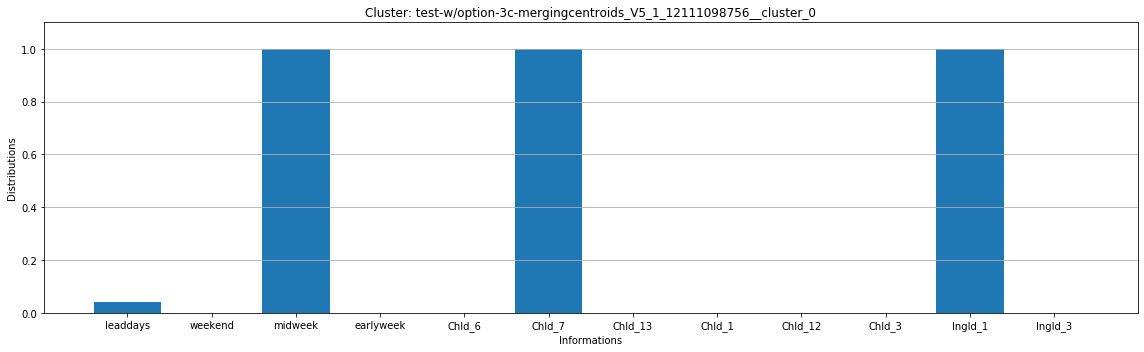

In [218]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_12111098756__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

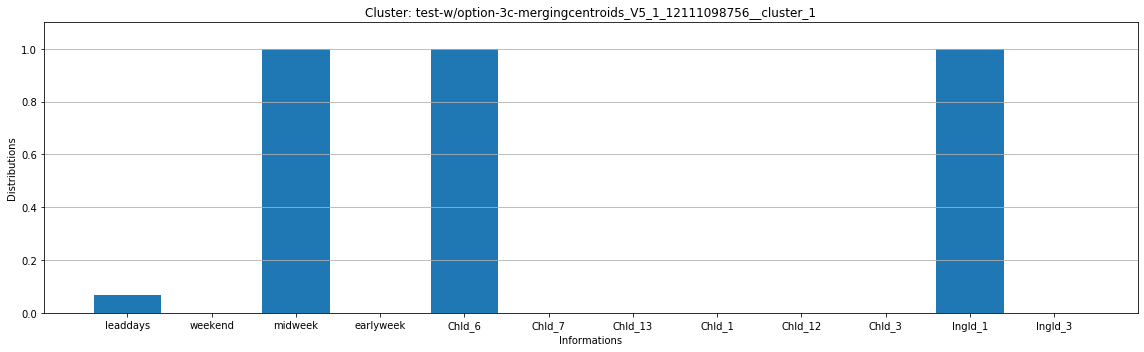

In [219]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_12111098756__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

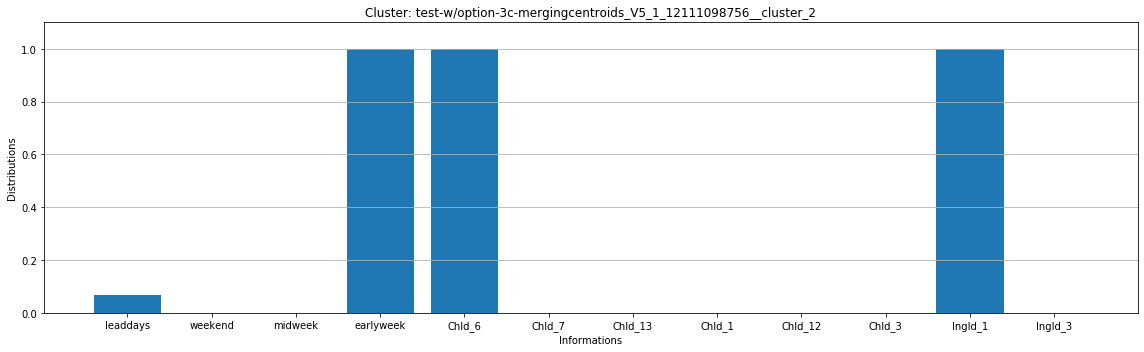

In [220]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_12111098756__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

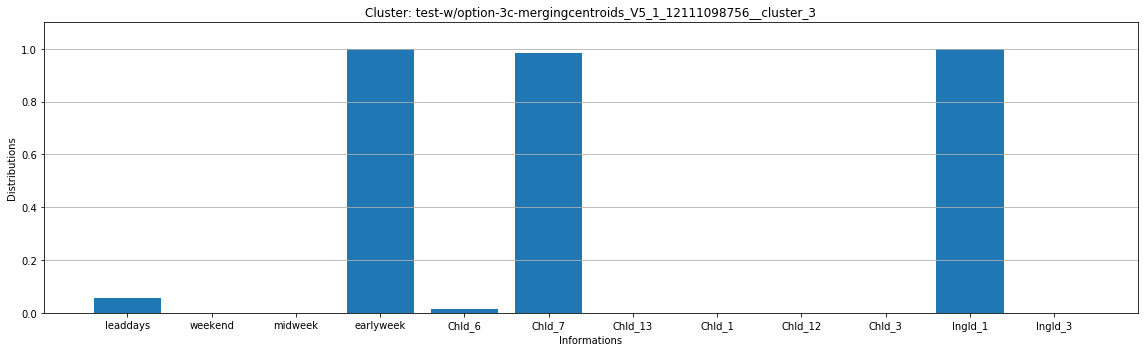

In [221]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_12111098756__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

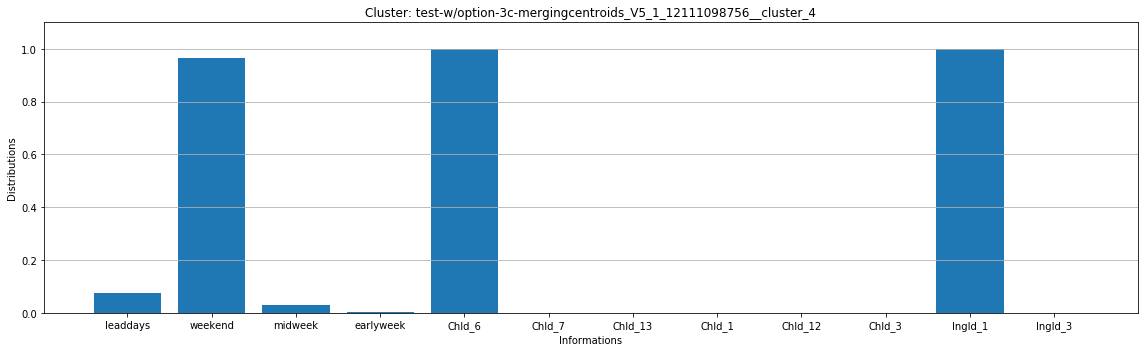

In [222]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_12111098756__cluster_4')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

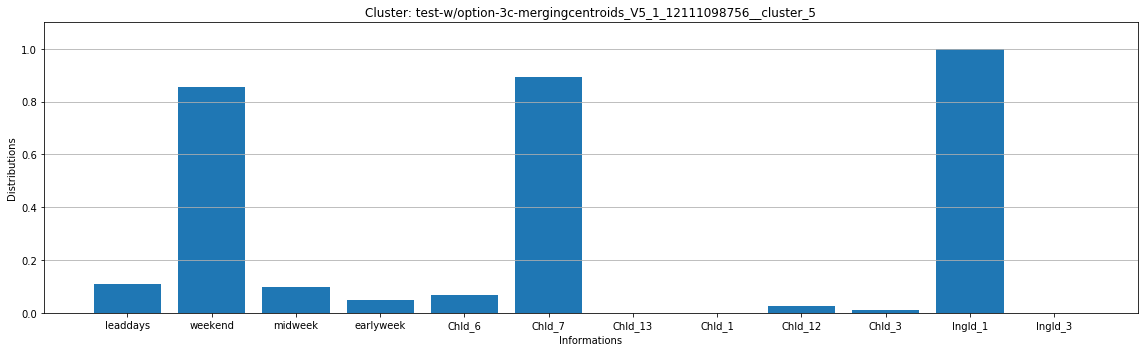

In [223]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[5][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_12111098756__cluster_5')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

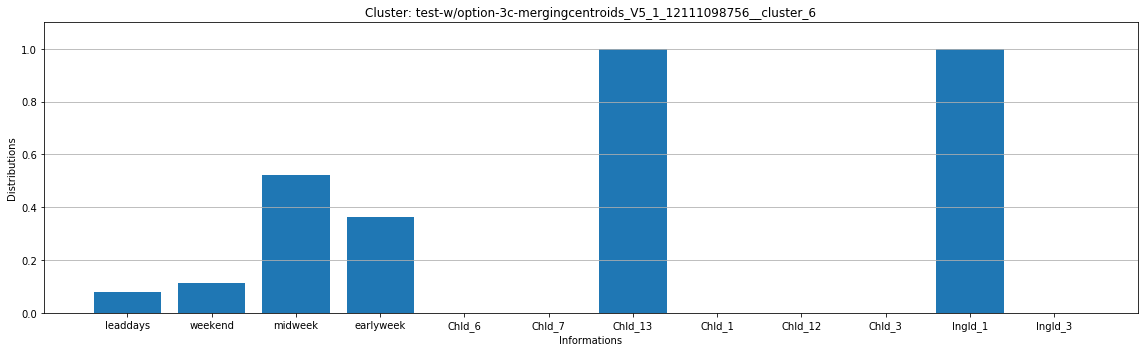

In [224]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[6][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_12111098756__cluster_6')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

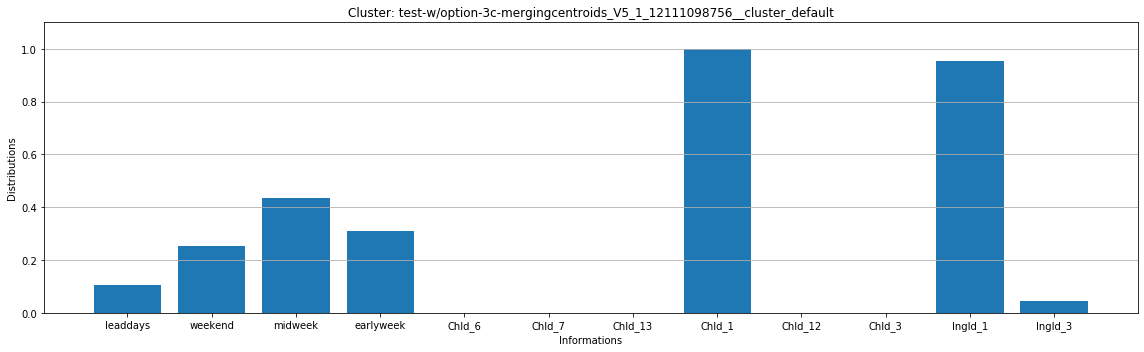

In [225]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[7][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_12111098756__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 2 =  [1, 2]

In [226]:
dataForPred_12 = dataForPred[dataForPred['Arrival_Month'].isin([1, 2])].copy(deep=True)
dataForPred_12.reset_index(inplace = True, drop=True)

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are three "categorical" column here, in addition to **ArrivalDate_WeekDay**, we also have **'channel_id', 'lang_id'**. There is different type of mechanism to handle these 3 categorical variables. **channel_id' and 'lang_id'** has been handled differently than  **ArrivalDate_WeekDay**. Unlike **ArrivalDate_WeekDay** we will **'channel_id' and 'lang_id'** into one-hot encoded data columns. 

For **ArrivalDate_WeekDay** as usual we will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use two functions we have used at the begining of creation of the initial model for data-preparation or feature engineering.

In [227]:
dataForPred_12.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

In [228]:
columns = [i.lower() for i in list(dataForPred_12.columns)]
dataForPred_12['ArrivalDate_Weekday'] = dataForPred_12['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred_12.columns = columns
dataForPred_12, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred_12)

In [229]:
dataForPred_12.columns

Index(['channel_id', 'predicted_cluster', 'arrivaldate_weekday',
       'arrival_month', 'leaddays', 'lang_id', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

**categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001 Refer to AthenaCustomerSegmentation_Driver_V5  >> Test - 11**

In [230]:
_, dataForPred_12 = getOthersGoup(data=dataForPred_12,
                                           categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001)

In [231]:
dataForPred_12.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek', 'channel_id_7', 'channel_id_6',
       'channel_id_13', 'channel_id_1', 'channel_id_12', 'channel_id_others',
       'lang_id_1', 'lang_id_others'],
      dtype='object')

In [232]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek', 'channel_id_6':'ChId_6', 'channel_id_7':'ChId_7',
            'channel_id_13': 'ChId_13', 'channel_id_1': 'ChId_1', 'channel_id_12': 'ChId_12', 
            'channel_id_others': 'ChId_OTH', 'lang_id_1': 'lngId_1', 'lang_id_others': 'lngId_OTH'}
dataForPred_12.rename(columns=colRename, inplace=True)

In [233]:
dataForPred_12.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'weekend', 'midweek', 'earlyweek', 'ChId_7', 'ChId_6', 'ChId_13',
       'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_OTH'],
      dtype='object')

In [234]:
numericalCols = ['leaddays',
       'weekend', 'midweek', 'earlyweek', 'ChId_7', 'ChId_6', 'ChId_13',
       'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_OTH']

In [235]:
eps = 0.00000001
for c in numericalCols:
    dataForPred_12[c] = (dataForPred_12[c]-min(dataForPred_12[c]))/\
                (max(dataForPred_12[c]) - min(dataForPred_12[c])+eps)

In [236]:
dataForPred_DemographicData_Agg = dataForPred_12.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,arrival_month,leaddays,weekend,midweek,earlyweek,ChId_7,ChId_6,ChId_13,ChId_1,ChId_12,ChId_OTH,lngId_1,lngId_OTH
0,test-w/option-3c-mergingcentroids_v5_1_12__clu...,1.406926,0.091187,0.975108,0.006494,0.018398,0.509740,0.441558,0.015152,0.010823,0.020563,0.002165,1.000000,0.000000
1,test-w/option-3c-mergingcentroids_v5_1_12__clu...,1.336364,0.100475,0.001399,0.998601,0.000000,0.661538,0.338462,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,test-w/option-3c-mergingcentroids_v5_1_12__clu...,1.464527,0.097493,0.006757,0.163007,0.830236,0.464527,0.271959,0.202703,0.060811,0.000000,0.000000,0.999155,0.000845


### Plotting

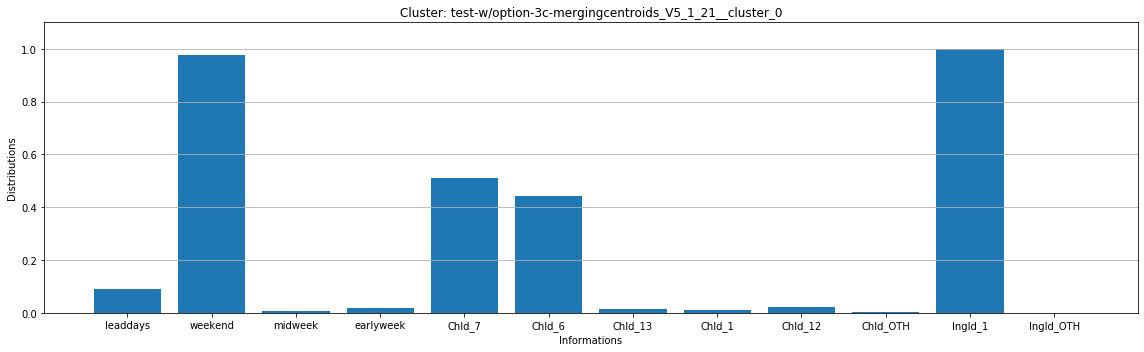

In [237]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_21__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

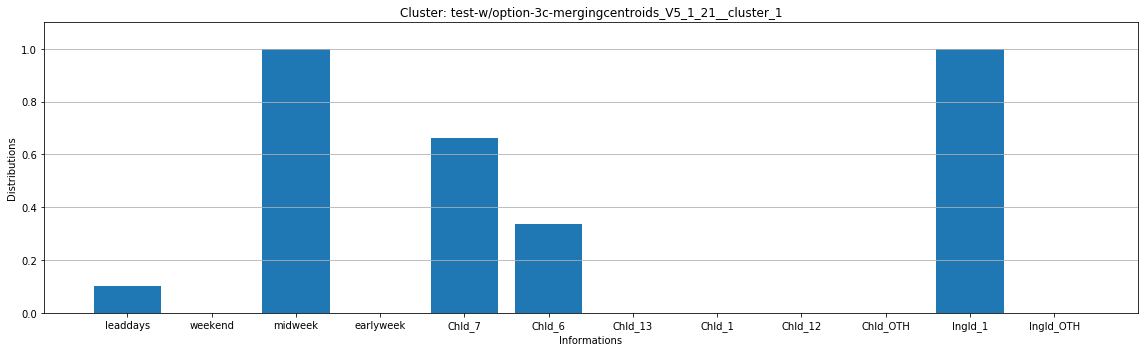

In [238]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_21__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

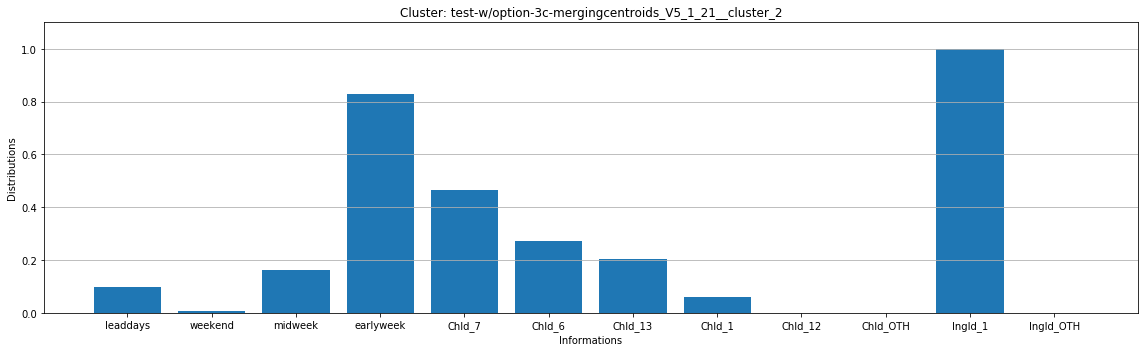

In [239]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_21__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 3 =  [4, 3]

In [240]:
dataForPred_43 = dataForPred[dataForPred['Arrival_Month'].isin([3, 4])].copy(deep=True)
dataForPred_43.reset_index(inplace = True, drop=True)

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are three "categorical" column here, in addition to **ArrivalDate_WeekDay**, we also have **'channel_id', 'lang_id'**. There is different type of mechanism to handle these 3 categorical variables. **channel_id' and 'lang_id'** has been handled differently than  **ArrivalDate_WeekDay**. Unlike **ArrivalDate_WeekDay** we will **'channel_id' and 'lang_id'** into one-hot encoded data columns. 

For **ArrivalDate_WeekDay** as usual we will transaform it into numerical values, in terms of **mid-week, week-end and early-week** and then look at the patterns of each cluster. 

Also, we will re-use two functions we have used at the begining of creation of the initial model for data-preparation or feature engineering.

In [241]:
dataForPred_43.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

In [242]:
columns = [i.lower() for i in list(dataForPred_43.columns)]
dataForPred_43['ArrivalDate_Weekday'] = dataForPred_43['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred_43.columns = columns
dataForPred_43, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred_43)

In [243]:
dataForPred_43.columns

Index(['channel_id', 'predicted_cluster', 'arrivaldate_weekday',
       'arrival_month', 'leaddays', 'lang_id', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

**categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001 Refer to AthenaCustomerSegmentation_Driver_V5  >> Test-11**

In [244]:
_, dataForPred_43 = getOthersGoup(data=dataForPred_43,
                                           categoricalAttributes=['channel_id', 'lang_id'], min_split=0.001)

In [245]:
dataForPred_43.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek', 'channel_id_6', 'channel_id_7',
       'channel_id_13', 'channel_id_1', 'channel_id_12', 'channel_id_others',
       'lang_id_1', 'lang_id_others'],
      dtype='object')

In [246]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek', 'channel_id_6':'ChId_6', 'channel_id_7':'ChId_7',
            'channel_id_13': 'ChId_13', 'channel_id_1': 'ChId_1', 'channel_id_12': 'ChId_12', 
            'channel_id_others': 'ChId_OTH', 'lang_id_1': 'lngId_1', 'lang_id_others': 'lngId_OTH'}
dataForPred_43.rename(columns=colRename, inplace=True)

In [247]:
dataForPred_43.columns

Index(['predicted_cluster', 'arrivaldate_weekday', 'arrival_month', 'leaddays',
       'weekend', 'midweek', 'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13',
       'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_OTH'],
      dtype='object')

In [248]:
numericalCols = ['leaddays',
       'weekend', 'midweek', 'earlyweek', 'ChId_7', 'ChId_6', 'ChId_13',
       'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_OTH']

In [249]:
eps = 0.00000001
for c in numericalCols:
    dataForPred_43[c] = (dataForPred_43[c]-min(dataForPred_43[c]))/\
                (max(dataForPred_43[c]) - min(dataForPred_43[c])+eps)
dataForPred_DemographicData_Agg = dataForPred_43.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,arrival_month,leaddays,weekend,midweek,earlyweek,ChId_6,ChId_7,ChId_13,ChId_1,ChId_12,ChId_OTH,lngId_1,lngId_OTH
0,test-w/option-3c-mergingcentroids_v5_1_43__clu...,3.443970,0.070207,1.000000,0.000000,0.000000,0.570971,0.383138,0.019210,0.026681,0.000000,0.00000,1.000000,0.000000
1,test-w/option-3c-mergingcentroids_v5_1_43__clu...,3.486973,0.076974,0.022953,0.879032,0.098015,0.339330,0.437965,0.168114,0.045285,0.008685,0.00062,0.998759,0.001241
2,test-w/option-3c-mergingcentroids_v5_1_43__clu...,3.567296,0.064029,0.000000,0.000000,1.000000,0.564780,0.435220,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000


### Plotting

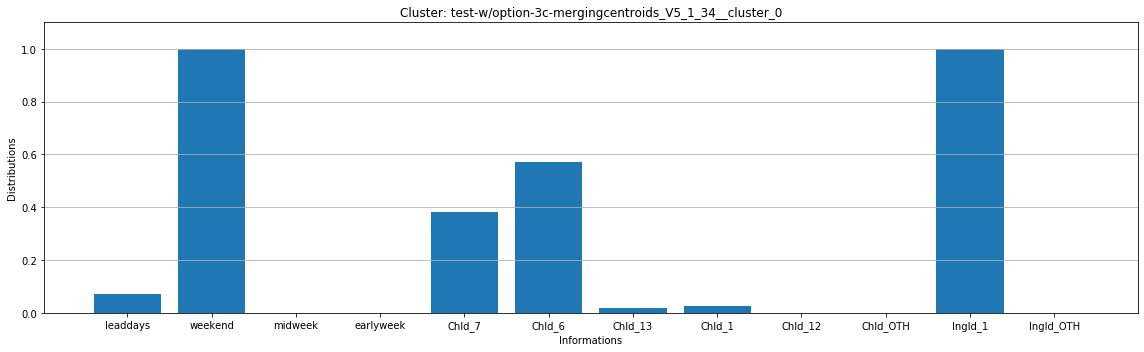

In [250]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_34__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

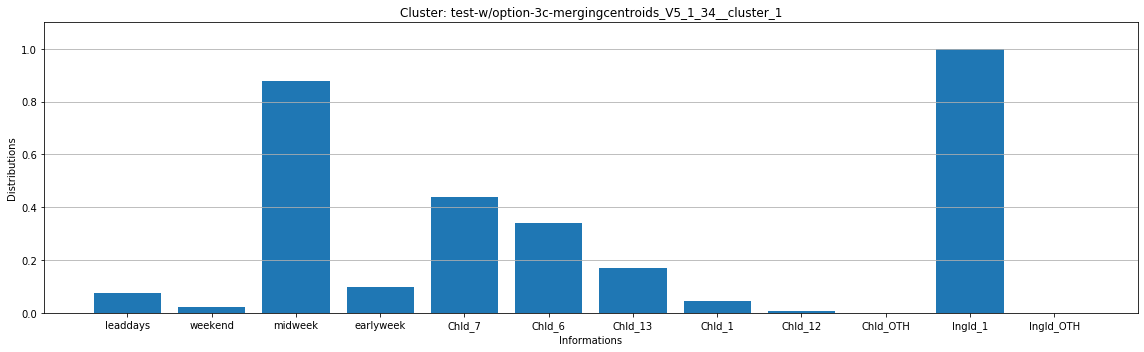

In [251]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_34__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

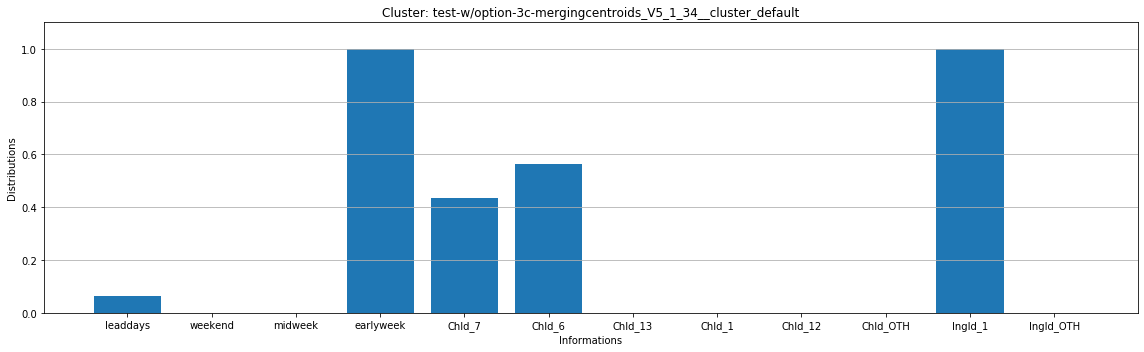

In [252]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3c-mergingcentroids_V5_1_34__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

## Test - 12

**Same as Test-10 by data. But it has <u><b>"Discrete"</b></u> seasonality by <u>arrival_month</u> on top of Test-10.**

And it has "ArrivalDate_Weekday" as explicit categorical variable as well. So far we were using "ArrivalDate_Weekday"only as "weekend", "midweek" and "earlyweek". Here in addition to those, we are also using individual weekdays as one-hot encoded value.

First the **Discrete Seasonality detection algorithm** kicks in and groups together adjacent months based on booking trend [**Becasue there is no secondary data source provided to do the seasnality on it**]

The algorithm will look at each group of months and take a subset of data and  then will use the subset of the data to create an initial CLTtree same way as previous and conquer them by resuing the data we have used to divide the season-based subset of the whole data into small groups by the calculating the "centroids" of all the hyper-rectangles created by all the leaves and bringing 2 leaves at a time based on similarity. **We are NOT looking for balanced clusters here**
This process will continue for the detected seasons and at the end all individual trees gets merged together to form the the final tree. 

**The "conquering" process is similar to Test 2.**

In [253]:
histrocalDataFilePath = './RezSnapShot_2018_78111-1.csv'
dataForPred = pd.read_csv(histrocalDataFilePath, delimiter=';')
sourcePath = './Integration-Test-12-withOption3D-mergingCentroids_V5_1.pickle'
clusterTree = readPicklefile(sourcePath)

In [254]:
inferenceCols = list(dataForPred.columns)
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info)
    preds.append(pred)


In [255]:
dataForPred['Predicted_Cluster'] = preds

In [256]:
dataForPred['Predicted_Cluster'].value_counts()

test-w/option-3d-mergingcentroids_v5_1_43211__cluster_1           2371
test-w/option-3d-mergingcentroids_v5_1_710812__cluster_2          2035
test-w/option-3d-mergingcentroids_v5_1_710812__cluster_3          1958
test-w/option-3d-mergingcentroids_v5_1_43211__cluster_0           1937
test-w/option-3d-mergingcentroids_v5_1_5619__cluster_5            1711
test-w/option-3d-mergingcentroids_v5_1_43211__cluster_2           1567
test-w/option-3d-mergingcentroids_v5_1_5619__cluster_3            1548
test-w/option-3d-mergingcentroids_v5_1_710812__cluster_1          1459
test-w/option-3d-mergingcentroids_v5_1_5619__cluster_4            1253
test-w/option-3d-mergingcentroids_v5_1_710812__cluster_0          1142
test-w/option-3d-mergingcentroids_v5_1_5619__cluster_1            1099
test-w/option-3d-mergingcentroids_v5_1_5619__cluster_2            1002
test-w/option-3d-mergingcentroids_v5_1_5619__cluster_0             966
test-w/option-3d-mergingcentroids_v5_1_710812__cluster_default     894
test-w

In [257]:
dataForPred.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

### Seasons:
**Refer to AthenaCustomerSegmentation_Driver_V5  >> Test - 12**


**2019-12-19 17:46:29,071 - 4574004672 - INFO - Cluster of months: {'Cluster-1': [7, 10, 8, 12], 'Cluster-2': [5, 6, 1, 9], 'Cluster-3': [4, 3, 2, 11]}**

We will deal with 1 season at a time and plot to see how well the algorithms has been able to detect different patterns from each seasons

### Season 1 =  [7, 10, 8, 12]

In [258]:
dataForPred_781012 = dataForPred[dataForPred['Arrival_Month'].isin([7, 10, 8, 12])].copy(deep=True)
dataForPred_781012.reset_index(inplace = True, drop=True)

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are three "categorical" column here, **'channel_id', 'lang_id', ArrivalDate_WeekDay**. There is different type of mechanism to handle these 3 categorical variables. **channel_id' and 'lang_id'** has been handled differently than  **ArrivalDate_WeekDay**. We will translate **'ArrivalDate_WeekDay', 'channel_id' and 'lang_id'** into one-hot encoded data columns <u>in addition to calculationg midweek, earlyweek and weekend</u> on **'ArrivalDate_WeekDay'**.


Also, we will re-use two functions we have used at the begining of creation of the initial model for data-preparation or feature engineering.

In [259]:
dataForPred_781012.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

In [260]:
columns = [i.lower() for i in list(dataForPred_781012.columns)]
dataForPred_781012['ArrivalDate_Weekday'] = dataForPred_781012['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred_781012.columns = columns
dataForPred_781012, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred_781012)

In [261]:
dataForPred_781012.columns

Index(['channel_id', 'predicted_cluster', 'arrivaldate_weekday',
       'arrival_month', 'leaddays', 'lang_id', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

**categoricalAttributes=['channel_id', 'lang_id', 'ArrivalDate_Weekday'], min_split=0.001 Refer to AthenaCustomerSegmentation_Driver_V5  >> Test-12**

In [262]:
_, dataForPred_781012 = getOthersGoup(data=dataForPred_781012,
                                           categoricalAttributes=['channel_id', 'lang_id', 'arrivaldate_weekday'], min_split=0.001)

In [263]:
dataForPred_781012.columns

Index(['predicted_cluster', 'arrival_month', 'leaddays',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek', 'channel_id_6', 'channel_id_7',
       'channel_id_13', 'channel_id_1', 'channel_id_12', 'channel_id_others',
       'lang_id_1', 'lang_id_3', 'arrivaldate_weekday_monday',
       'arrivaldate_weekday_wednesday', 'arrivaldate_weekday_friday',
       'arrivaldate_weekday_sunday', 'arrivaldate_weekday_saturday',
       'arrivaldate_weekday_thursday', 'arrivaldate_weekday_tuesday'],
      dtype='object')

In [264]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek', 'channel_id_6':'ChId_6', 'channel_id_7':'ChId_7',
            'channel_id_13': 'ChId_13', 'channel_id_1': 'ChId_1', 'channel_id_12': 'ChId_12', 
            'channel_id_others': 'ChId_OTH', 'lang_id_1': 'lngId_1', 'lang_id_3': 'lngId_3', 
            'arrivaldate_weekday_monday': 'MON',
       'arrivaldate_weekday_wednesday': 'WED', 'arrivaldate_weekday_friday': 'FRI',
       'arrivaldate_weekday_sunday': 'SUN', 'arrivaldate_weekday_saturday': 'SAT',
       'arrivaldate_weekday_thursday': 'THU', 'arrivaldate_weekday_tuesday': "TUE"}
dataForPred_781012.rename(columns=colRename, inplace=True)

In [265]:
dataForPred_781012.columns

Index(['predicted_cluster', 'arrival_month', 'leaddays', 'weekend', 'midweek',
       'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13', 'ChId_1', 'ChId_12',
       'ChId_OTH', 'lngId_1', 'lngId_3', 'MON', 'WED', 'FRI', 'SUN', 'SAT',
       'THU', 'TUE'],
      dtype='object')

In [266]:
numericalCols = ['leaddays', 'SUN', 'MON','TUE', 'WED', 'THU', 'FRI', 'SAT',
                'ChId_6', 'ChId_7', 'ChId_13', 'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_3']

In [267]:
eps = 0.00000001
for c in numericalCols:
    dataForPred_781012[c] = (dataForPred_781012[c]-min(dataForPred_781012[c]))/\
                (max(dataForPred_781012[c]) - min(dataForPred_781012[c])+eps)
dataForPred_DemographicData_Agg = dataForPred_781012.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,arrival_month,leaddays,weekend,midweek,earlyweek,ChId_6,ChId_7,ChId_13,ChId_1,...,ChId_OTH,lngId_1,lngId_3,MON,WED,FRI,SUN,SAT,THU,TUE
0,test-w/option-3d-mergingcentroids_v5_1_710812_...,9.414186,0.075434,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.536778,0.000000,0.000000,0.000000,0.463222,0.000000
1,test-w/option-3d-mergingcentroids_v5_1_710812_...,9.376285,0.103927,0.908156,0.047293,0.044551,0.968472,0.014393,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.014393,0.015079,0.459219,0.030158,0.448938,0.029472,0.002742
2,test-w/option-3d-mergingcentroids_v5_1_710812_...,9.276167,0.069801,0.000000,0.000000,1.000000,0.548403,0.340541,0.111057,0.000000,...,0.00000,1.000000,0.000000,0.523833,0.000000,0.000000,0.476167,0.000000,0.000000,0.000000
3,test-w/option-3d-mergingcentroids_v5_1_710812_...,9.445863,0.059253,0.001021,0.948417,0.050562,0.265577,0.506129,0.144025,0.084270,...,0.00000,1.000000,0.000000,0.026558,0.237998,0.001021,0.024004,0.000000,0.224208,0.486210
4,test-w/option-3d-mergingcentroids_v5_1_710812_...,9.211409,0.087952,0.940716,0.027964,0.031320,0.025727,0.819911,0.073826,0.065996,...,0.00783,0.988814,0.011186,0.025727,0.023490,0.487696,0.005593,0.453020,0.003356,0.001119


### Plotting

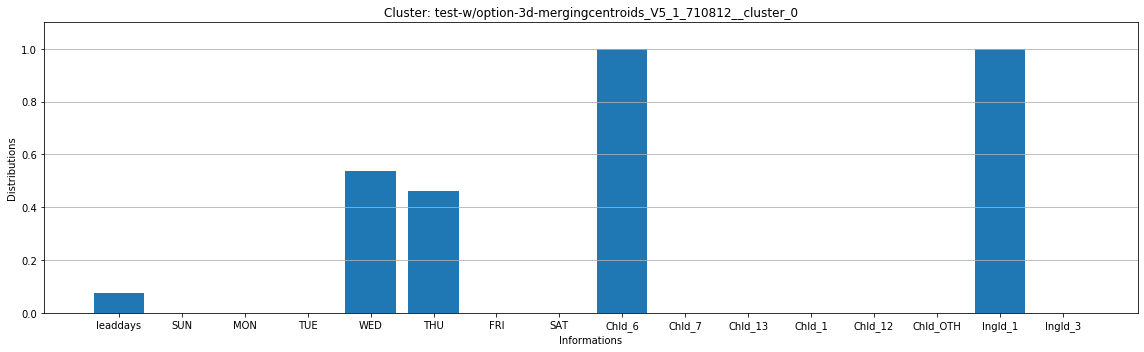

In [268]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_710812__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

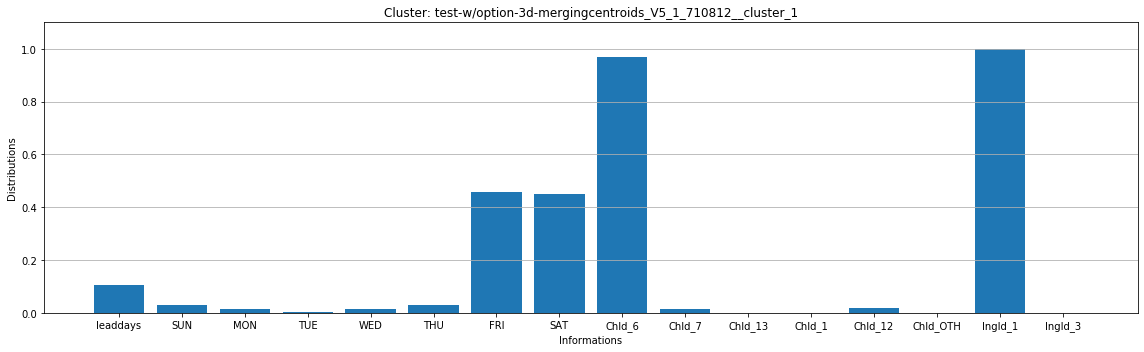

In [269]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_710812__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

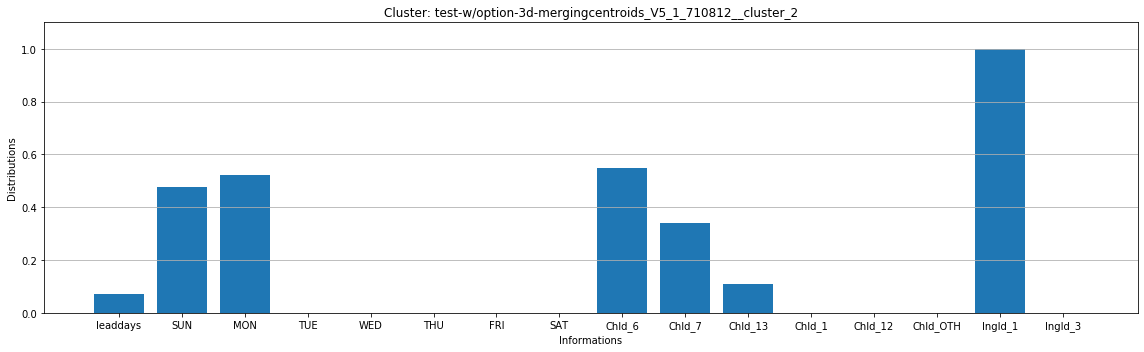

In [270]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_710812__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

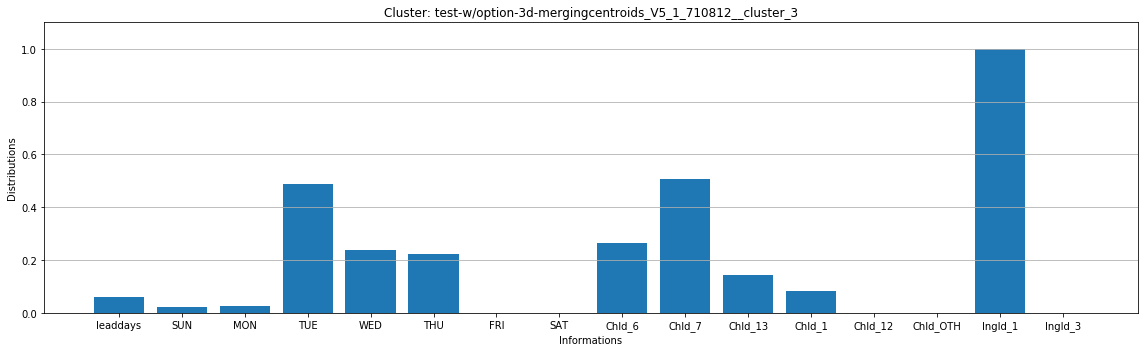

In [271]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_710812__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

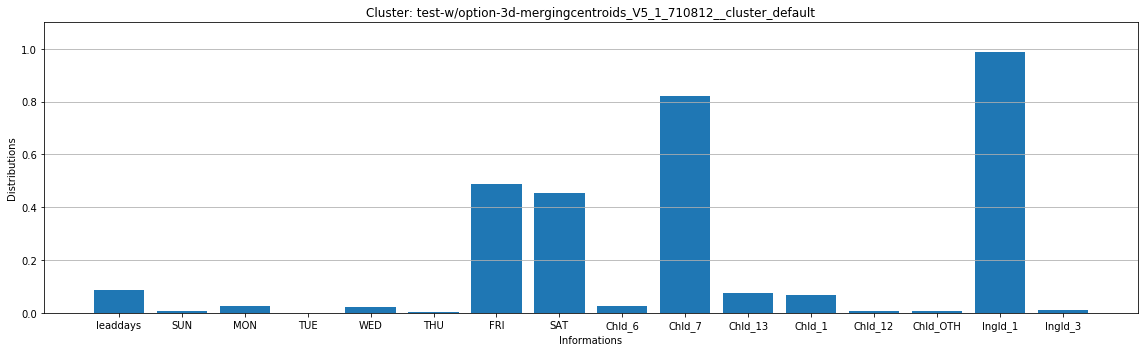

In [272]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_710812__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 2 = [5, 6, 1, 9]

In [273]:
dataForPred_5619 = dataForPred[dataForPred['Arrival_Month'].isin([5, 6, 1, 9])].copy(deep=True)
dataForPred_5619.reset_index(inplace = True, drop=True)

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are three "categorical" column here, **'channel_id', 'lang_id', ArrivalDate_WeekDay**. There is different type of mechanism to handle these 3 categorical variables. **channel_id' and 'lang_id'** has been handled differently than  **ArrivalDate_WeekDay**. We will translate **'ArrivalDate_WeekDay', 'channel_id' and 'lang_id'** into one-hot encoded data columns <u>in addition to calculationg midweek, earlyweek and weekend</u> on **'ArrivalDate_WeekDay'**.


Also, we will re-use two functions we have used at the begining of creation of the initial model for data-preparation or feature engineering.

In [274]:
dataForPred_5619.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

In [275]:
columns = [i.lower() for i in list(dataForPred_5619.columns)]
dataForPred_5619['ArrivalDate_Weekday'] = dataForPred_5619['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred_5619.columns = columns
dataForPred_5619, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred_5619)

In [276]:
dataForPred_5619.columns

Index(['channel_id', 'predicted_cluster', 'arrivaldate_weekday',
       'arrival_month', 'leaddays', 'lang_id', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

**categoricalAttributes=['channel_id', 'lang_id', 'ArrivalDate_Weekday'], min_split=0.001 Refer to AthenaCustomerSegmentation_Driver_V5  >> Test-12**

In [277]:
_, dataForPred_5619 = getOthersGoup(data=dataForPred_5619,
                                    categoricalAttributes=['channel_id', 'lang_id', 'arrivaldate_weekday'],
                                    min_split=0.001)

In [278]:
dataForPred_5619.columns

Index(['predicted_cluster', 'arrival_month', 'leaddays',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek', 'channel_id_6', 'channel_id_7',
       'channel_id_13', 'channel_id_1', 'channel_id_12', 'channel_id_3',
       'lang_id_1', 'lang_id_others', 'arrivaldate_weekday_wednesday',
       'arrivaldate_weekday_friday', 'arrivaldate_weekday_saturday',
       'arrivaldate_weekday_monday', 'arrivaldate_weekday_tuesday',
       'arrivaldate_weekday_thursday', 'arrivaldate_weekday_sunday'],
      dtype='object')

In [279]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek', 'channel_id_6':'ChId_6', 'channel_id_7':'ChId_7',
            'channel_id_13': 'ChId_13', 'channel_id_1': 'ChId_1', 'channel_id_12': 'ChId_12', 
            'channel_id_3': 'ChId_3', 'lang_id_1': 'lngId_1', 'lang_id_others': 'lngId_OTH', 
            'arrivaldate_weekday_monday': 'MON',
       'arrivaldate_weekday_wednesday': 'WED', 'arrivaldate_weekday_friday': 'FRI',
       'arrivaldate_weekday_sunday': 'SUN', 'arrivaldate_weekday_saturday': 'SAT',
       'arrivaldate_weekday_thursday': 'THU', 'arrivaldate_weekday_tuesday': "TUE"}
dataForPred_5619.rename(columns=colRename, inplace=True)

In [280]:
dataForPred_5619.columns

Index(['predicted_cluster', 'arrival_month', 'leaddays', 'weekend', 'midweek',
       'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13', 'ChId_1', 'ChId_12',
       'ChId_3', 'lngId_1', 'lngId_OTH', 'WED', 'FRI', 'SAT', 'MON', 'TUE',
       'THU', 'SUN'],
      dtype='object')

In [281]:
numericalCols = ['leaddays', 'SUN', 'MON','TUE', 'WED', 'THU', 'FRI', 'SAT',
                'ChId_6', 'ChId_7', 'ChId_13', 'ChId_1', 'ChId_12', 'ChId_3', 'lngId_1', 'lngId_OTH']

In [282]:
eps = 0.00000001
for c in numericalCols:
    dataForPred_5619[c] = (dataForPred_5619[c]-min(dataForPred_5619[c]))/\
                            (max(dataForPred_5619[c]) - min(dataForPred_5619[c])+eps)


In [283]:
dataForPred_DemographicData_Agg = dataForPred_5619.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,arrival_month,leaddays,weekend,midweek,earlyweek,ChId_6,ChId_7,ChId_13,ChId_1,...,ChId_3,lngId_1,lngId_OTH,WED,FRI,SAT,MON,TUE,THU,SUN
0,test-w/option-3d-mergingcentroids_v5_1_5619__c...,4.973085,0.077931,0.000000,1.000000,0.000000,0.516563,0.482402,0.000000,0.001035,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,test-w/option-3d-mergingcentroids_v5_1_5619__c...,5.053685,0.078998,0.968153,0.020018,0.011829,0.057325,0.829845,0.079163,0.033667,...,0.000000,1.000000,0.000000,0.013649,0.475887,0.492266,0.011829,0.000000,0.006369,0.000000
2,test-w/option-3d-mergingcentroids_v5_1_5619__c...,5.138723,0.066747,0.000000,1.000000,0.000000,0.580838,0.418164,0.000998,0.000000,...,0.000000,1.000000,0.000000,0.012974,0.000000,0.000000,0.000000,0.000000,0.987026,0.000000
3,test-w/option-3d-mergingcentroids_v5_1_5619__c...,5.635013,0.077555,0.962532,0.014212,0.023256,0.978682,0.009690,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.010982,0.508398,0.454134,0.023256,0.000646,0.002584,0.000000
4,test-w/option-3d-mergingcentroids_v5_1_5619__c...,5.086991,0.073017,0.000000,0.038308,0.961692,0.422187,0.342378,0.235435,0.000000,...,0.000000,1.000000,0.000000,0.019952,0.000000,0.000000,0.905826,0.011971,0.006385,0.055866
5,test-w/option-3d-mergingcentroids_v5_1_5619__c...,5.005845,0.070016,0.009351,0.956166,0.034483,0.339568,0.315605,0.231444,0.104617,...,0.005845,0.996493,0.003507,0.765634,0.002338,0.007013,0.020456,0.105202,0.085330,0.014027
6,test-w/option-3d-mergingcentroids_v5_1_5619__c...,5.565584,0.057437,0.000000,0.000000,1.000000,0.542720,0.456077,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


### Plotting

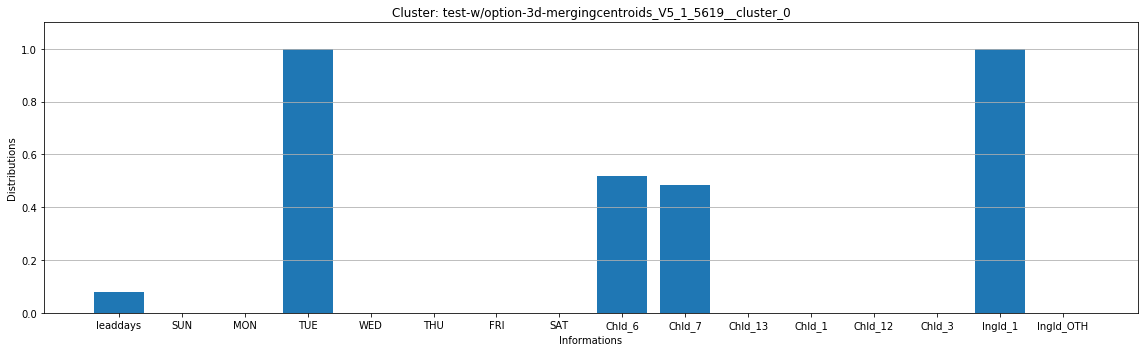

In [284]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_5619__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

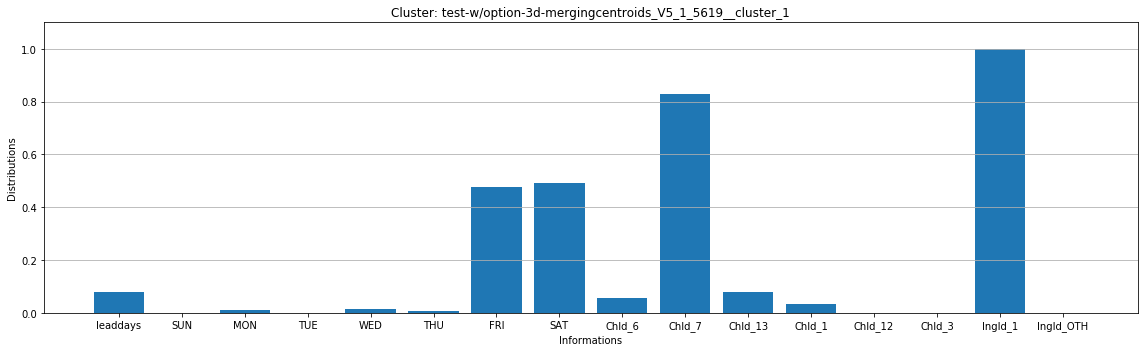

In [285]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_5619__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

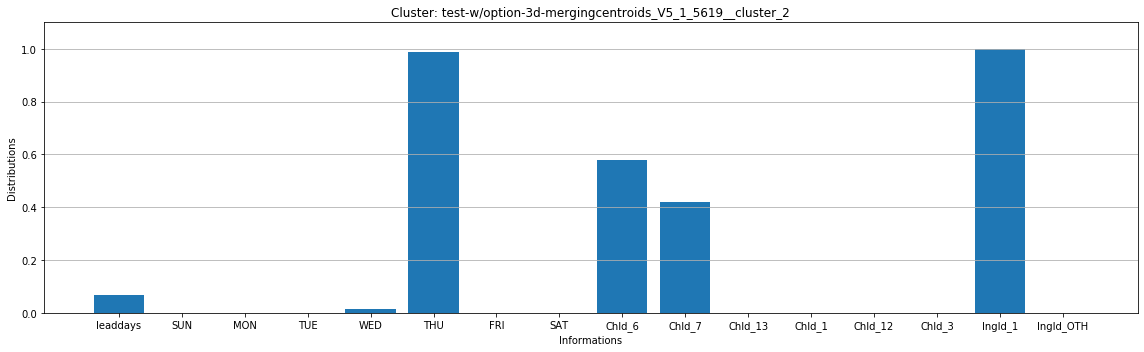

In [286]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_5619__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

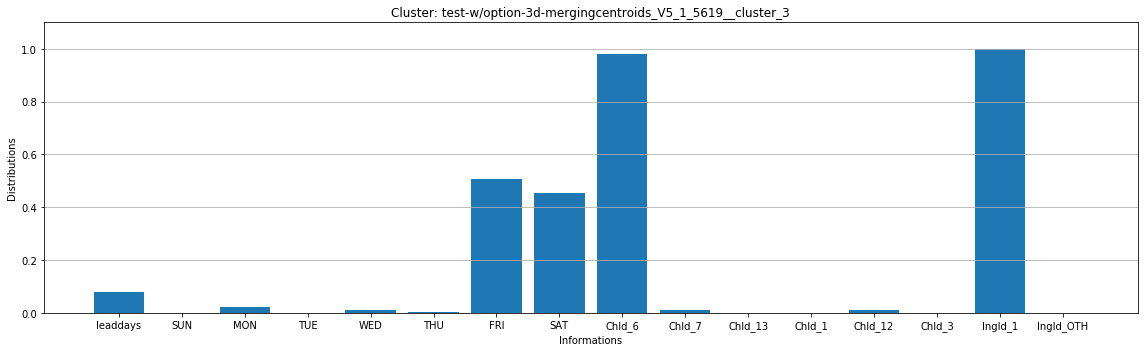

In [287]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_5619__cluster_3')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

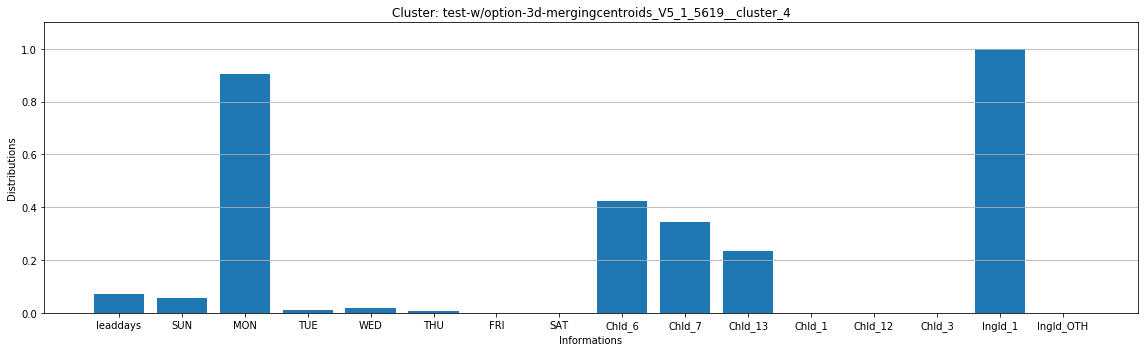

In [288]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[4][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_5619__cluster_4')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

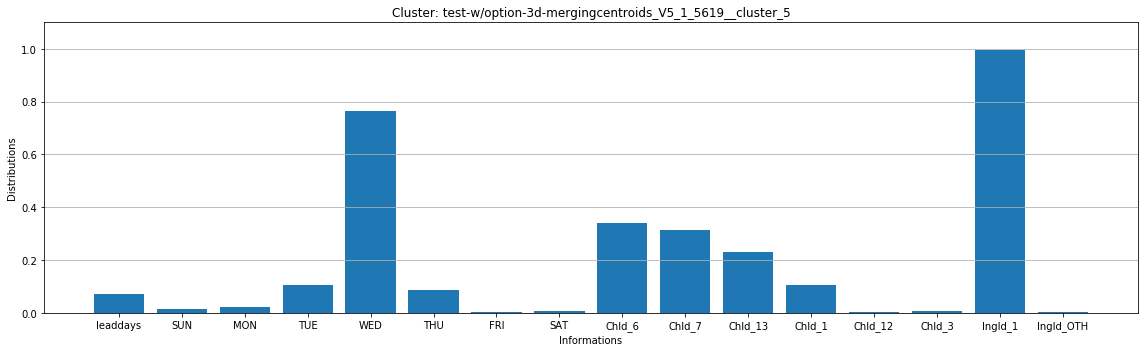

In [289]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[5][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_5619__cluster_5')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

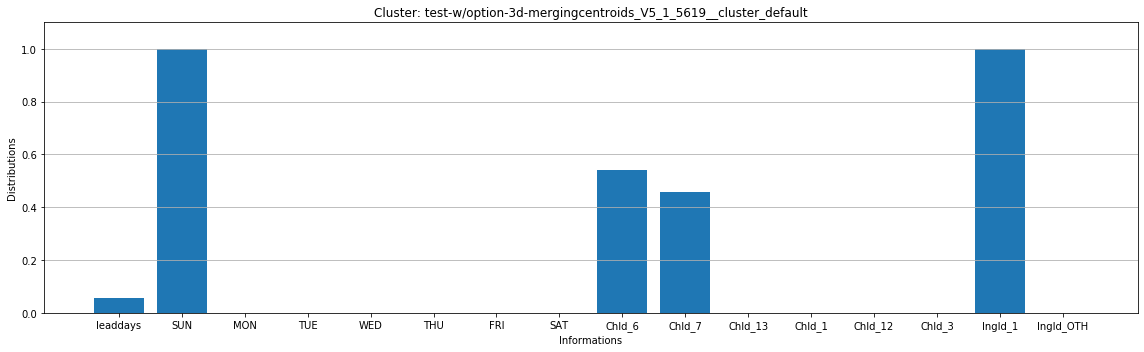

In [290]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[6][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_5619__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

### Season 3 = [4, 3, 2, 11]

In [291]:
dataForPred_43211 = dataForPred[dataForPred['Arrival_Month'].isin([4, 3, 2, 11])].copy(deep=True)
dataForPred_43211.reset_index(inplace = True, drop=True)

### Data Preparation for Plotting

We want to plot the to see how well the algorithm has been able to separate different patterns.
There are three "categorical" column here, **'channel_id', 'lang_id', ArrivalDate_WeekDay**. There is different type of mechanism to handle these 3 categorical variables. **channel_id' and 'lang_id'** has been handled differently than  **ArrivalDate_WeekDay**. We will translate **'ArrivalDate_WeekDay', 'channel_id' and 'lang_id'** into one-hot encoded data columns <u>in addition to calculationg midweek, earlyweek and weekend</u> on **'ArrivalDate_WeekDay'**.


Also, we will re-use two functions we have used at the begining of creation of the initial model for data-preparation or feature engineering.

In [292]:
dataForPred_43211.columns

Index(['ArrivalDate_Weekday', 'Arrival_Month', 'LeadDays', 'channel_id',
       'lang_id', 'Predicted_Cluster'],
      dtype='object')

In [293]:
columns = [i.lower() for i in list(dataForPred_43211.columns)]
dataForPred_43211['ArrivalDate_Weekday'] = dataForPred_43211['ArrivalDate_Weekday'].apply(lambda x: x.strip().lower())
dataForPred_43211.columns = columns
dataForPred_43211, _, _, _ ,_,_ = calcWeekEndMidEarlyWeek(dataForPred_43211)

In [294]:
dataForPred_43211.columns

Index(['channel_id', 'predicted_cluster', 'arrivaldate_weekday',
       'arrival_month', 'leaddays', 'lang_id', 'arrivaldate_weekday_weekend',
       'arrivaldate_weekday_midweek', 'arrivaldate_weekday_earlyweek'],
      dtype='object')

**categoricalAttributes=['channel_id', 'lang_id', 'ArrivalDate_Weekday'], min_split=0.001 Refer to AthenaCustomerSegmentation_Driver_V5  >> Test-12**

In [295]:
_, dataForPred_43211 = getOthersGoup(data=dataForPred_43211,
                                    categoricalAttributes=['channel_id', 'lang_id', 'arrivaldate_weekday'],
                                     min_split=0.001)

In [296]:
dataForPred_43211.columns

Index(['predicted_cluster', 'arrival_month', 'leaddays',
       'arrivaldate_weekday_weekend', 'arrivaldate_weekday_midweek',
       'arrivaldate_weekday_earlyweek', 'channel_id_6', 'channel_id_7',
       'channel_id_13', 'channel_id_1', 'channel_id_12', 'channel_id_others',
       'lang_id_1', 'lang_id_3', 'arrivaldate_weekday_friday',
       'arrivaldate_weekday_tuesday', 'arrivaldate_weekday_monday',
       'arrivaldate_weekday_thursday', 'arrivaldate_weekday_sunday',
       'arrivaldate_weekday_wednesday', 'arrivaldate_weekday_saturday'],
      dtype='object')

In [297]:
colRename = {'arrivaldate_weekday_weekend': 'weekend', 'arrivaldate_weekday_midweek': 'midweek',
            'arrivaldate_weekday_earlyweek': 'earlyweek', 'channel_id_6':'ChId_6', 'channel_id_7':'ChId_7',
            'channel_id_13': 'ChId_13', 'channel_id_1': 'ChId_1', 'channel_id_12': 'ChId_12', 
            'channel_id_others': 'ChId_OTH', 'lang_id_1': 'lngId_1', 'lang_id_3': 'lngId_3', 
            'arrivaldate_weekday_monday': 'MON',
       'arrivaldate_weekday_wednesday': 'WED', 'arrivaldate_weekday_friday': 'FRI',
       'arrivaldate_weekday_sunday': 'SUN', 'arrivaldate_weekday_saturday': 'SAT',
       'arrivaldate_weekday_thursday': 'THU', 'arrivaldate_weekday_tuesday': "TUE"}
dataForPred_43211.rename(columns=colRename, inplace=True)

In [298]:
dataForPred_43211.columns

Index(['predicted_cluster', 'arrival_month', 'leaddays', 'weekend', 'midweek',
       'earlyweek', 'ChId_6', 'ChId_7', 'ChId_13', 'ChId_1', 'ChId_12',
       'ChId_OTH', 'lngId_1', 'lngId_3', 'FRI', 'TUE', 'MON', 'THU', 'SUN',
       'WED', 'SAT'],
      dtype='object')

In [299]:
numericalCols = ['leaddays', 'SUN', 'MON','TUE', 'WED', 'THU', 'FRI', 'SAT',
                'ChId_6', 'ChId_7', 'ChId_13', 'ChId_1', 'ChId_12', 'ChId_OTH', 'lngId_1', 'lngId_3']

In [300]:
eps = 0.00000001
for c in numericalCols:
    dataForPred_43211[c] = (dataForPred_43211[c]-min(dataForPred_43211[c]))/\
                (max(dataForPred_43211[c]) - min(dataForPred_43211[c])+eps)
dataForPred_DemographicData_Agg = dataForPred_43211.groupby(by=['predicted_cluster']).mean()
dataForPred_DemographicData_Agg.reset_index(inplace=True, drop=False)
dataForPred_DemographicData_Agg

,predicted_cluster,arrival_month,leaddays,weekend,midweek,earlyweek,ChId_6,ChId_7,ChId_13,ChId_1,...,ChId_OTH,lngId_1,lngId_3,FRI,TUE,MON,THU,SUN,WED,SAT
0,test-w/option-3d-mergingcentroids_v5_1_43211__...,5.073826,0.072518,0.938049,0.044915,0.017037,0.569954,0.368095,0.016004,0.029943,...,0.002581,0.996386,0.003614,0.520909,0.024264,0.011874,0.017037,0.005163,0.003614,0.417140
1,test-w/option-3d-mergingcentroids_v5_1_43211__...,5.528469,0.055644,0.000000,1.000000,0.000000,0.458456,0.541544,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.337410,0.000000,0.358077,0.000000,0.304513,0.000000
2,test-w/option-3d-mergingcentroids_v5_1_43211__...,4.959158,0.055558,0.000000,0.000000,1.000000,0.529675,0.469049,0.001276,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.506701,0.000000,0.493299,0.000000,0.000000
3,test-w/option-3d-mergingcentroids_v5_1_43211__...,4.747967,0.064718,0.001626,0.582114,0.416260,0.000000,0.000000,0.790244,0.209756,...,0.000000,0.998374,0.001626,0.000000,0.247154,0.273171,0.162602,0.143089,0.172358,0.001626


### Plotting

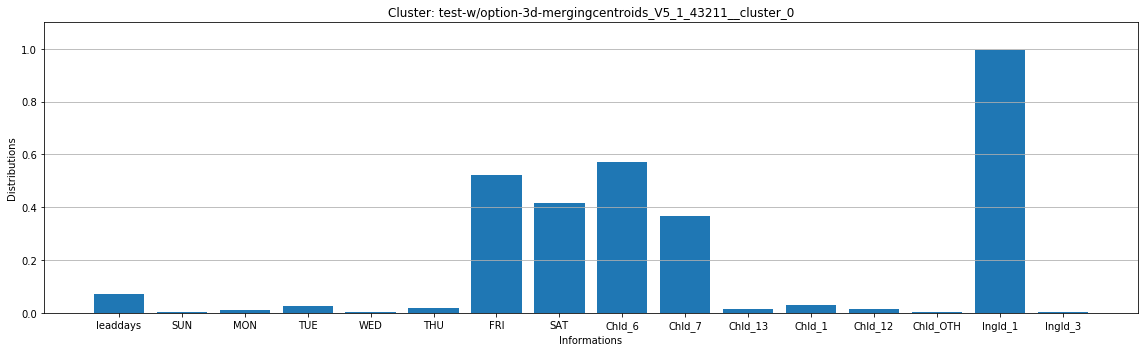

In [301]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[0][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_43211__cluster_0')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

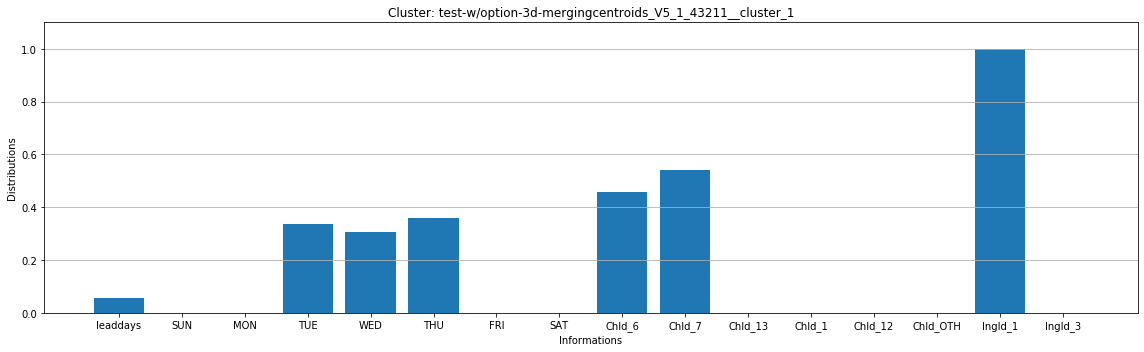

In [302]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[1][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_43211__cluster_1')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

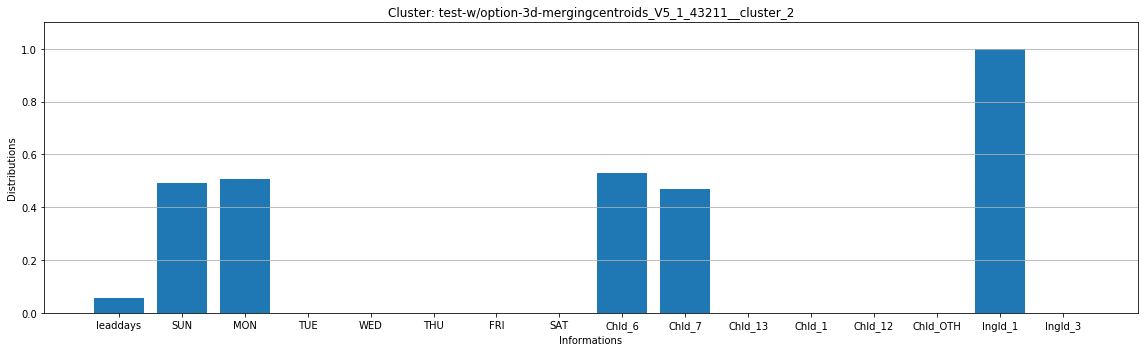

In [303]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[2][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_43211__cluster_2')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')

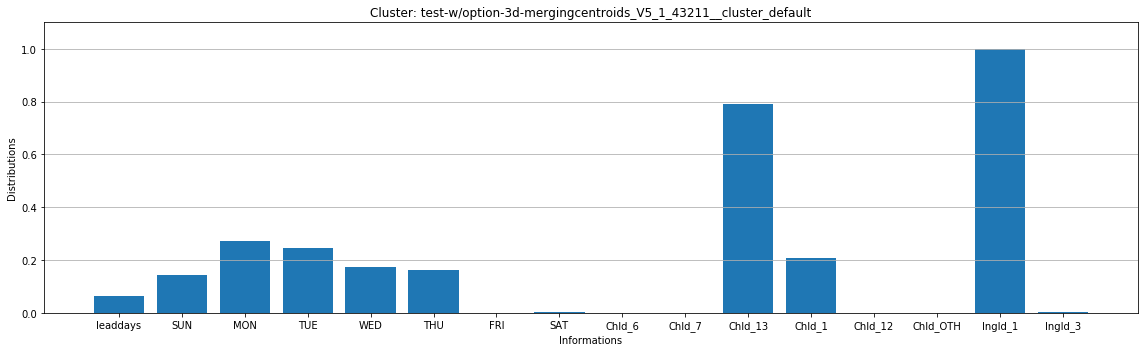

In [304]:
x= numericalCols
y= dataForPred_DemographicData_Agg.loc[3][numericalCols].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-w/option-3d-mergingcentroids_V5_1_43211__cluster_default')
plt.xlabel('Informations')
plt.ylabel('Distributions')
plt.tight_layout()
plt.grid(axis='y')